## **IMPORTING MODULES**


In [ ]:
import numpy as np
import pandas as pd


Saving set3.csv to set3.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## **DATA PREPROCESSING & CLEANING**

In [ ]:
df=pd.read_csv("C:\\Users\\SANJAY\\Downloads\\car.csv")

In [ ]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [ ]:
df.describe().T

count          mean          std      min      25%  \
car_ID            205.0    103.000000    59.322565     1.00    52.00   
symboling         205.0      0.834146     1.245307    -2.00     0.00   
wheelbase         205.0     98.756585     6.021776    86.60    94.50   
carlength         205.0    174.049268    12.337289   141.10   166.30   
carwidth          205.0     65.907805     2.145204    60.30    64.10   
carheight         205.0     53.724878     2.443522    47.80    52.00   
curbweight        205.0   2555.565854   520.680204  1488.00  2145.00   
enginesize        205.0    126.907317    41.642693    61.00    97.00   
boreratio         205.0      3.329756     0.270844     2.54     3.15   
stroke            205.0      3.255415     0.313597     2.07     3.11   
compressionratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower        205.0    104.117073    39.544167    48.00    70.00   
peakrpm           205.0   5125.121951   476.985643  4150.00  4800.00   
citympg           205.0     25.219512     6.542142    13.00    19.00   
highwaympg        205.0     30.751220     6.886443    16.00    25.00   
price             205.0  13276.710571  7988.852332  5118.00  7788.00   

                       50%       75%       max  
car_ID              103.00    154.00    205.00  
symboling             1.00      2.00      3.00  
wheelbase            97.00    102.40    120.90  
carlength           173.20    183.10    208.10  
carwidth             65.50     66.90     72.30  
carheight            54.10     55.50     59.80  
curbweight         2414.00   2935.00   4066.00  
enginesize          120.00    141.00    326.00  
boreratio             3.31      3.58      3.94  
stroke                3.29      3.41      4.17  
compressionratio      9.00      9.40     23.00  
horsepower           95.00    116.00    288.00  
peakrpm            5200.00   5500.00   6600.00  
citympg              24.00     30.00     49.00  
highwaympg           30.00     34.00     54.00  
price             10295.00  16503.00  45400.00

In [ ]:
df.isnull()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0     False      False    False     False       False       False    False   
1     False      False    False     False       False       False    False   
2     False      False    False     False       False       False    False   
3     False      False    False     False       False       False    False   
4     False      False    False     False       False       False    False   
..      ...        ...      ...       ...         ...         ...      ...   
200   False      False    False     False       False       False    False   
201   False      False    False     False       False       False    False   
202   False      False    False     False       False       False    False   
203   False      False    False     False       False       False    False   
204   False      False    False     False       False       False    False   

     drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0         False           False      False  ...       False       False   
1         False           False      False  ...       False       False   
2         False           False      False  ...       False       False   
3         False           False      False  ...       False       False   
4         False           False      False  ...       False       False   
..          ...             ...        ...  ...         ...         ...   
200       False           False      False  ...       False       False   
201       False           False      False  ...       False       False   
202       False           False      False  ...       False       False   
203       False           False      False  ...       False       False   
204       False           False      False  ...       False       False   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0        False   False             False       False    False    False   
1        False   False             False       False    False    False   
2        False   False             False       False    False    False   
3        False   False             False       False    False    False   
4        False   False             False       False    False    False   
..         ...     ...               ...         ...      ...      ...   
200      False   False             False       False    False    False   
201      False   False             False       False    False    False   
202      False   False             False       False    False    False   
203      False   False             False       False    False    False   
204      False   False             False       False    False    False   

     highwaympg  price  
0         False  False  
1         False  False  
2         False  False  
3         False  False  
4         False  False  
..          ...    ...  
200       False  False  
201       False  False  
202       False  False  
203       False  False  
204       False  False  

[205 rows x 26 columns]

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.drop(columns="car_ID",inplace=True)

In [ ]:
df.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i,df[i].nunique())
  print()

symboling 6

CarName 147

fueltype 2

aspiration 2

doornumber 2

carbody 5

drivewheel 3

enginelocation 2

wheelbase 53

carlength 75

carwidth 44

carheight 49

curbweight 171

enginetype 7

cylindernumber 7

enginesize 44

fuelsystem 8

boreratio 38

stroke 37

compressionratio 32

horsepower 59

peakrpm 23

citympg 29

highwaympg 30

price 189



In [ ]:
for i in df.columns:
  print(i,df[i].unique())
  print()

symboling [ 3  1  2  0 -1 -2]

CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick centu

In [ ]:
for i in df.columns:
  print(df.value_counts())
  print()

symboling  CarName                  fueltype  aspiration  doornumber  carbody    drivewheel  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
-2         volvo 145e (sw)          gas       std         four        sedan      rwd         front           104.3      188.8      67.2      56.2       2912        ohc         four            141         mpfi        3.78       3.15    9.5               114         5400     23       28          12940.0    1
 1         toyota corolla liftback  gas       std         two         sedan      rwd         front           94.5       168.7      64.0      52.6       2169        ohc         four            98          2bbl        3.19       3.03    9.0               70          4800     29       34          8058.0     1
           nissan rogue             gas       std         two         sedan      

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates(keep='first')

## **DATA VISUALIZATION**

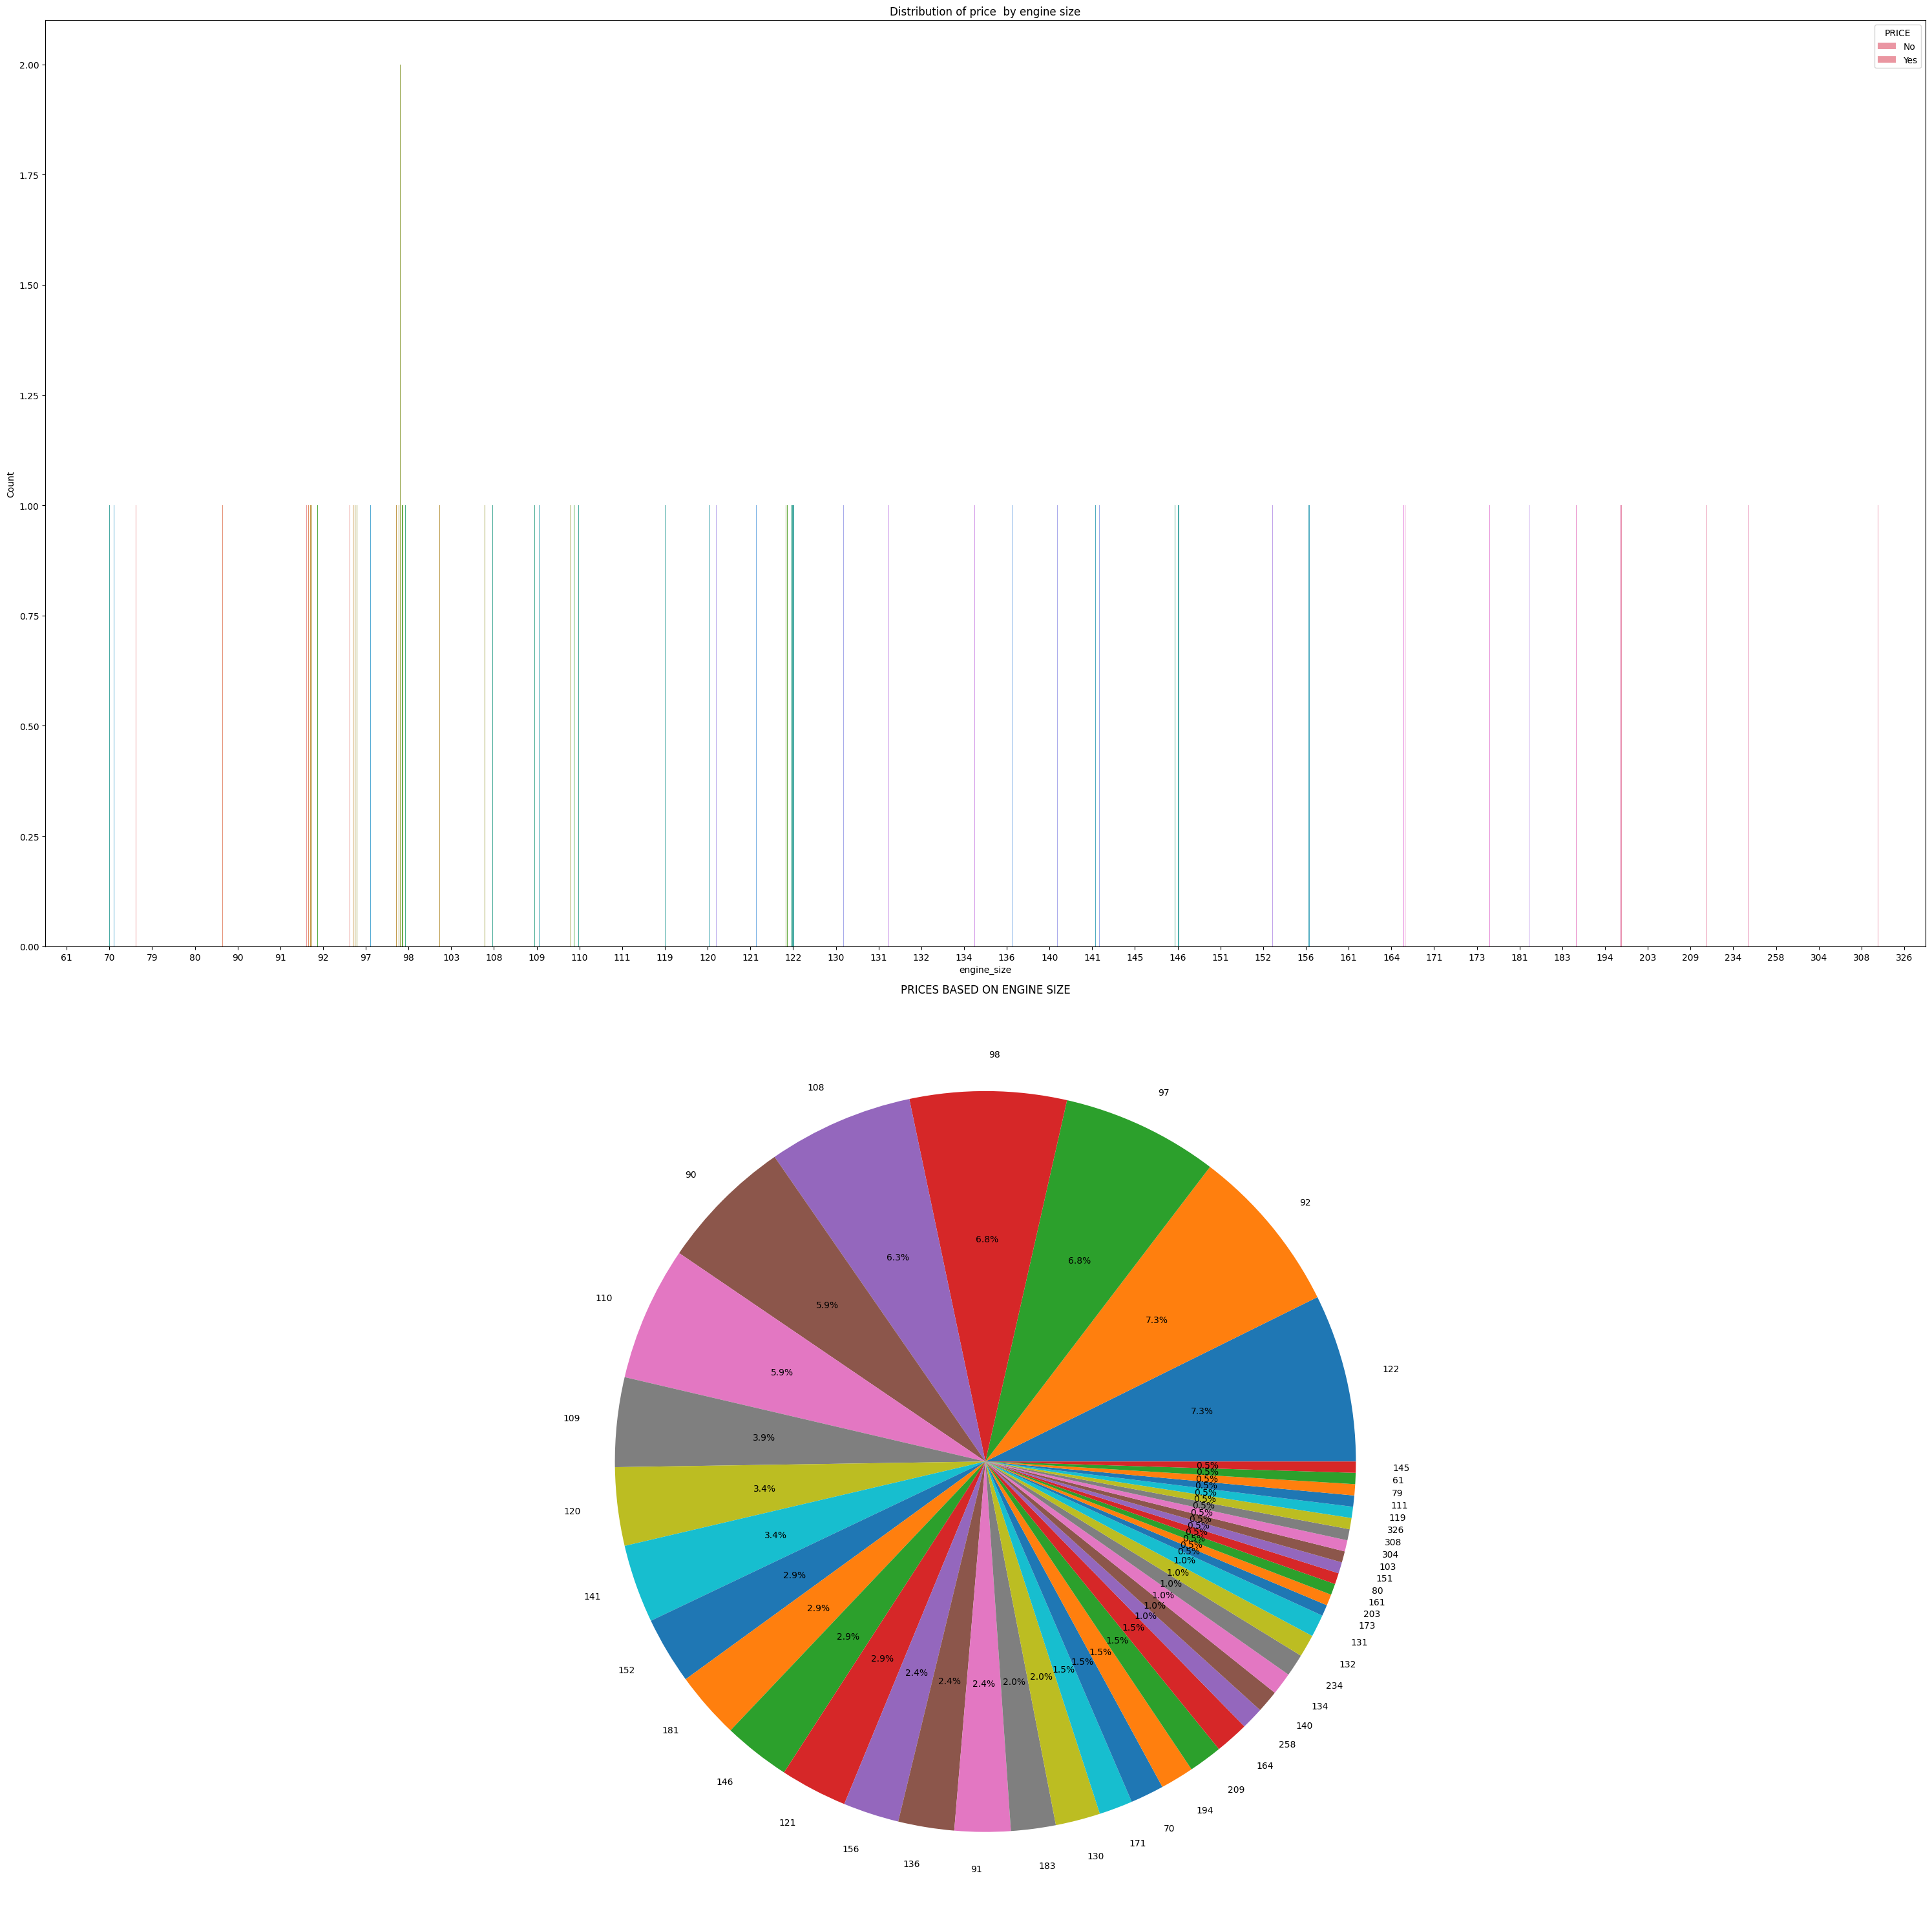

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(30, 30))
sns.countplot(data=df, x='enginesize', hue='price', ax=axes[0])
axes[0].set_xlabel('engine_size')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of price  by engine size')
axes[0].legend(title='PRICE', labels=['No', 'Yes'])
engine_counts = df['enginesize'].value_counts()
axes[1].pie(engine_counts, labels=engine_counts.index, autopct='%1.1f%%')
axes[1].set_title('PRICES BASED ON ENGINE SIZE')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

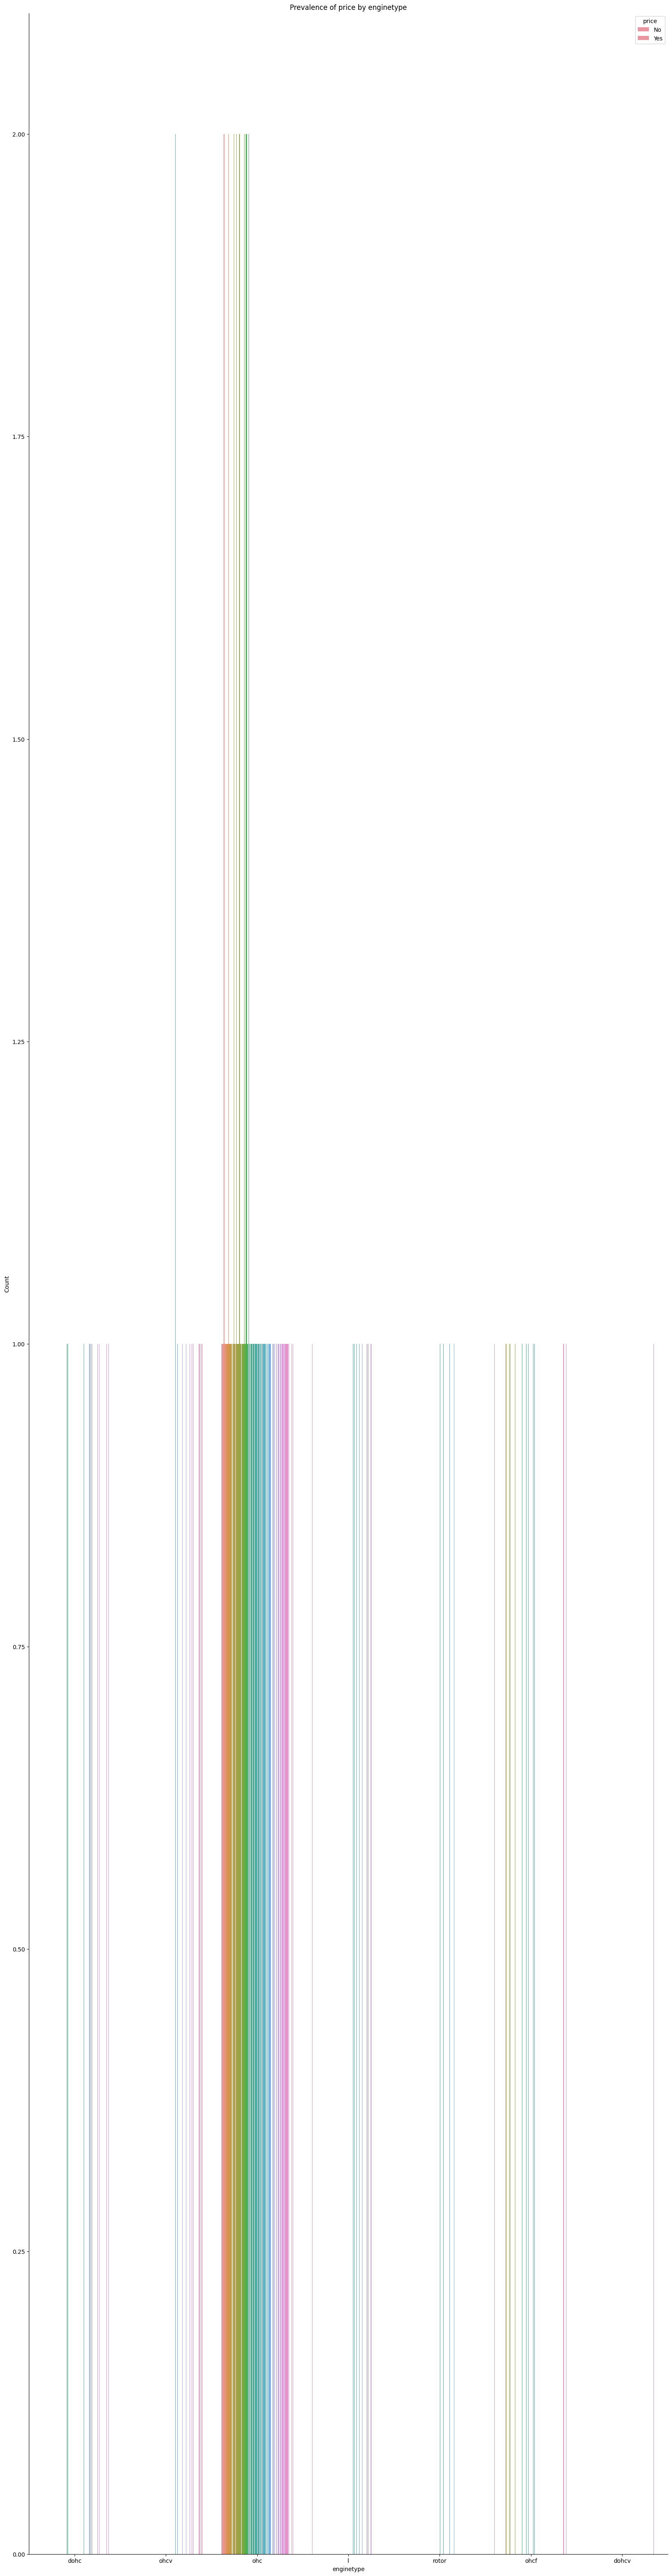

In [ ]:
plt.figure(figsize=(20,80))
sns.countplot(data=df, x='enginetype', hue='price')
plt.xlabel('enginetype')
plt.ylabel('Count')
plt.title('Prevalence of price by enginetype')
plt.legend(title='price', labels=['No', 'Yes'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

"ax = plt.gca()\nax.set_xlim([0, df['enginetype'].max()]) \nax.set_xticks(range(0, int(df['enginetype'].max()) + 1, 5)) \nax.spines['top'].set_visible(False) \nax.spines['right'].set_visible(False) \nplt.show()"

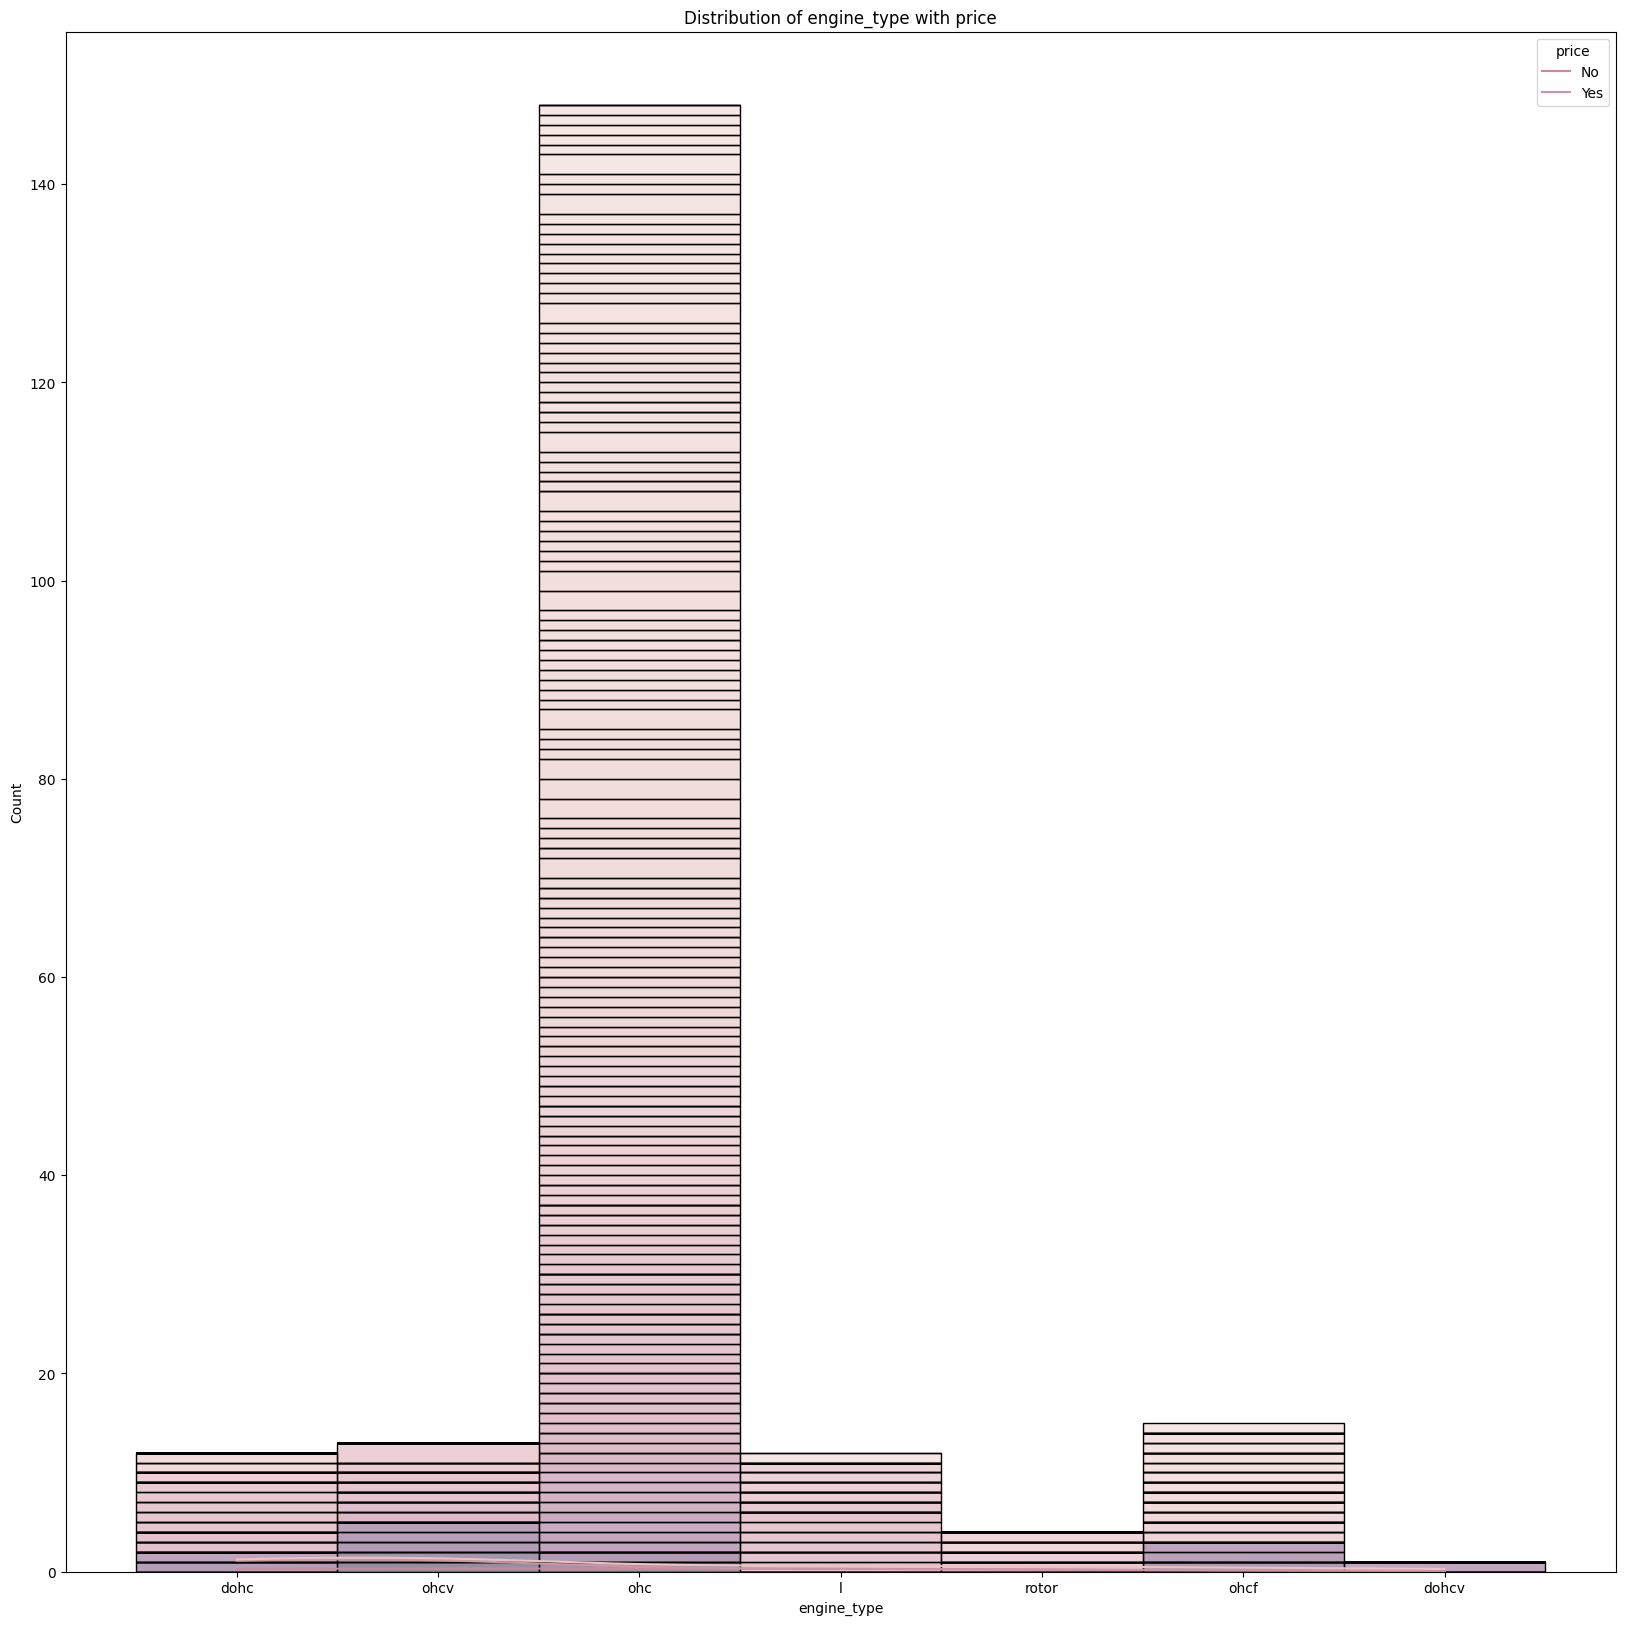

In [ ]:
plt.figure(figsize=(20,20))
sns.histplot(data=df, x='enginetype', hue='price', kde=True, bins=30, multiple="stack")
plt.xlabel('engine_type')
plt.ylabel('Count')
plt.title('Distribution of engine_type with price')
plt.legend(title='price', labels=['No', 'Yes'])
'''ax = plt.gca()
ax.set_xlim([0, df['enginetype'].max()])
ax.set_xticks(range(0, int(df['enginetype'].max()) + 1, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()'''

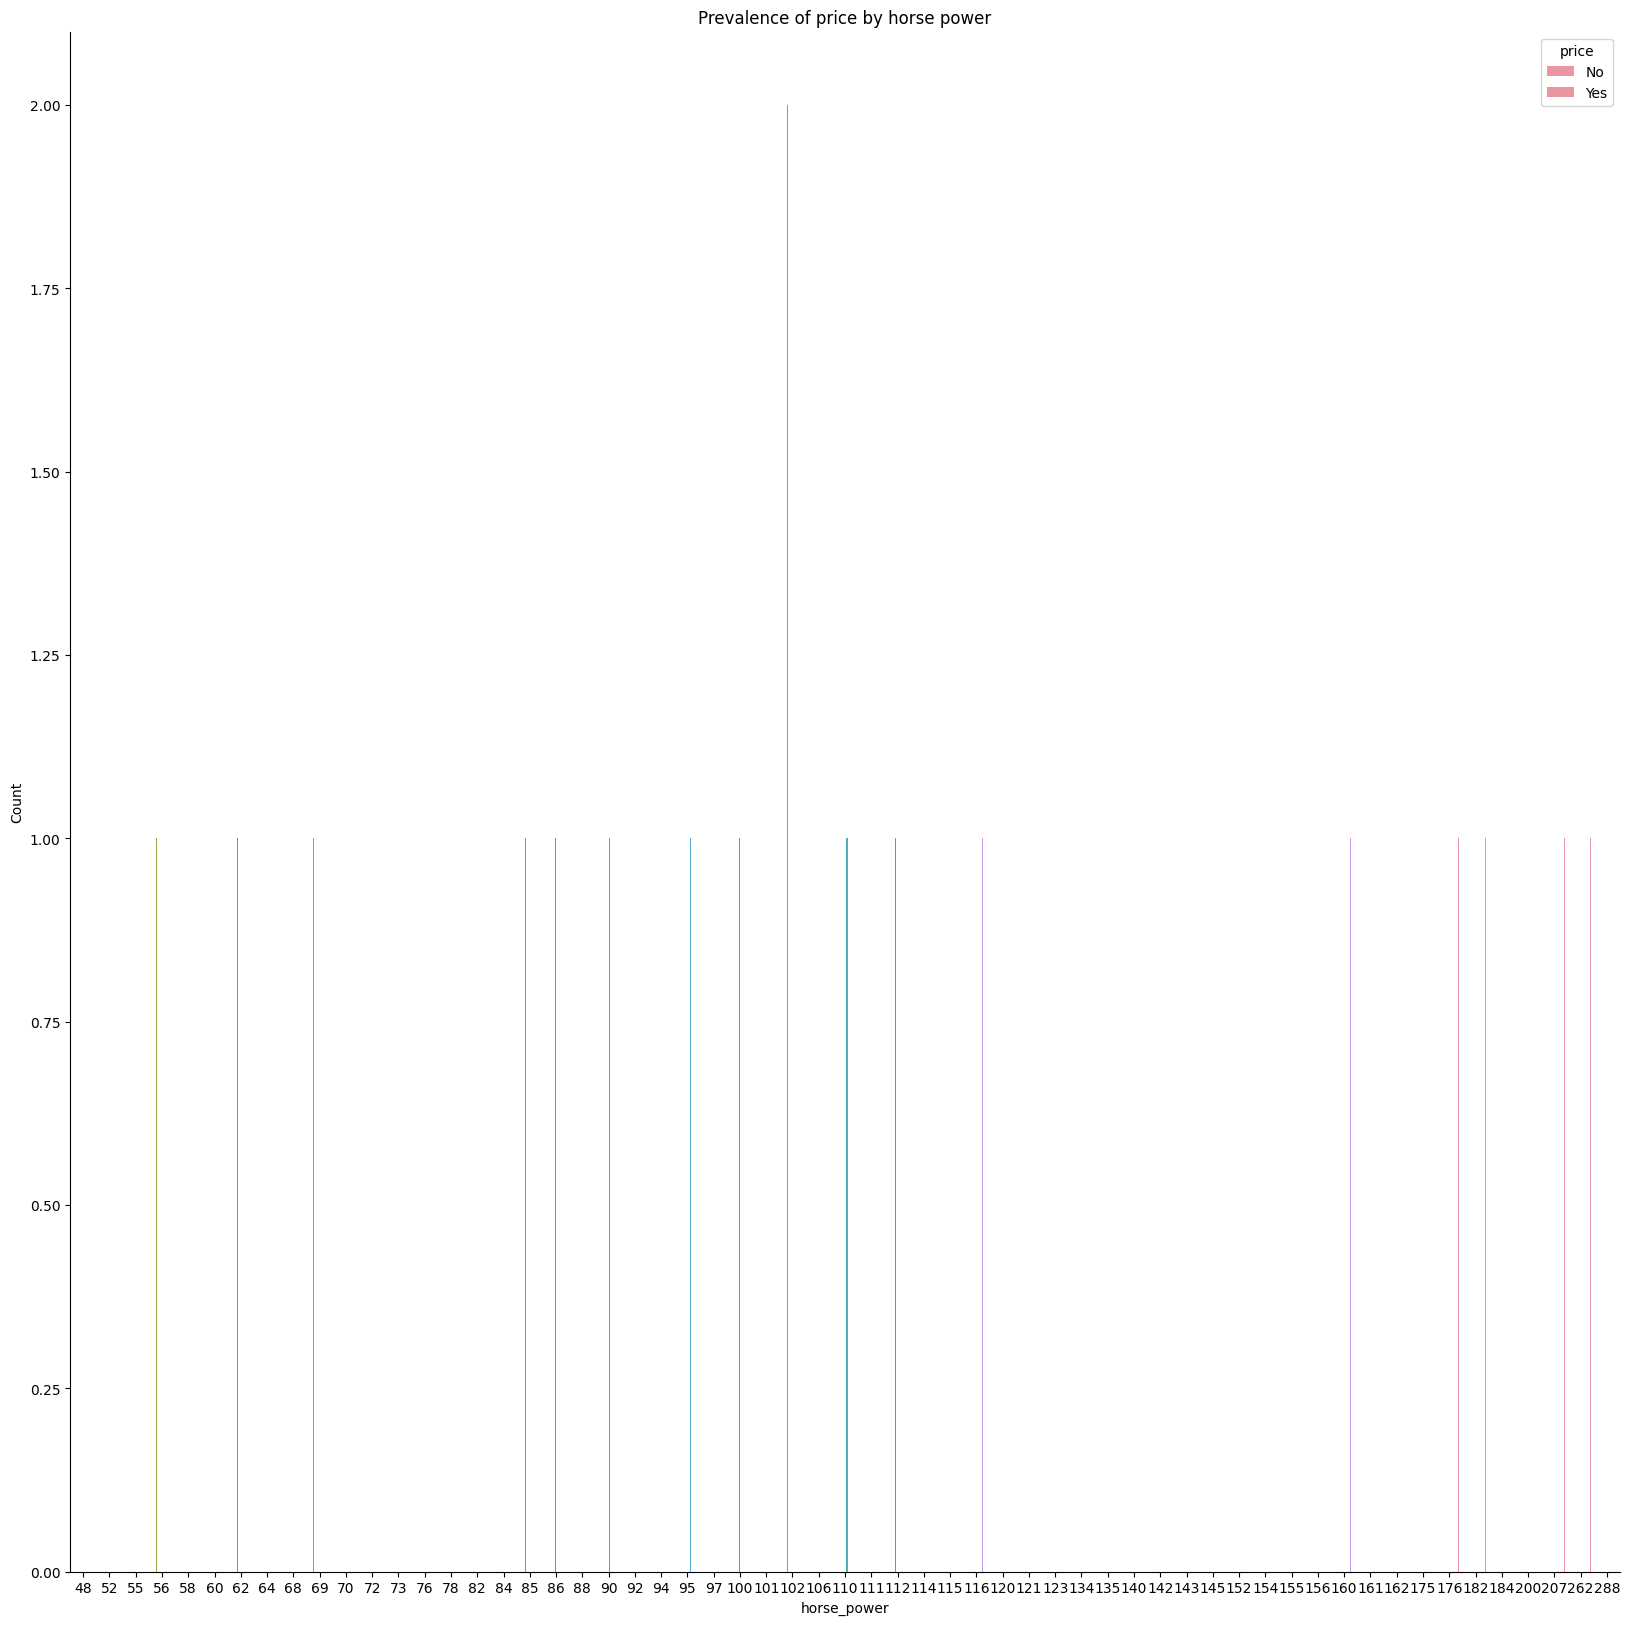

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(data=df, x='horsepower', hue='price')
plt.xlabel('horse_power')
plt.ylabel('Count')
plt.title('Prevalence of price by horse power')
plt.legend(title='price', labels=['No', 'Yes'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

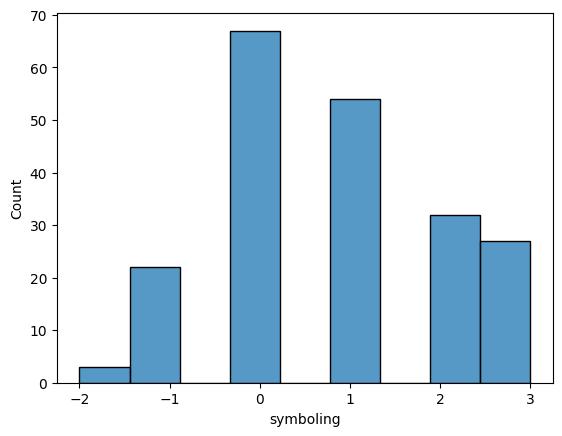

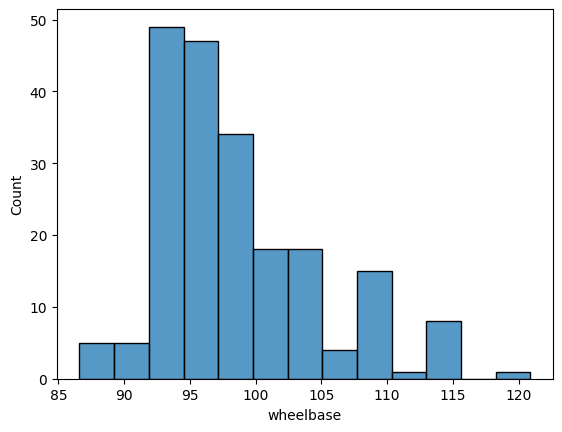

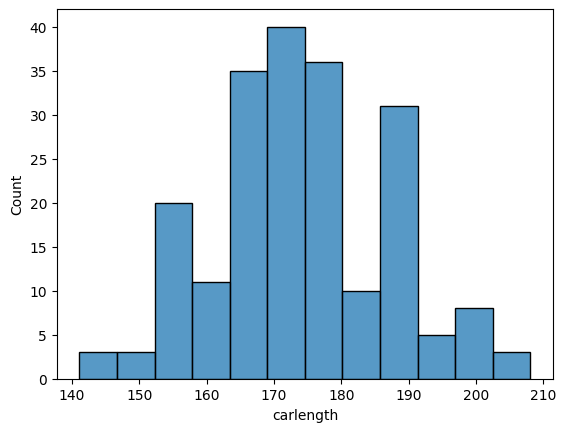

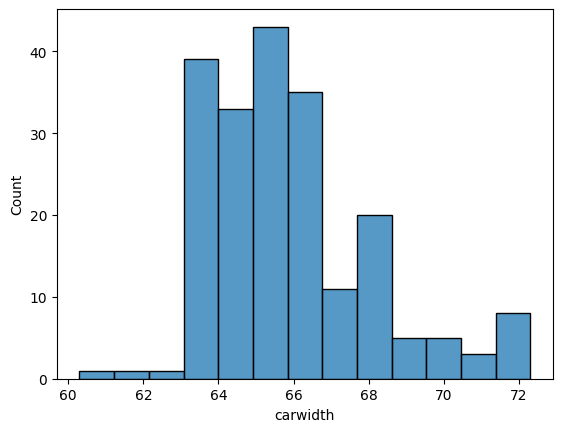

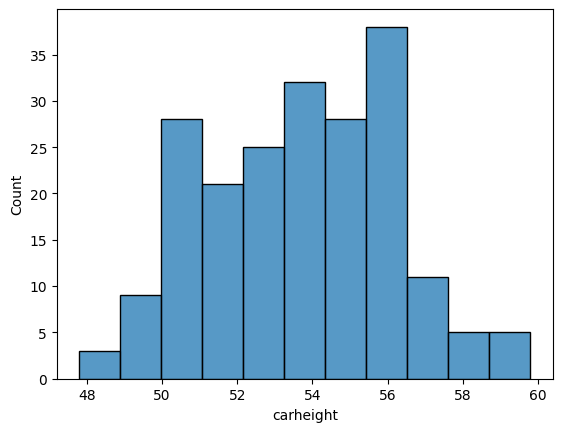

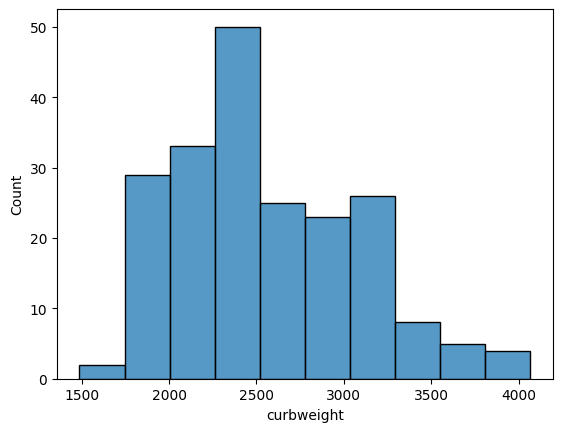

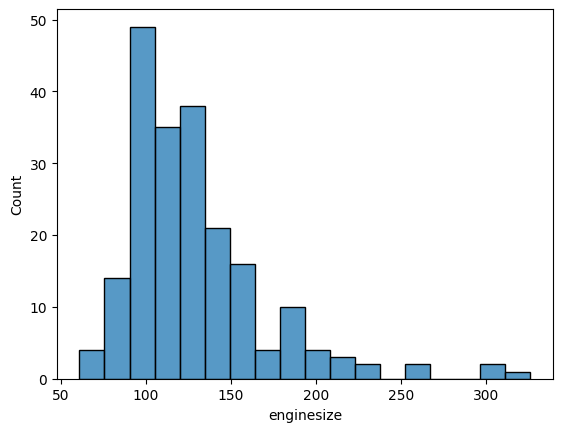

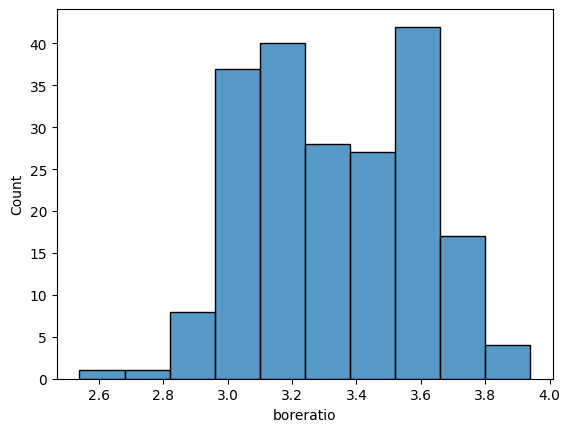

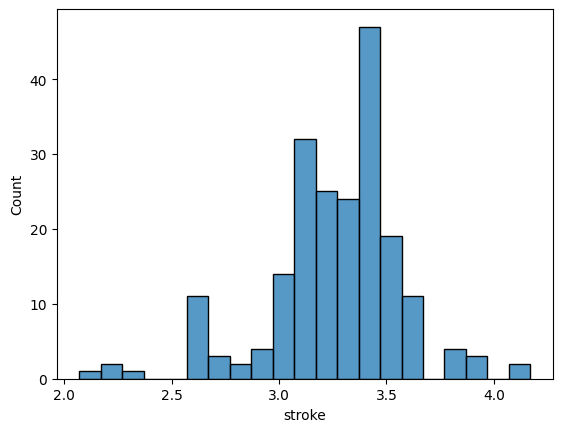

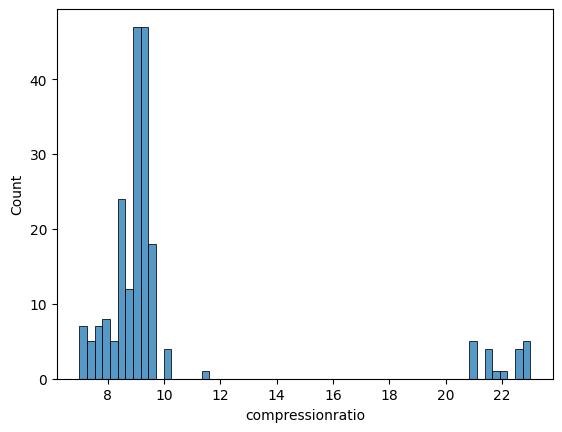

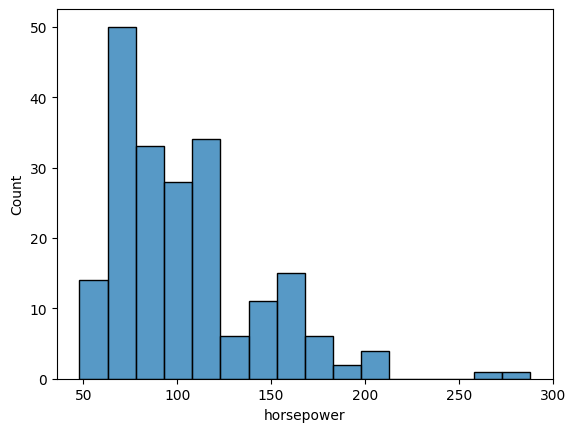

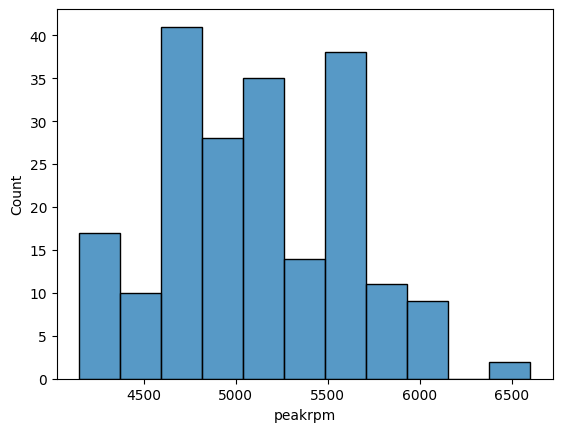

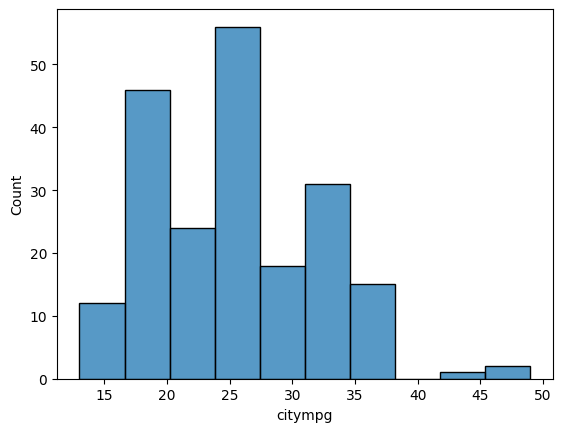

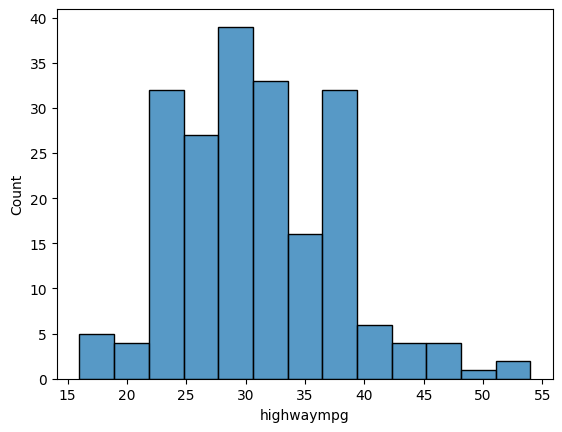

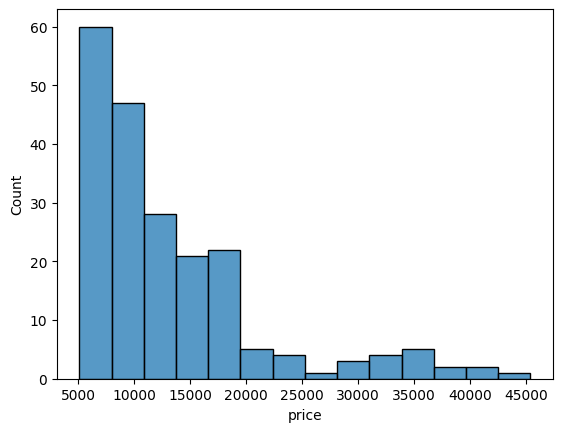

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

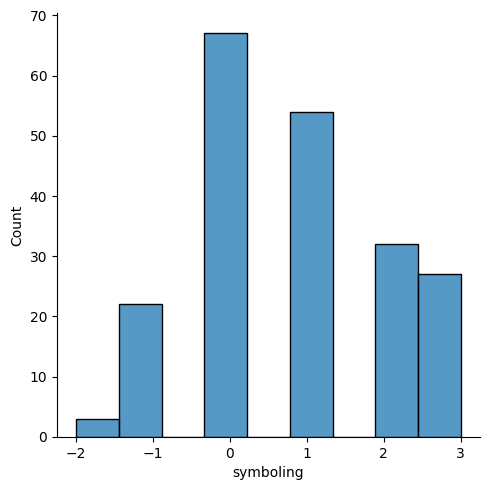

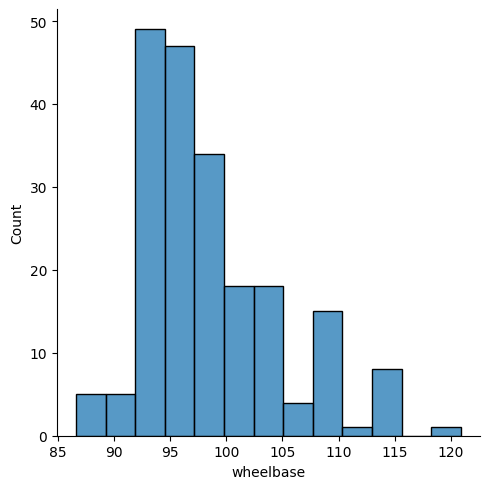

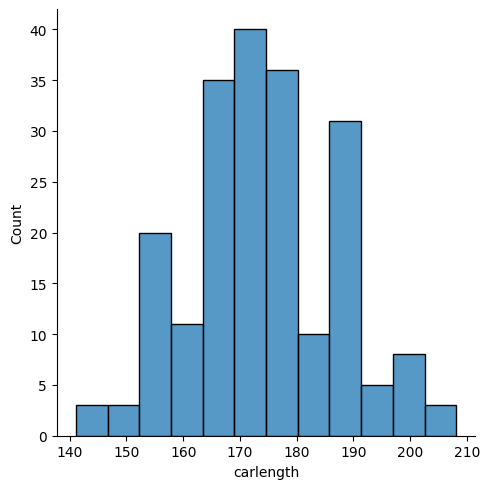

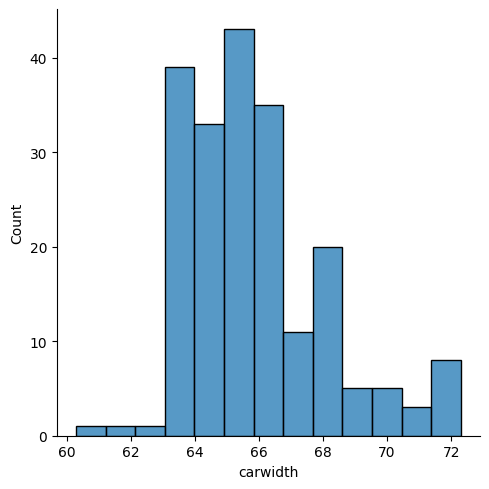

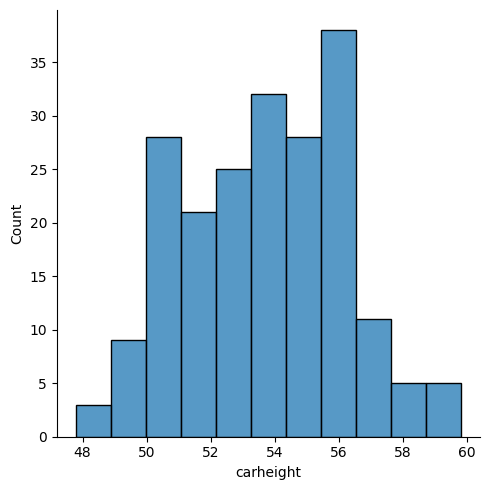

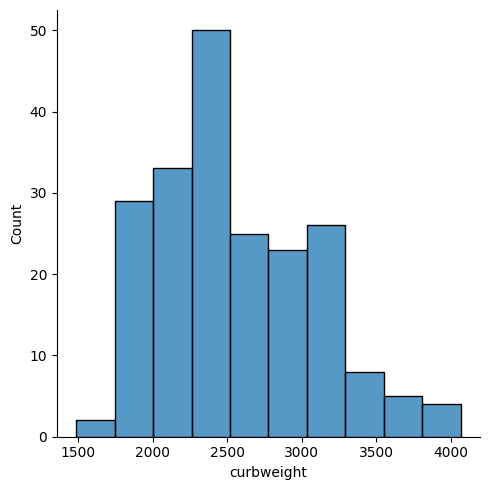

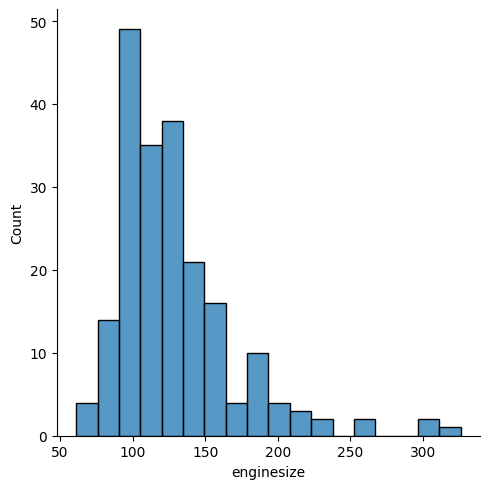

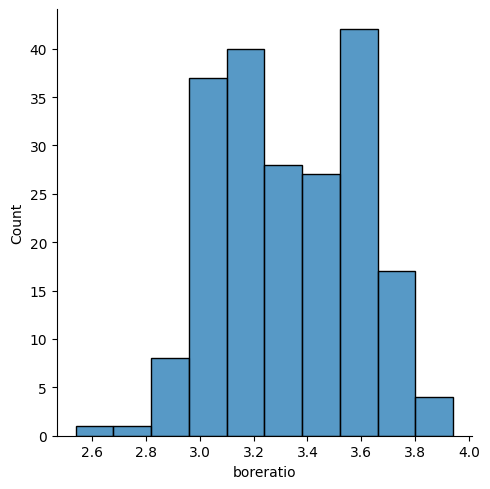

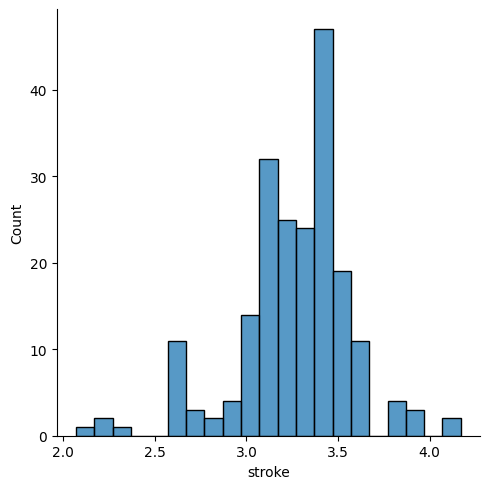

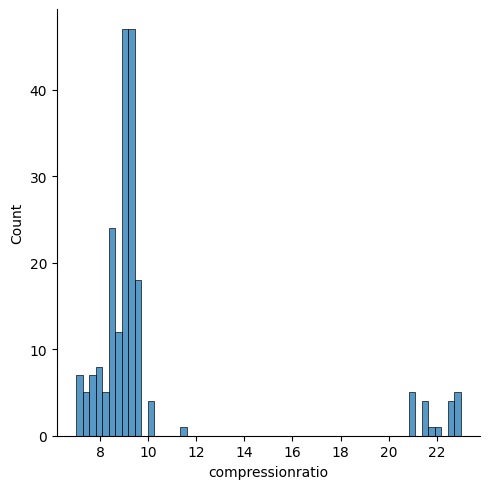

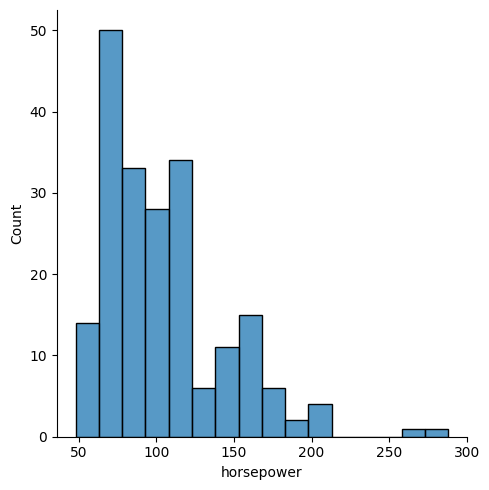

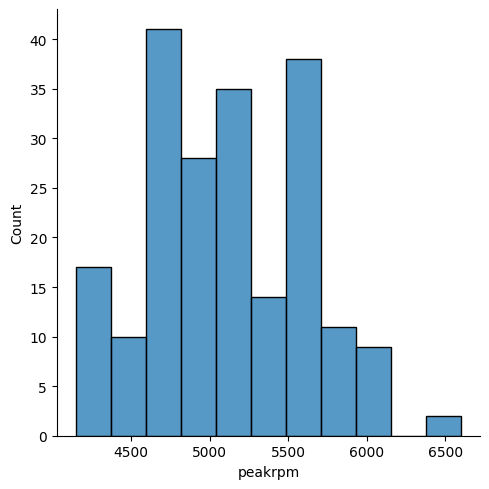

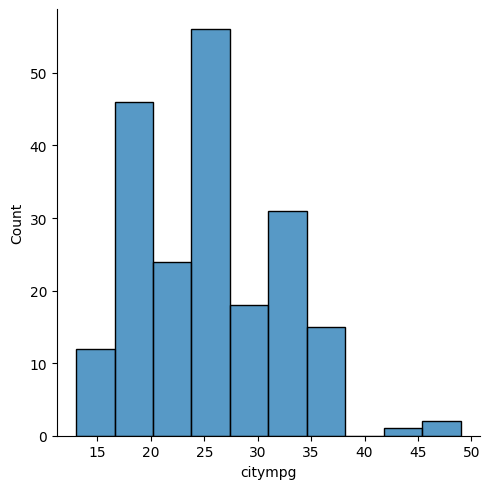

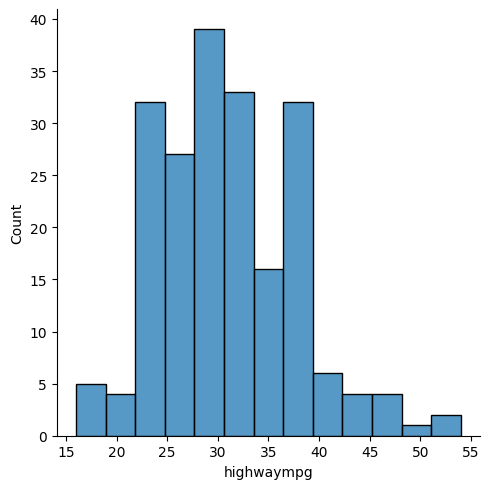

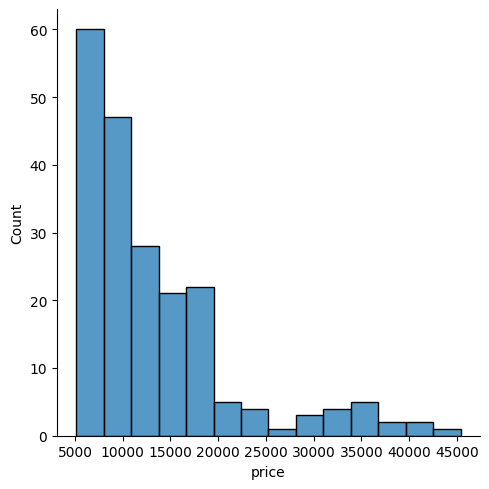

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.displot(x=df[i])
        plt.show();

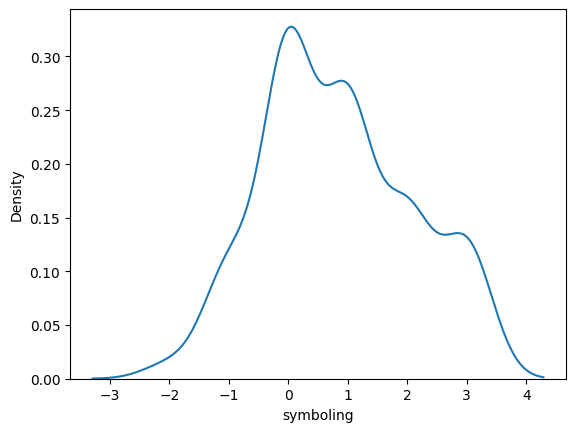

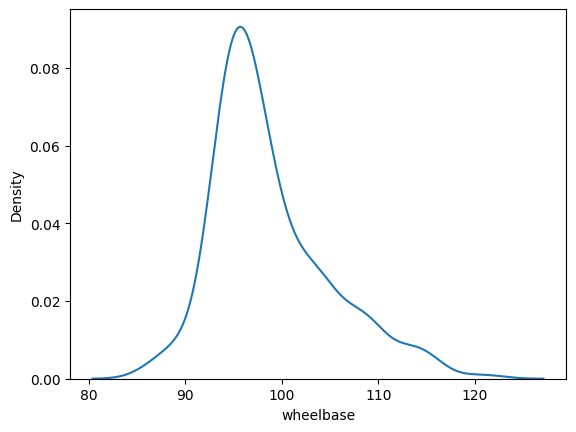

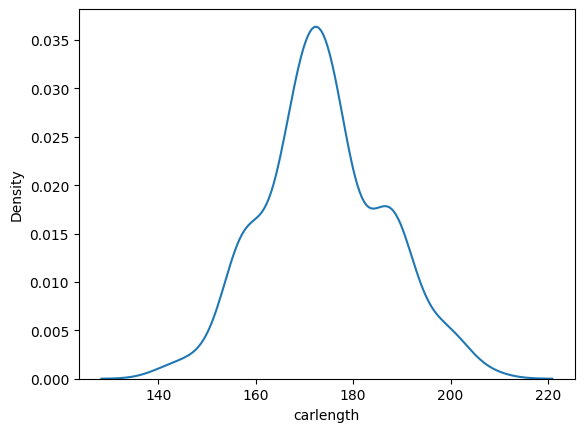

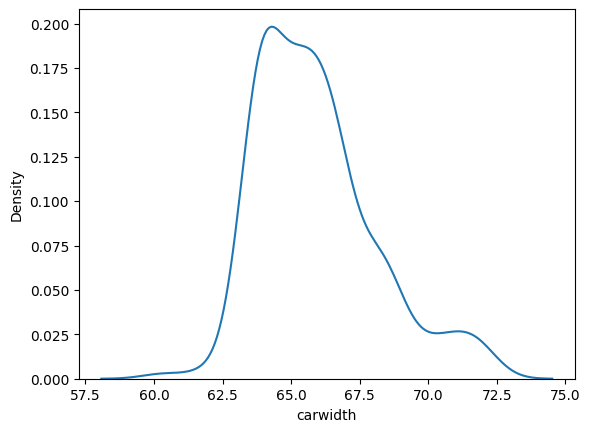

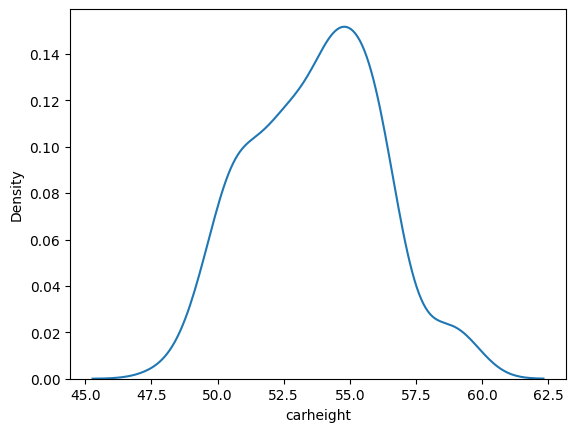

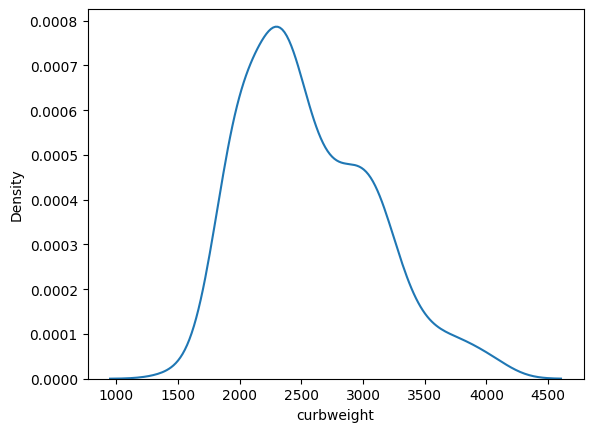

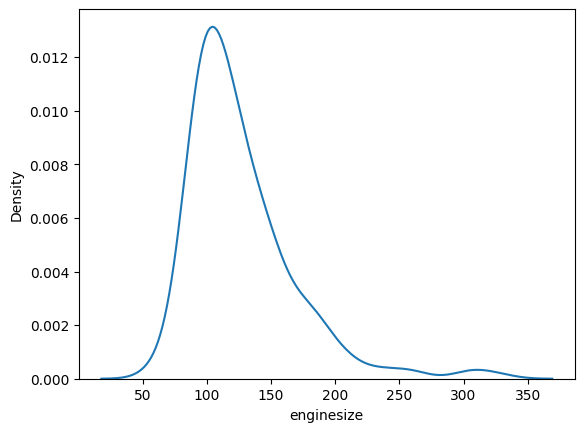

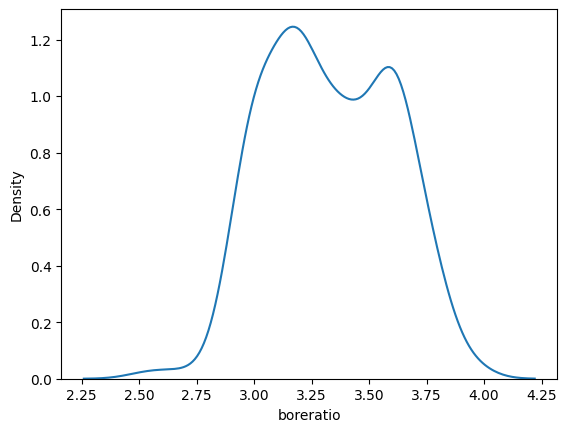

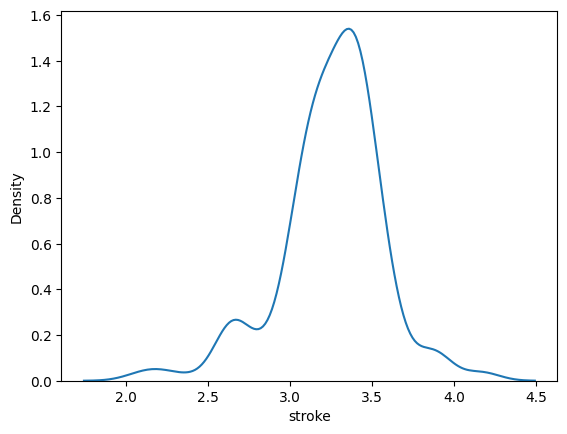

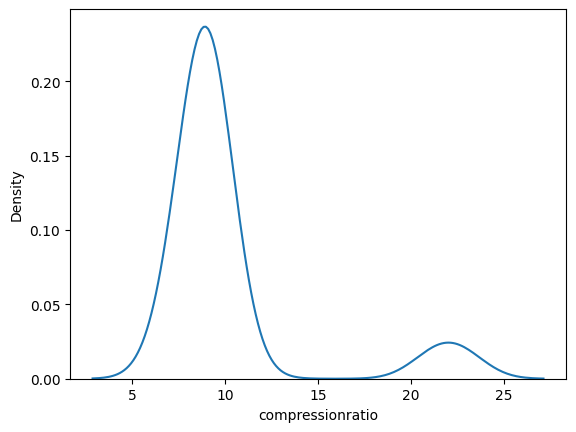

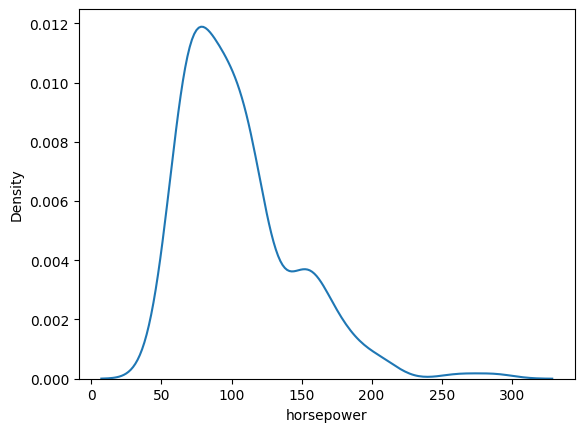

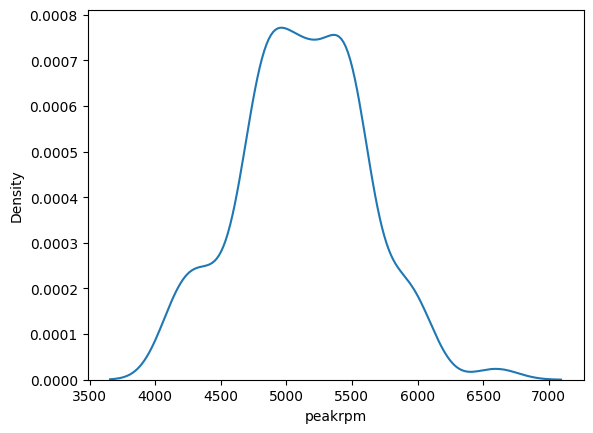

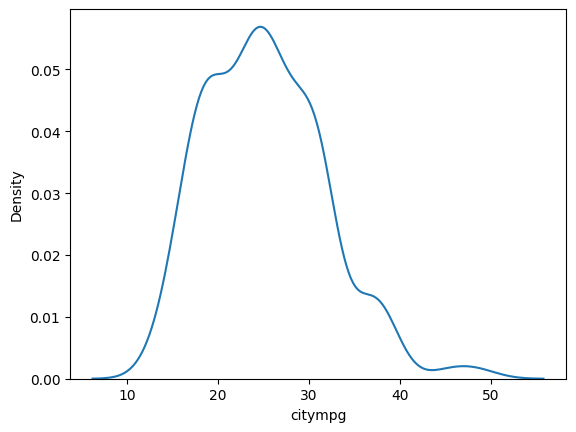

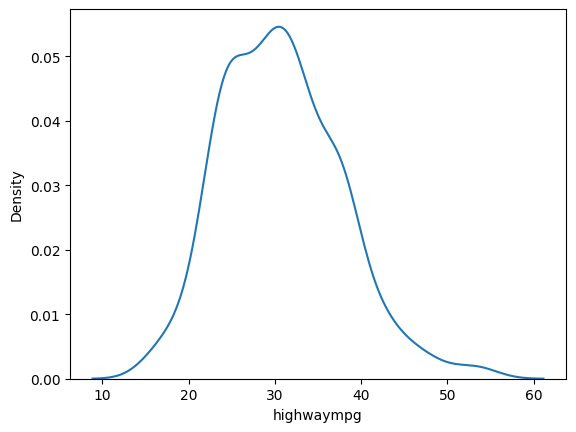

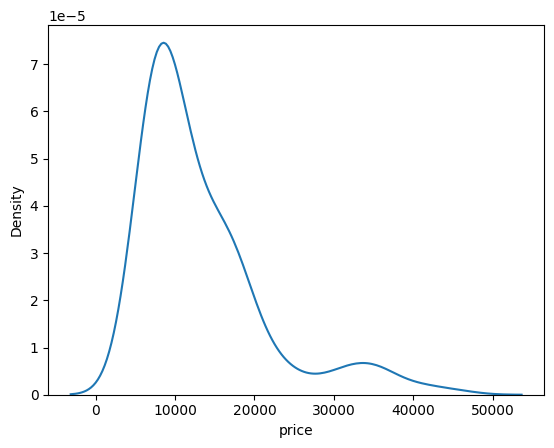

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

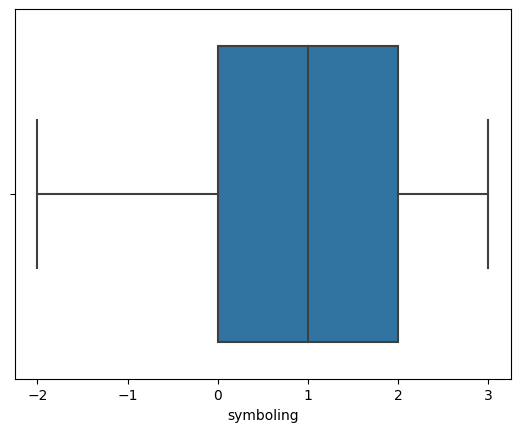

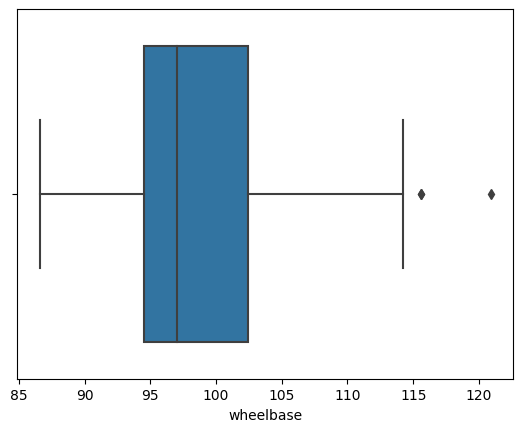

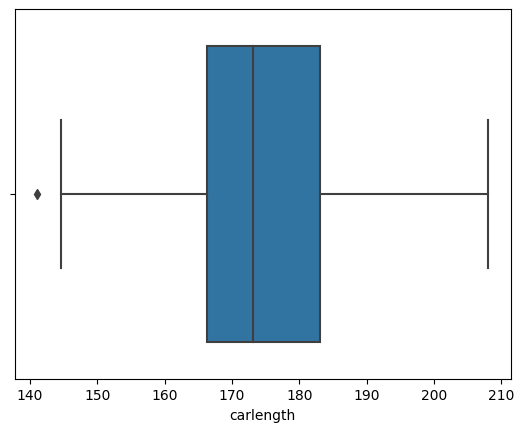

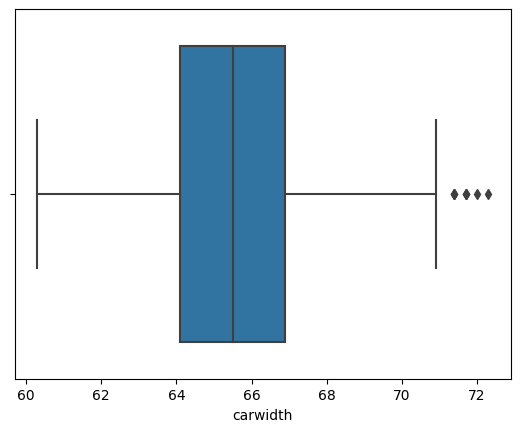

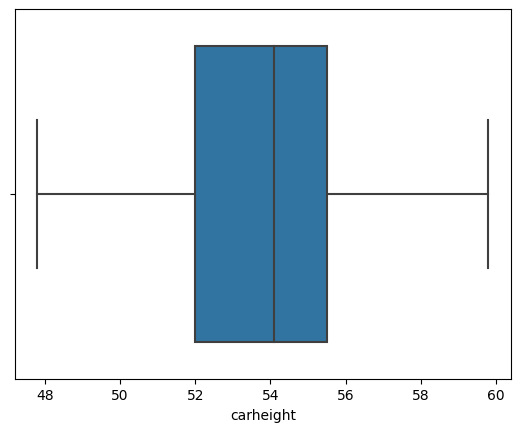

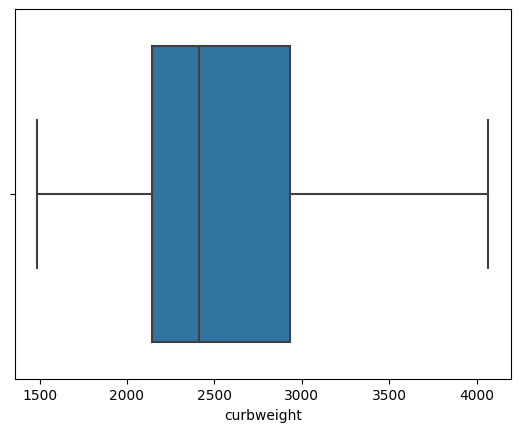

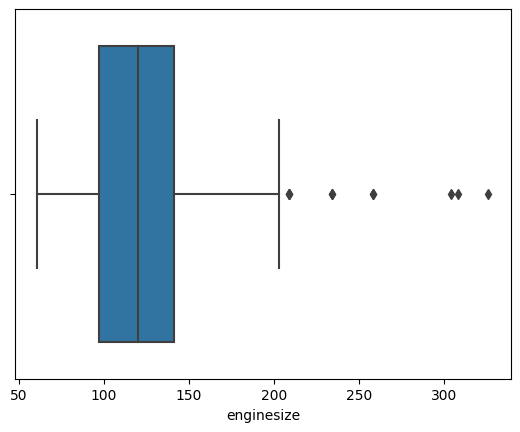

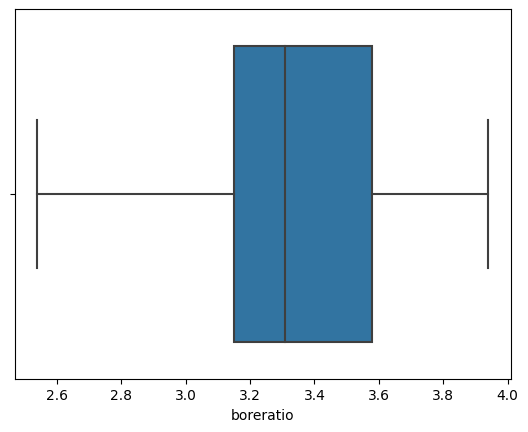

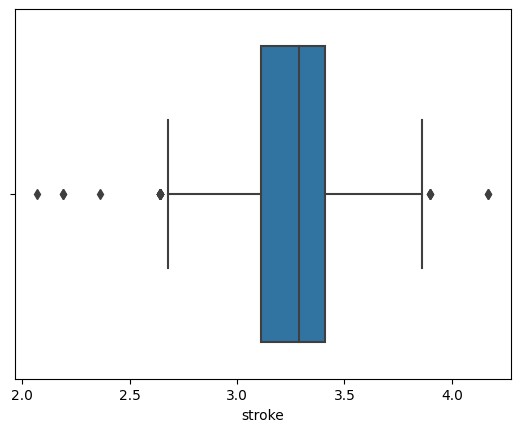

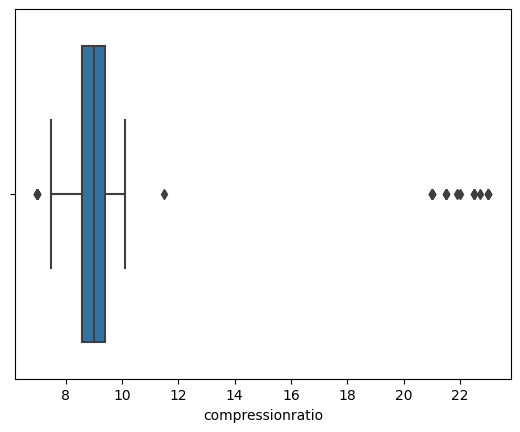

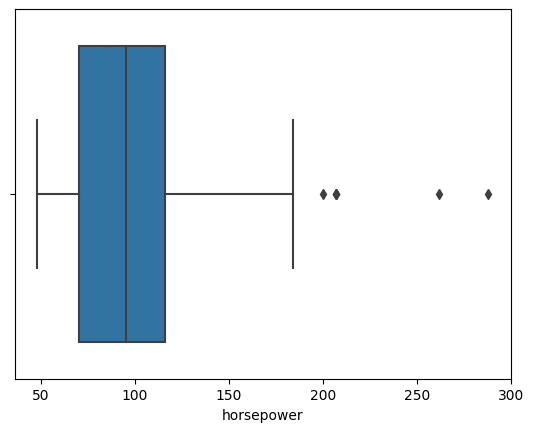

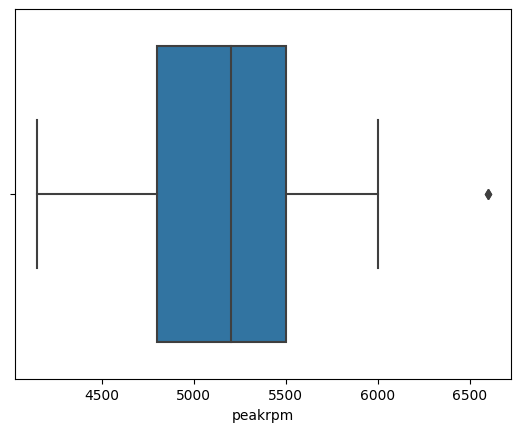

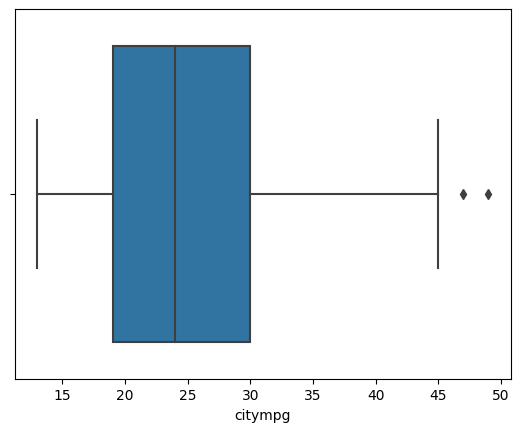

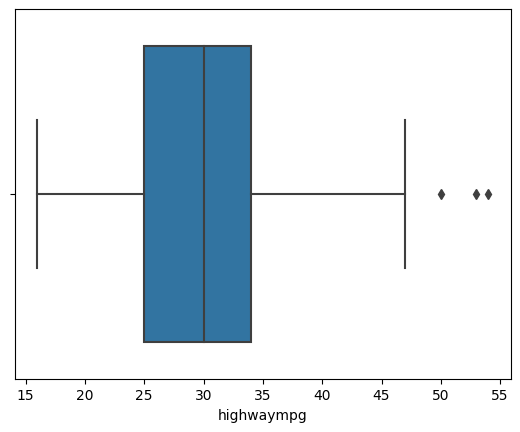

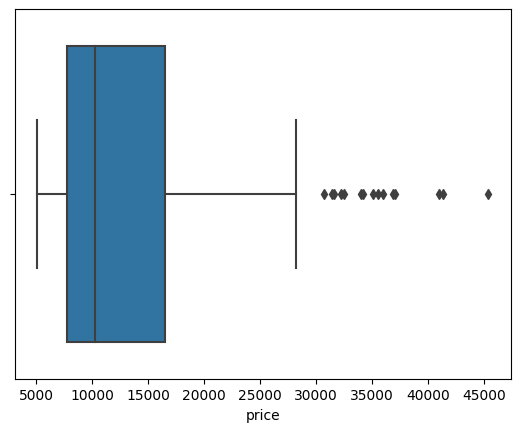

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(x=df[i])
        plt.show();

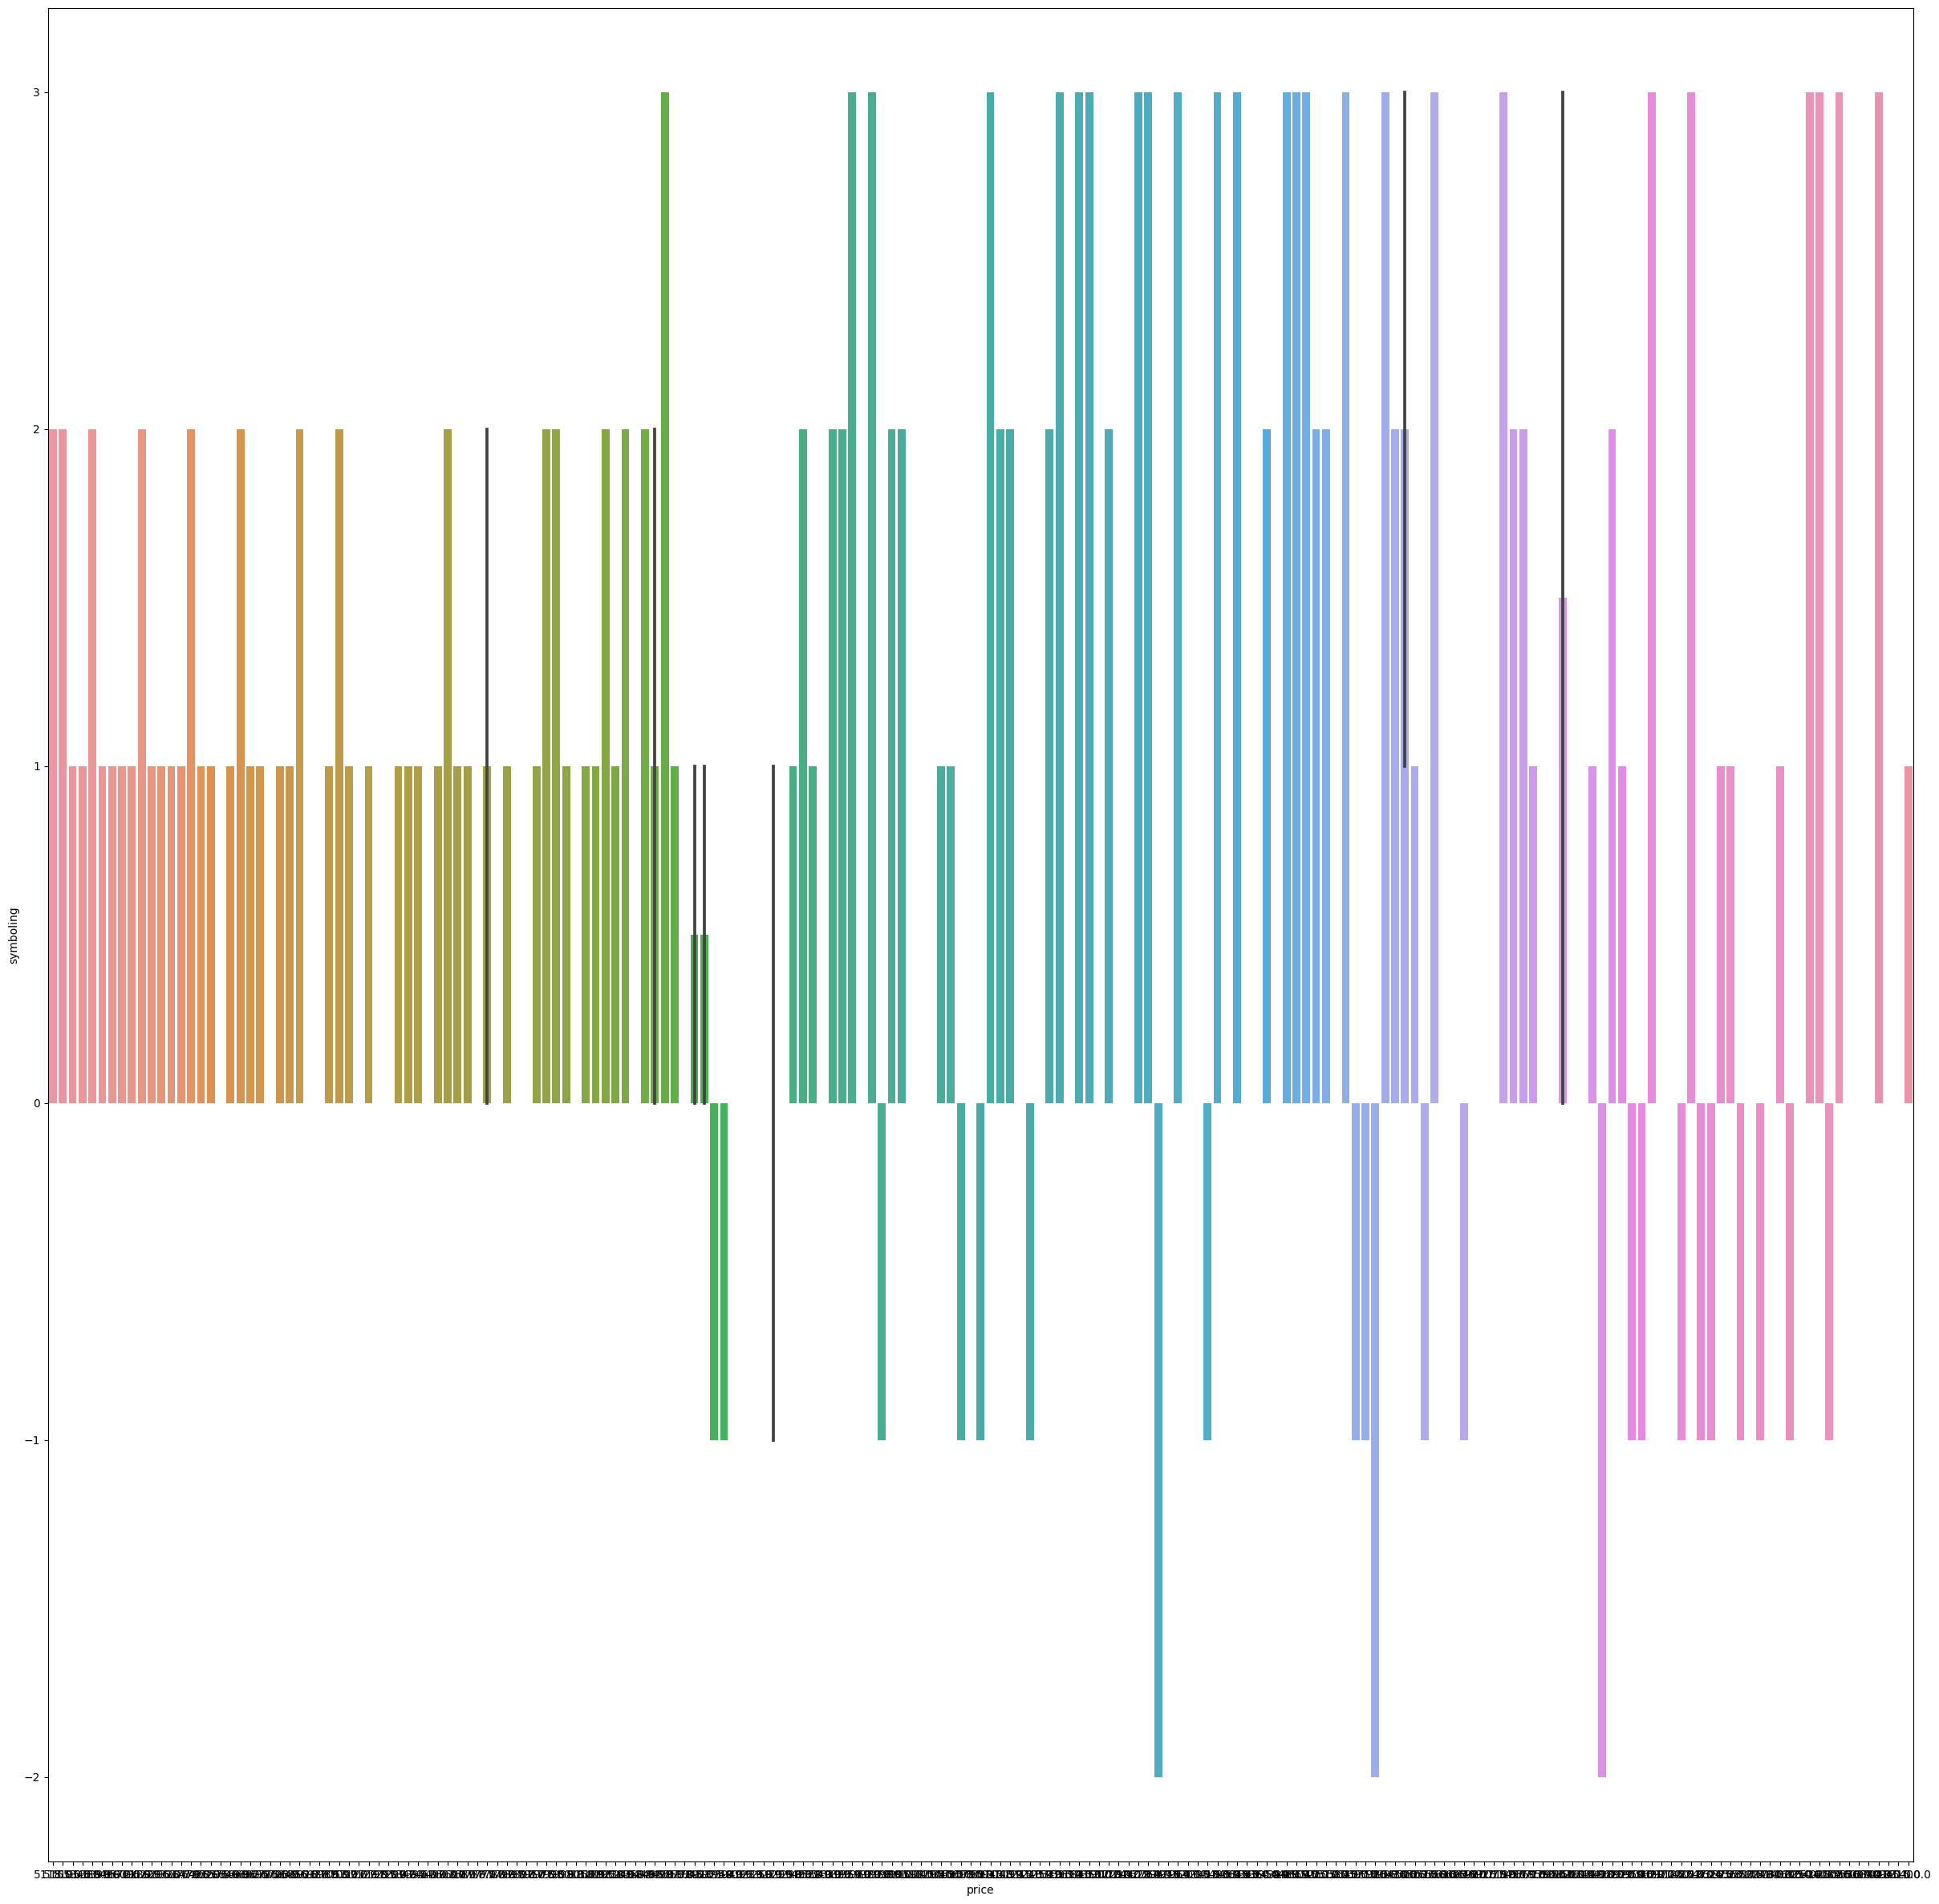

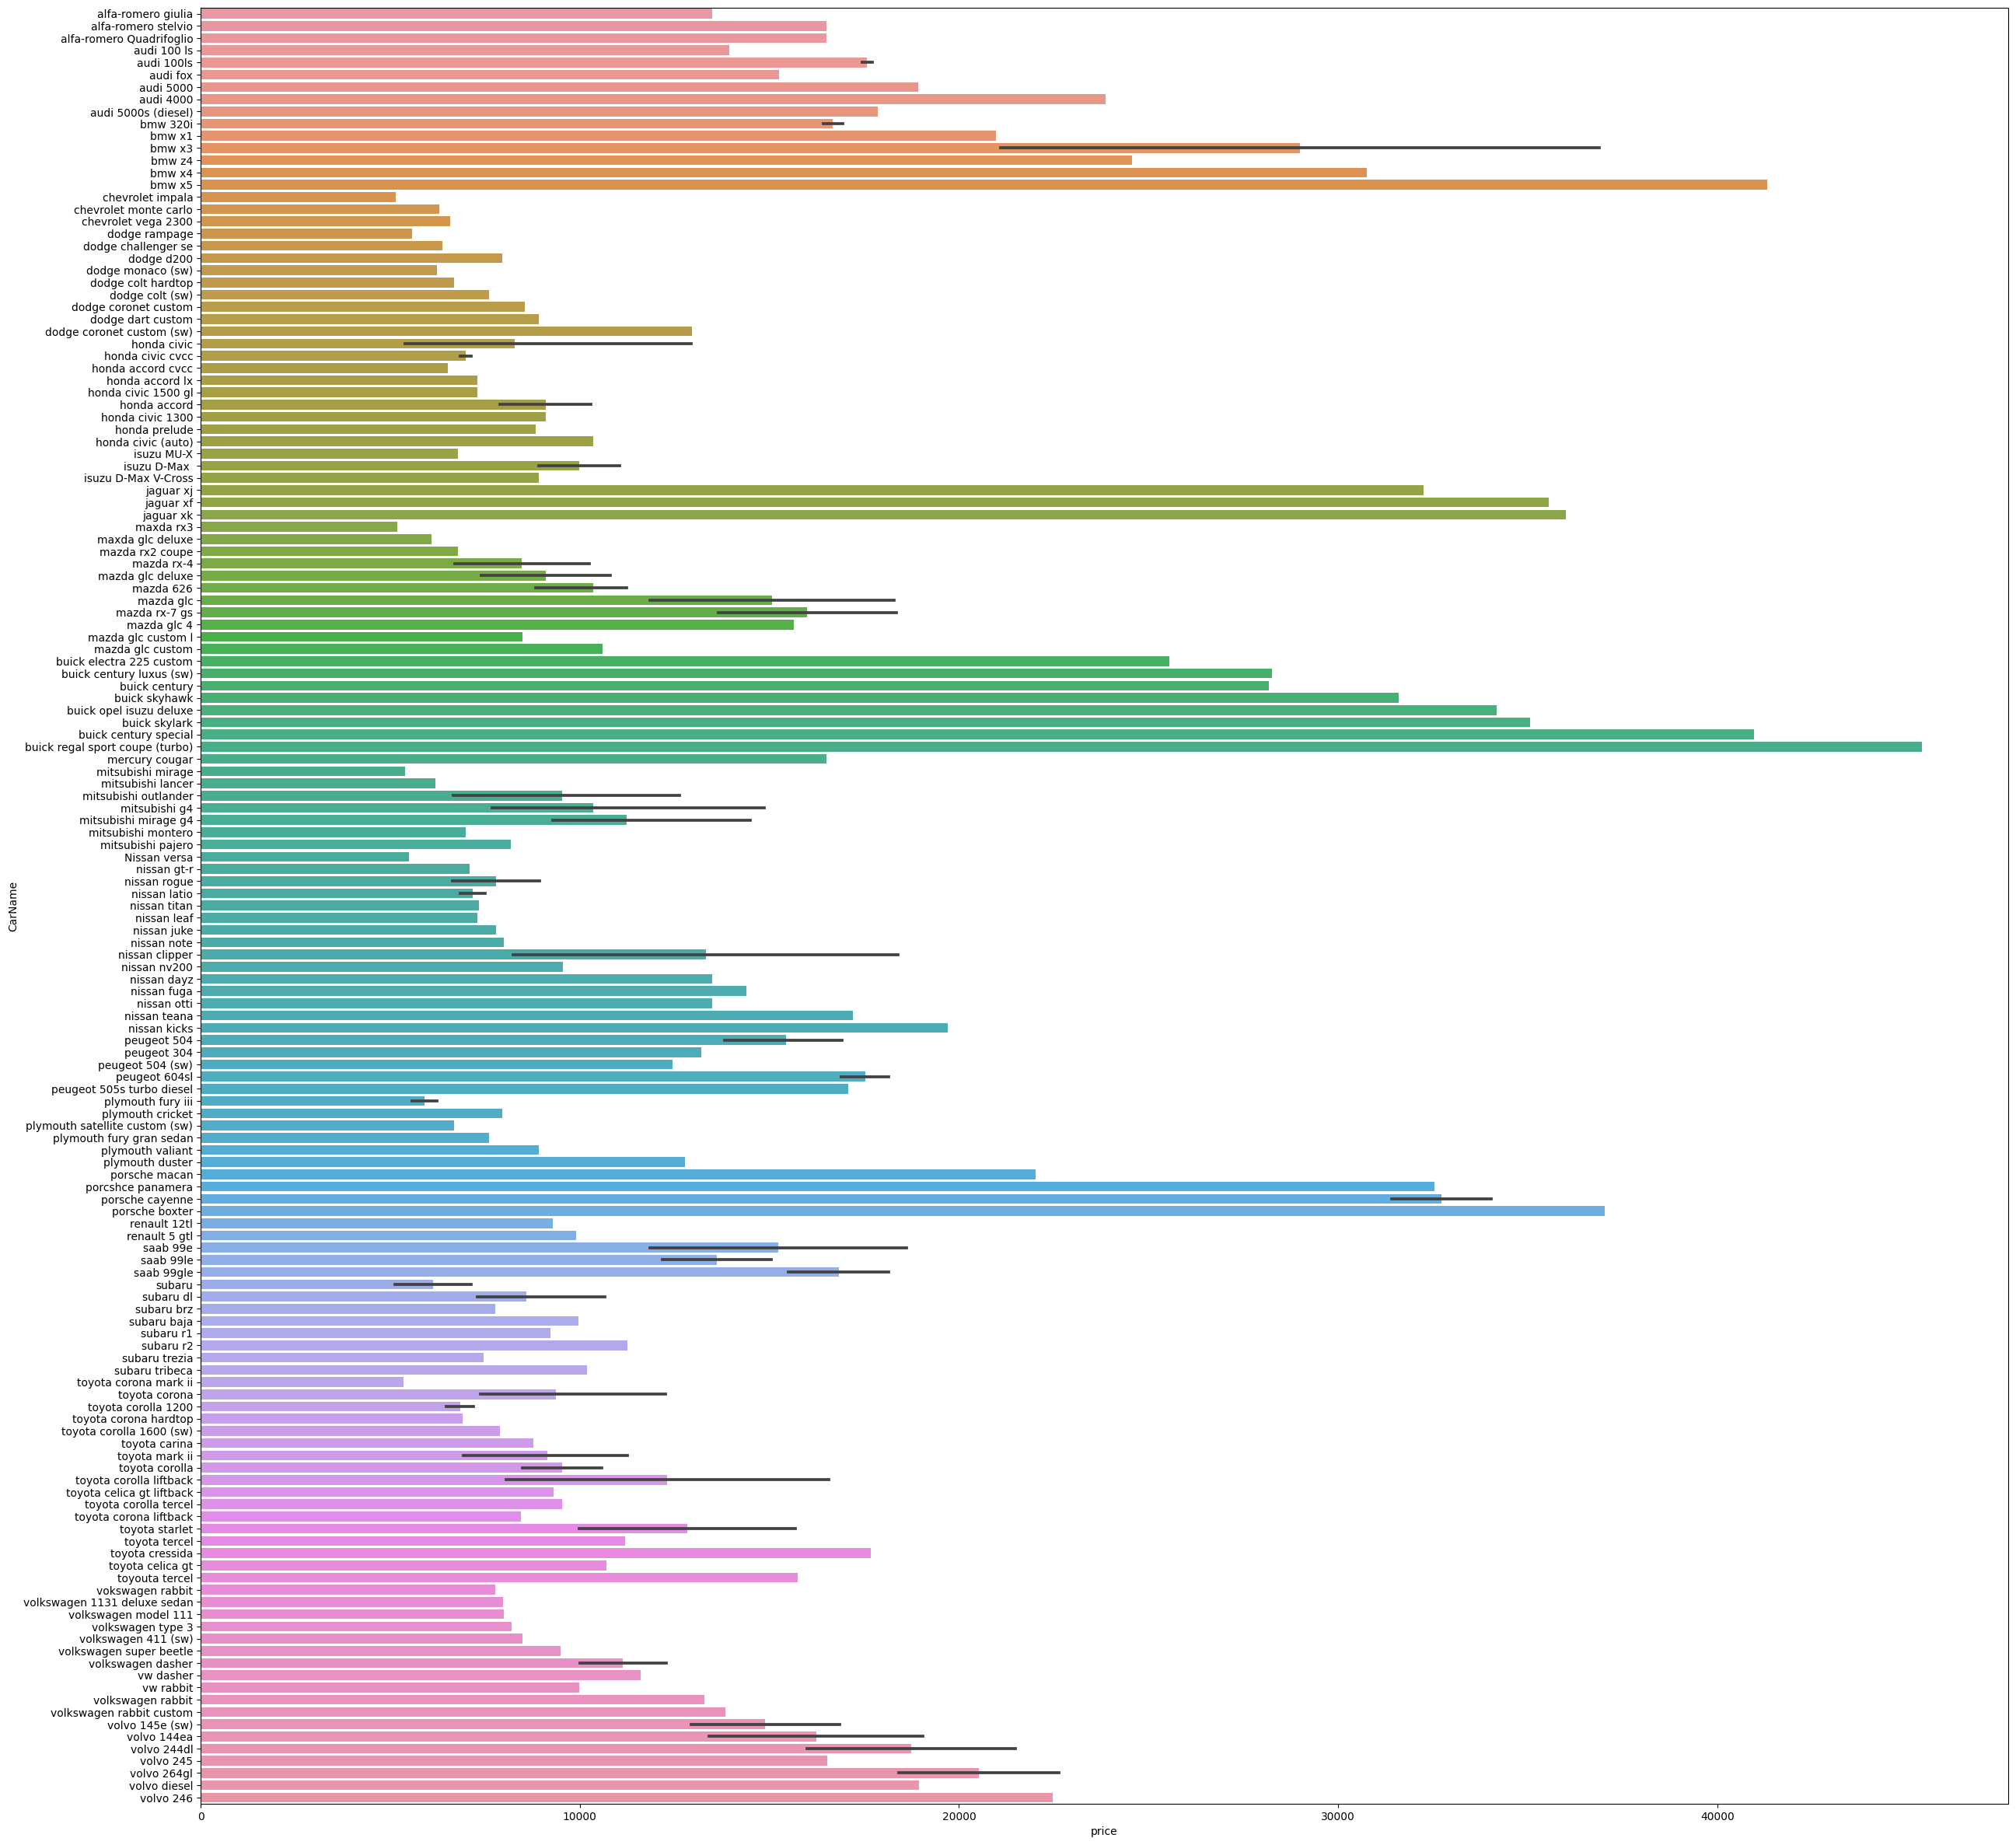

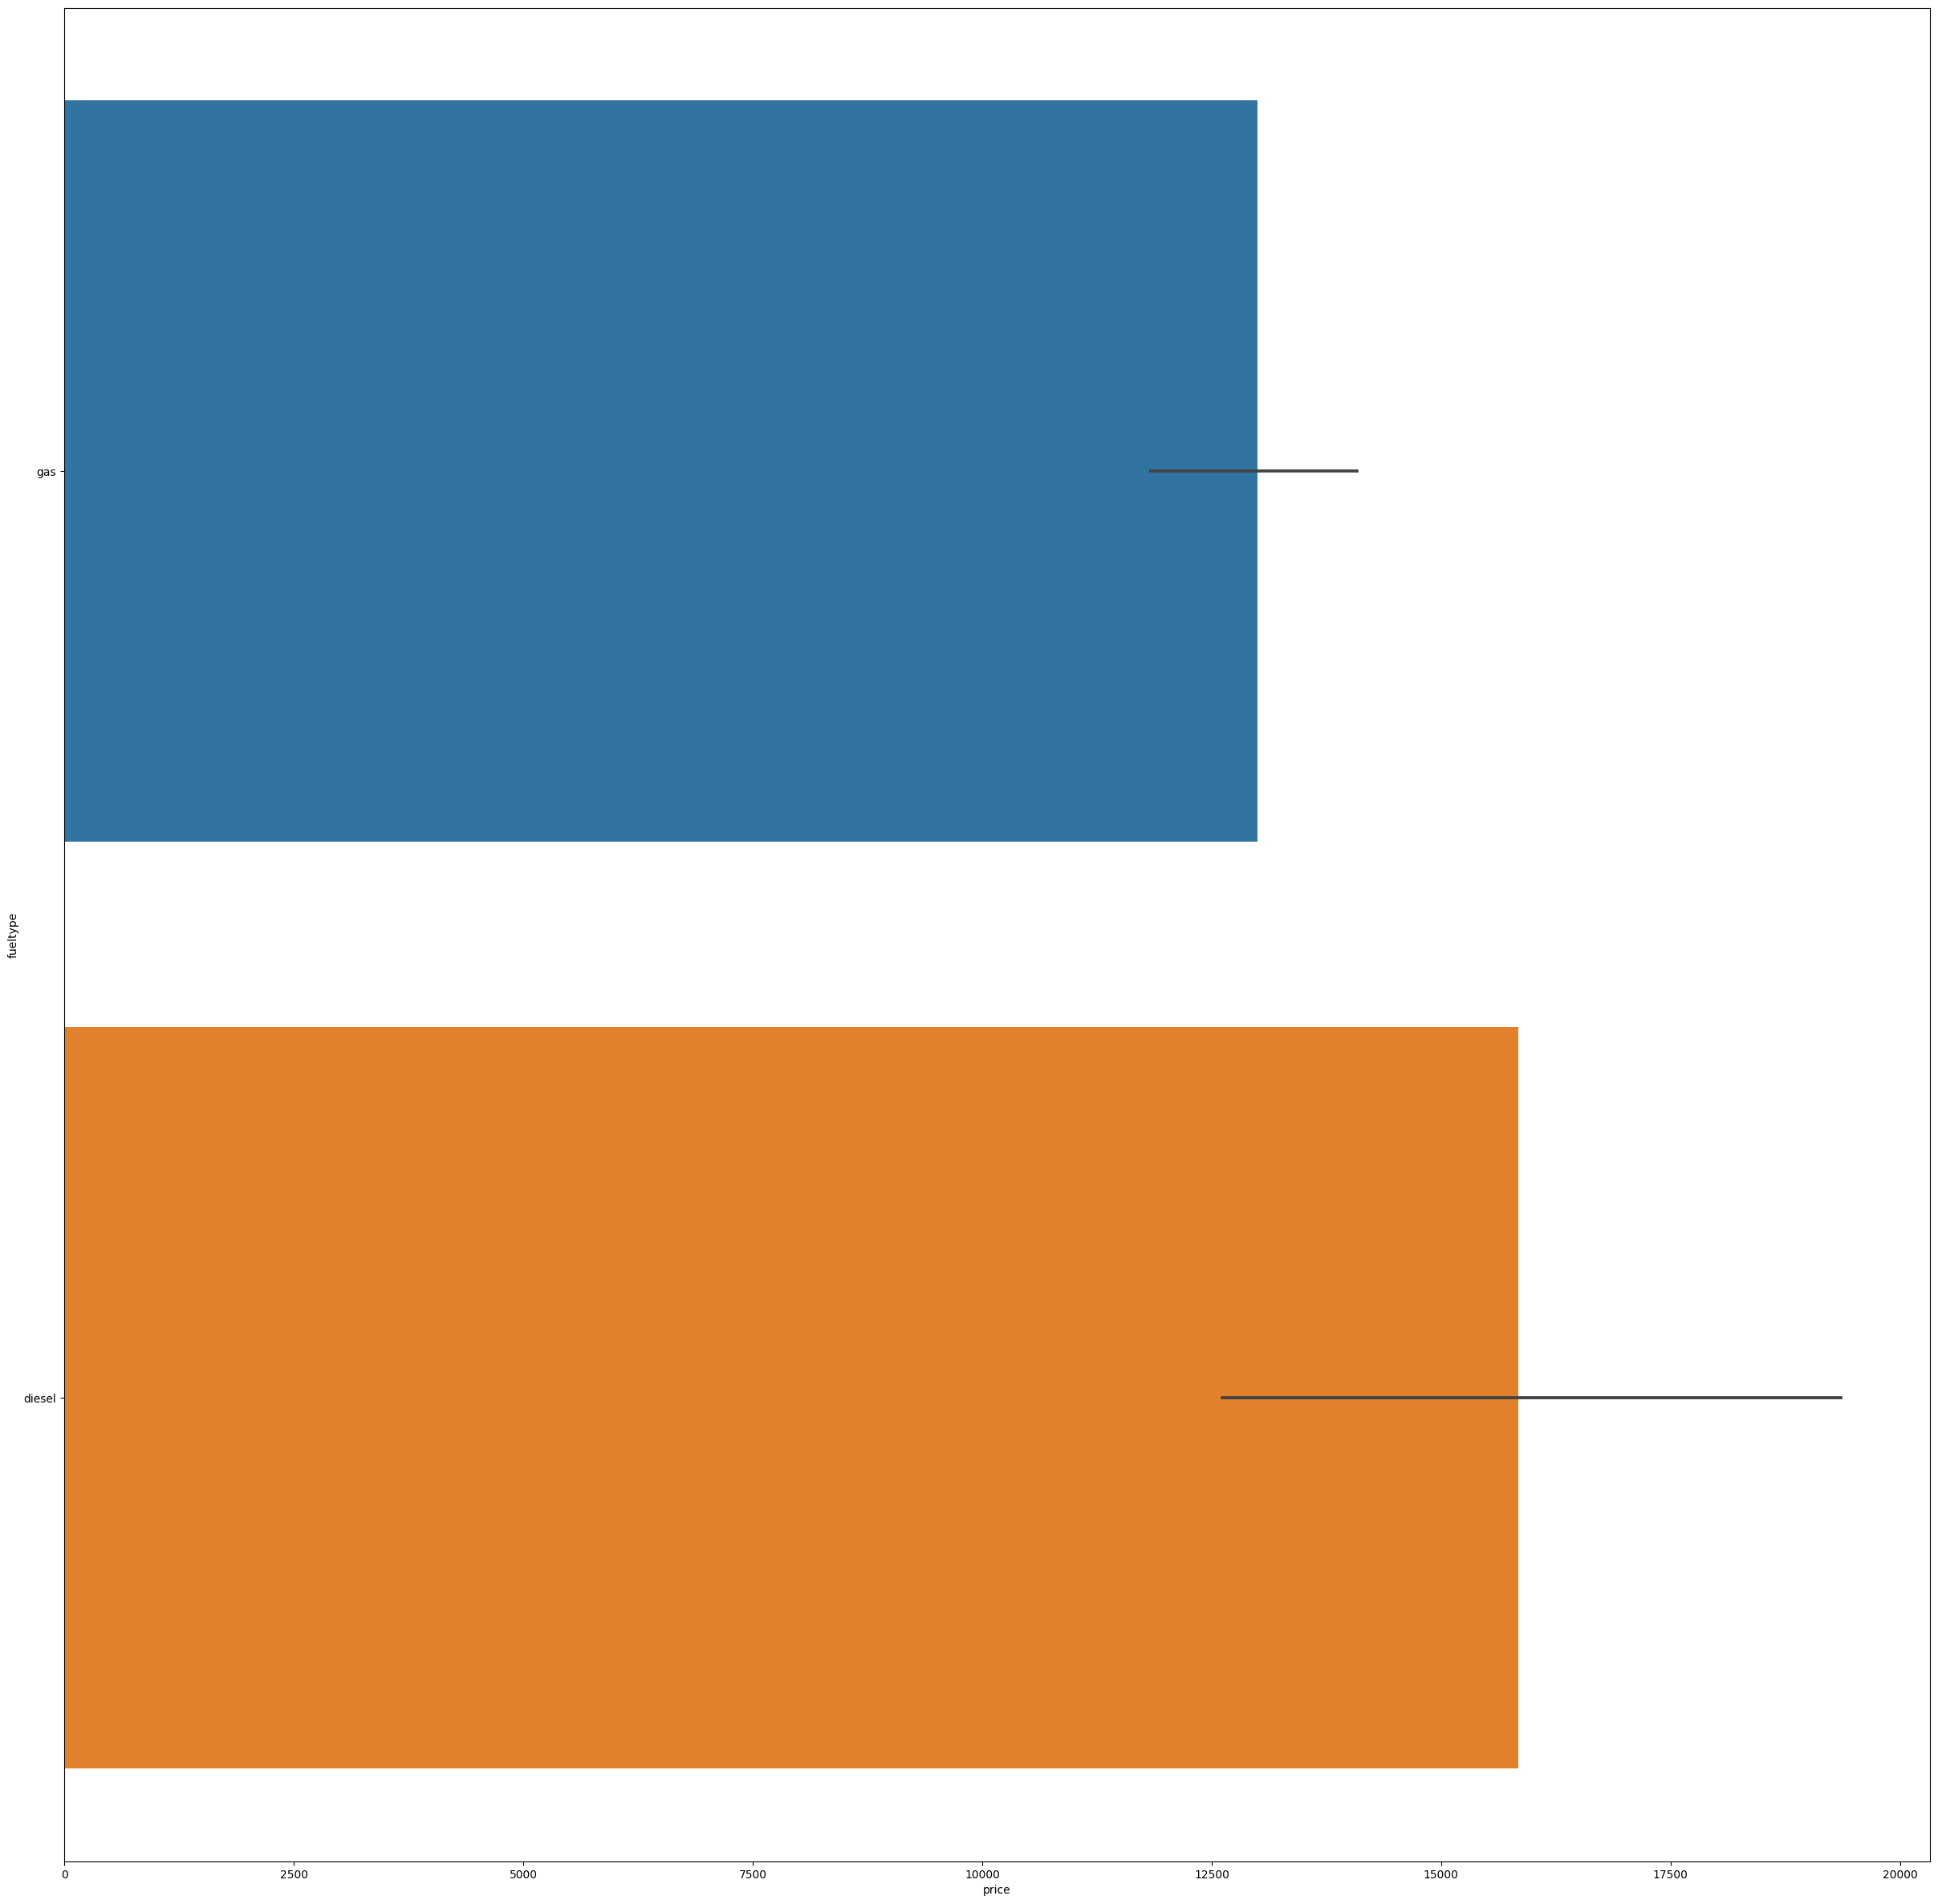

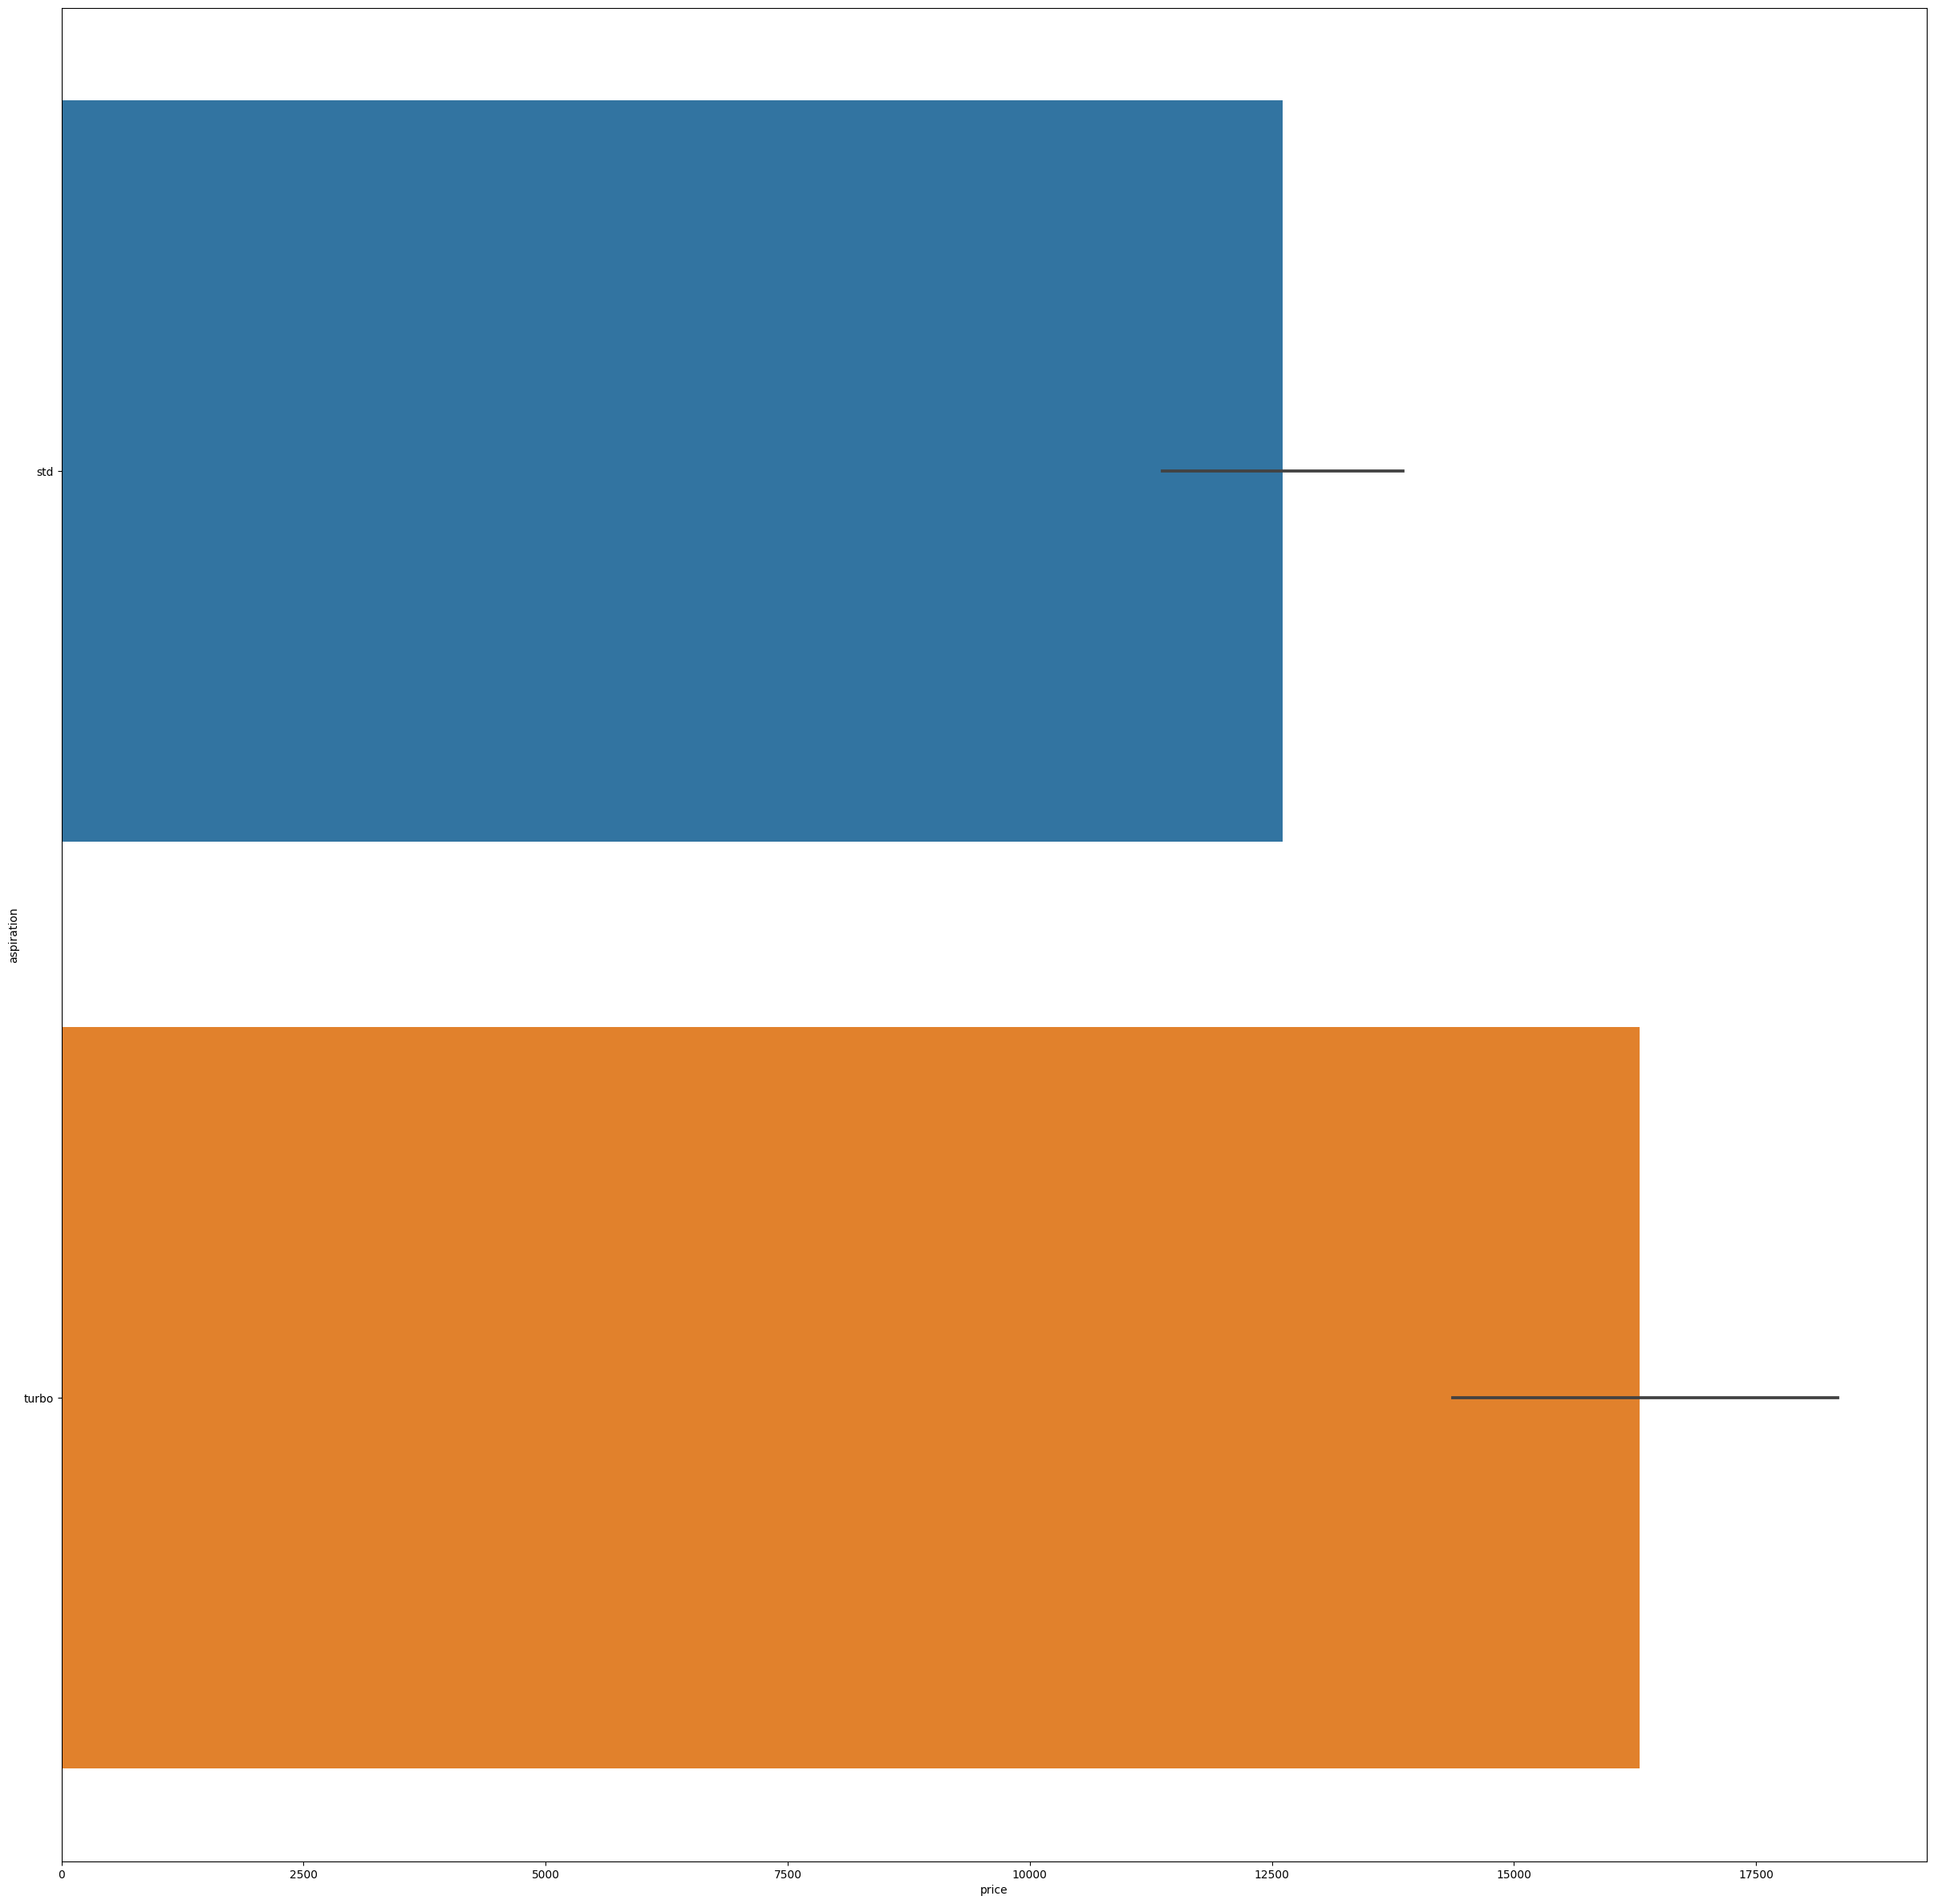

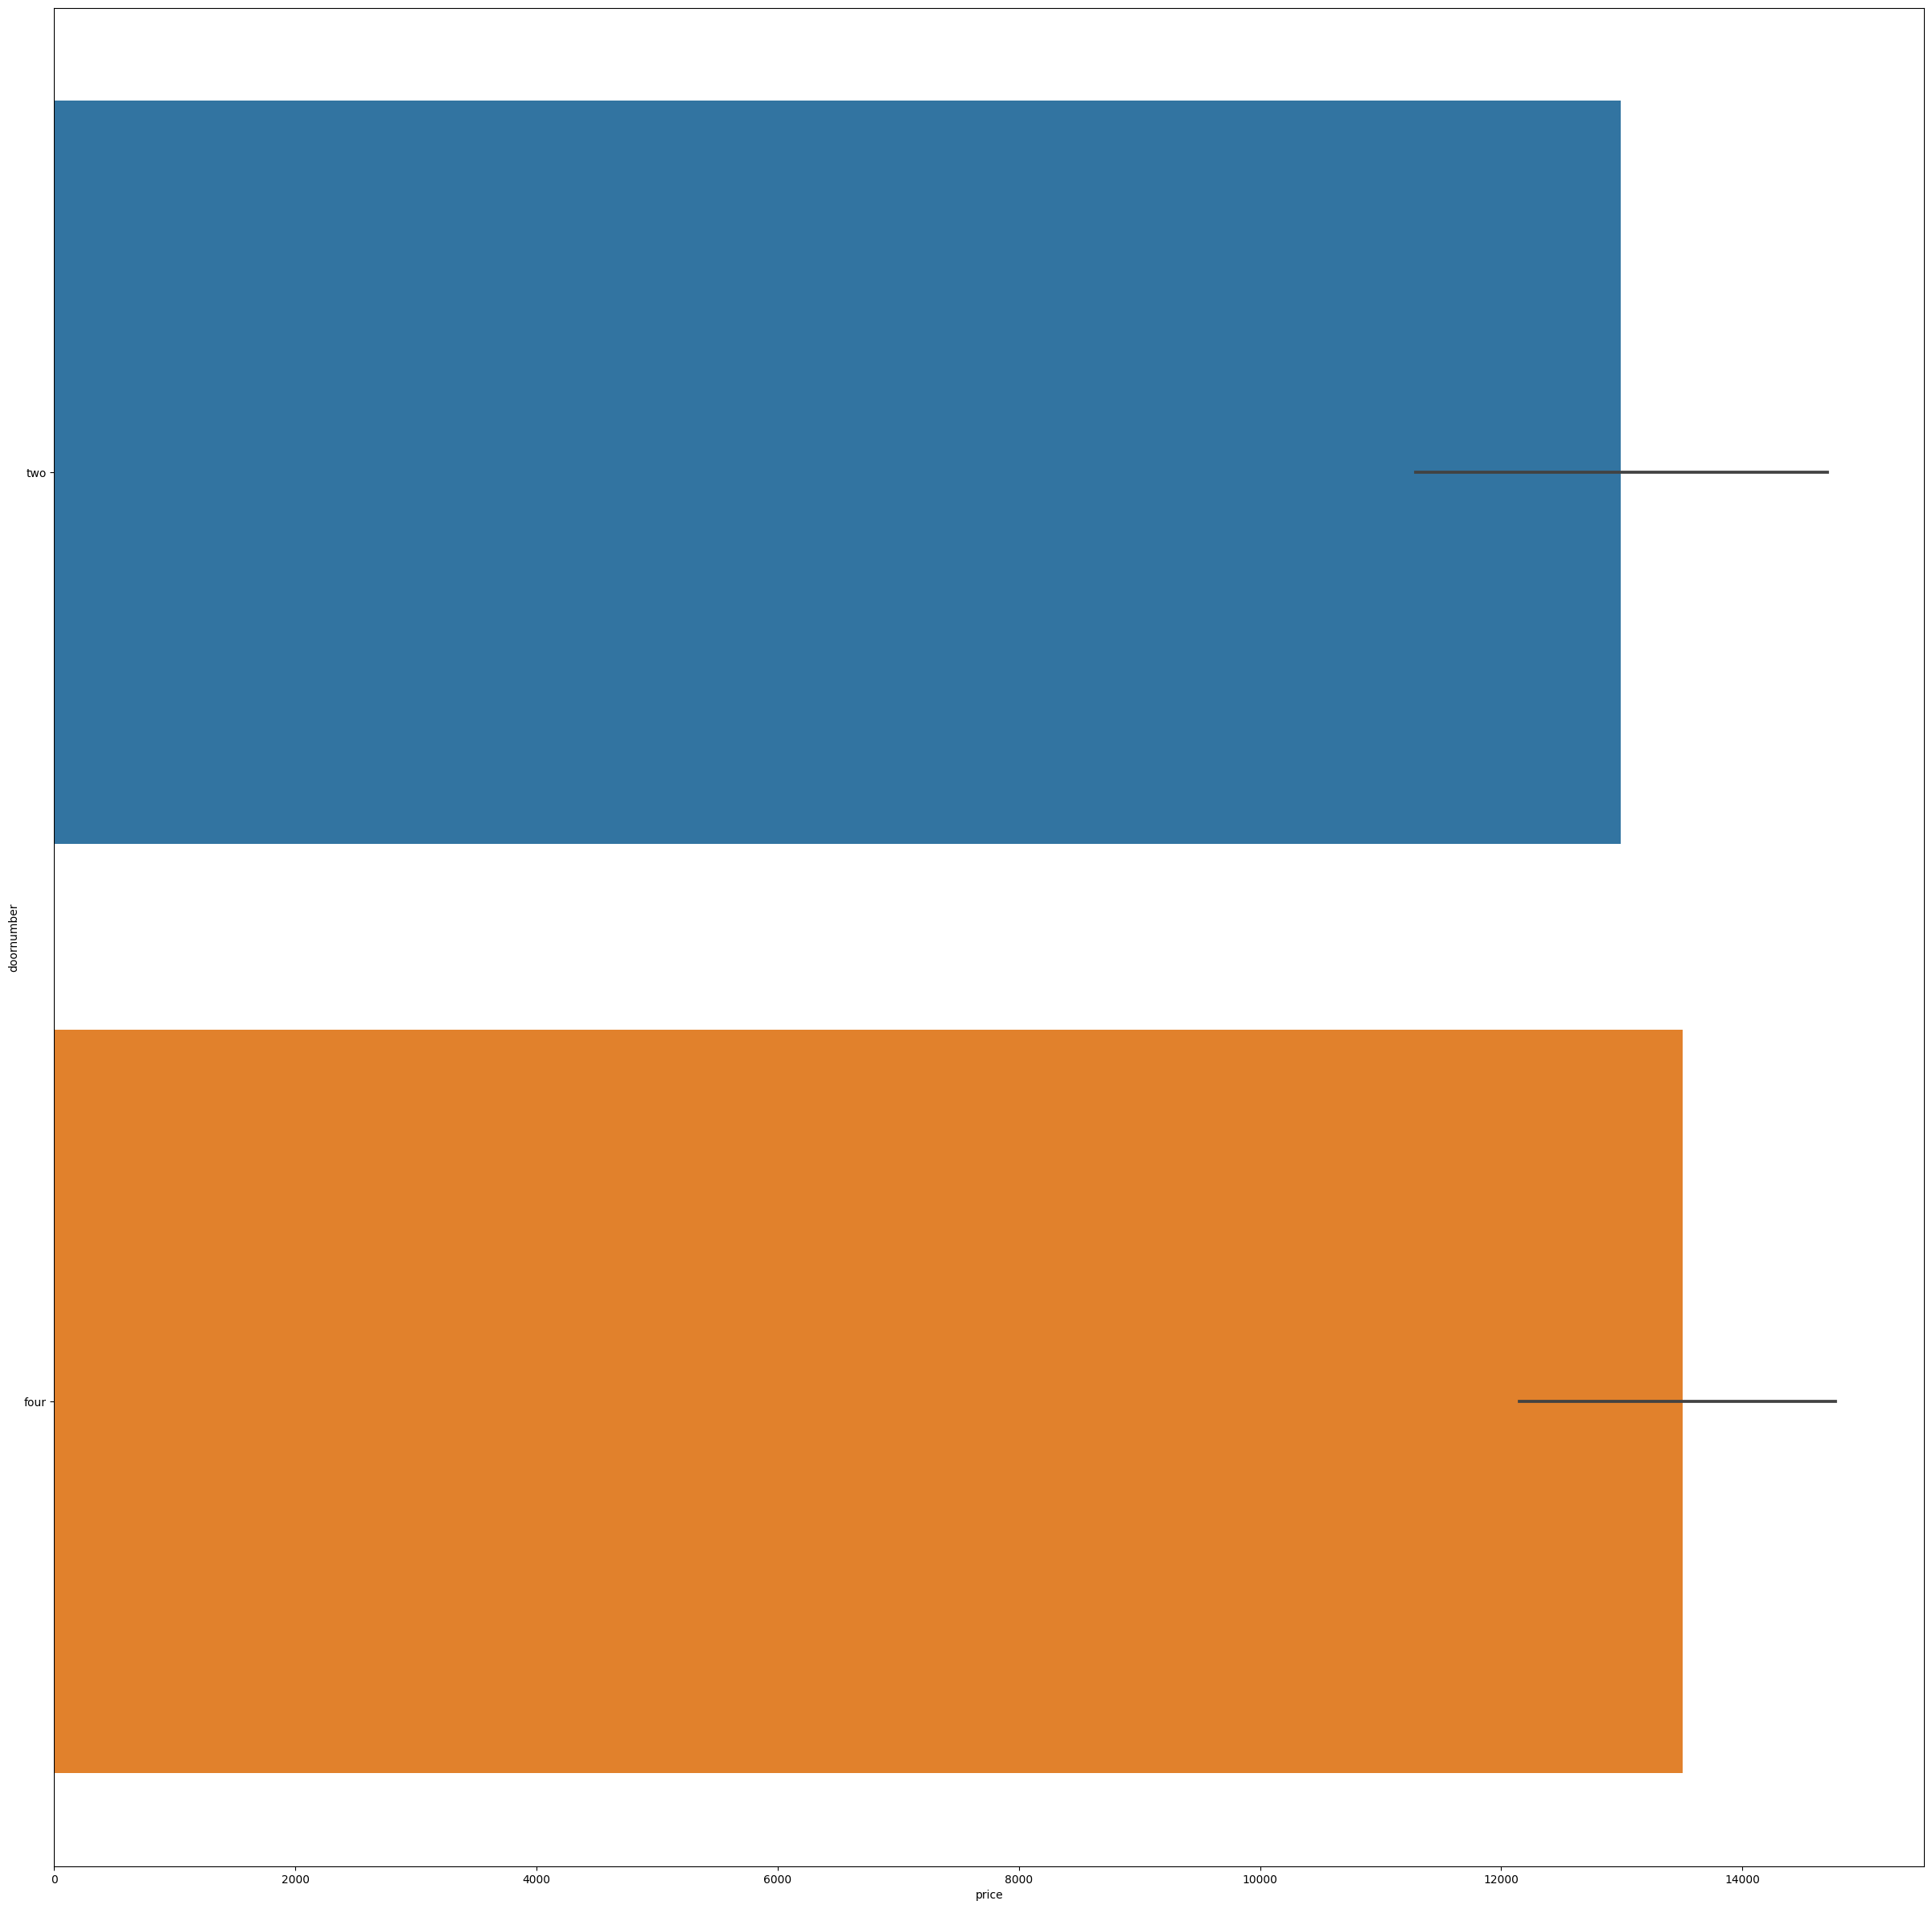

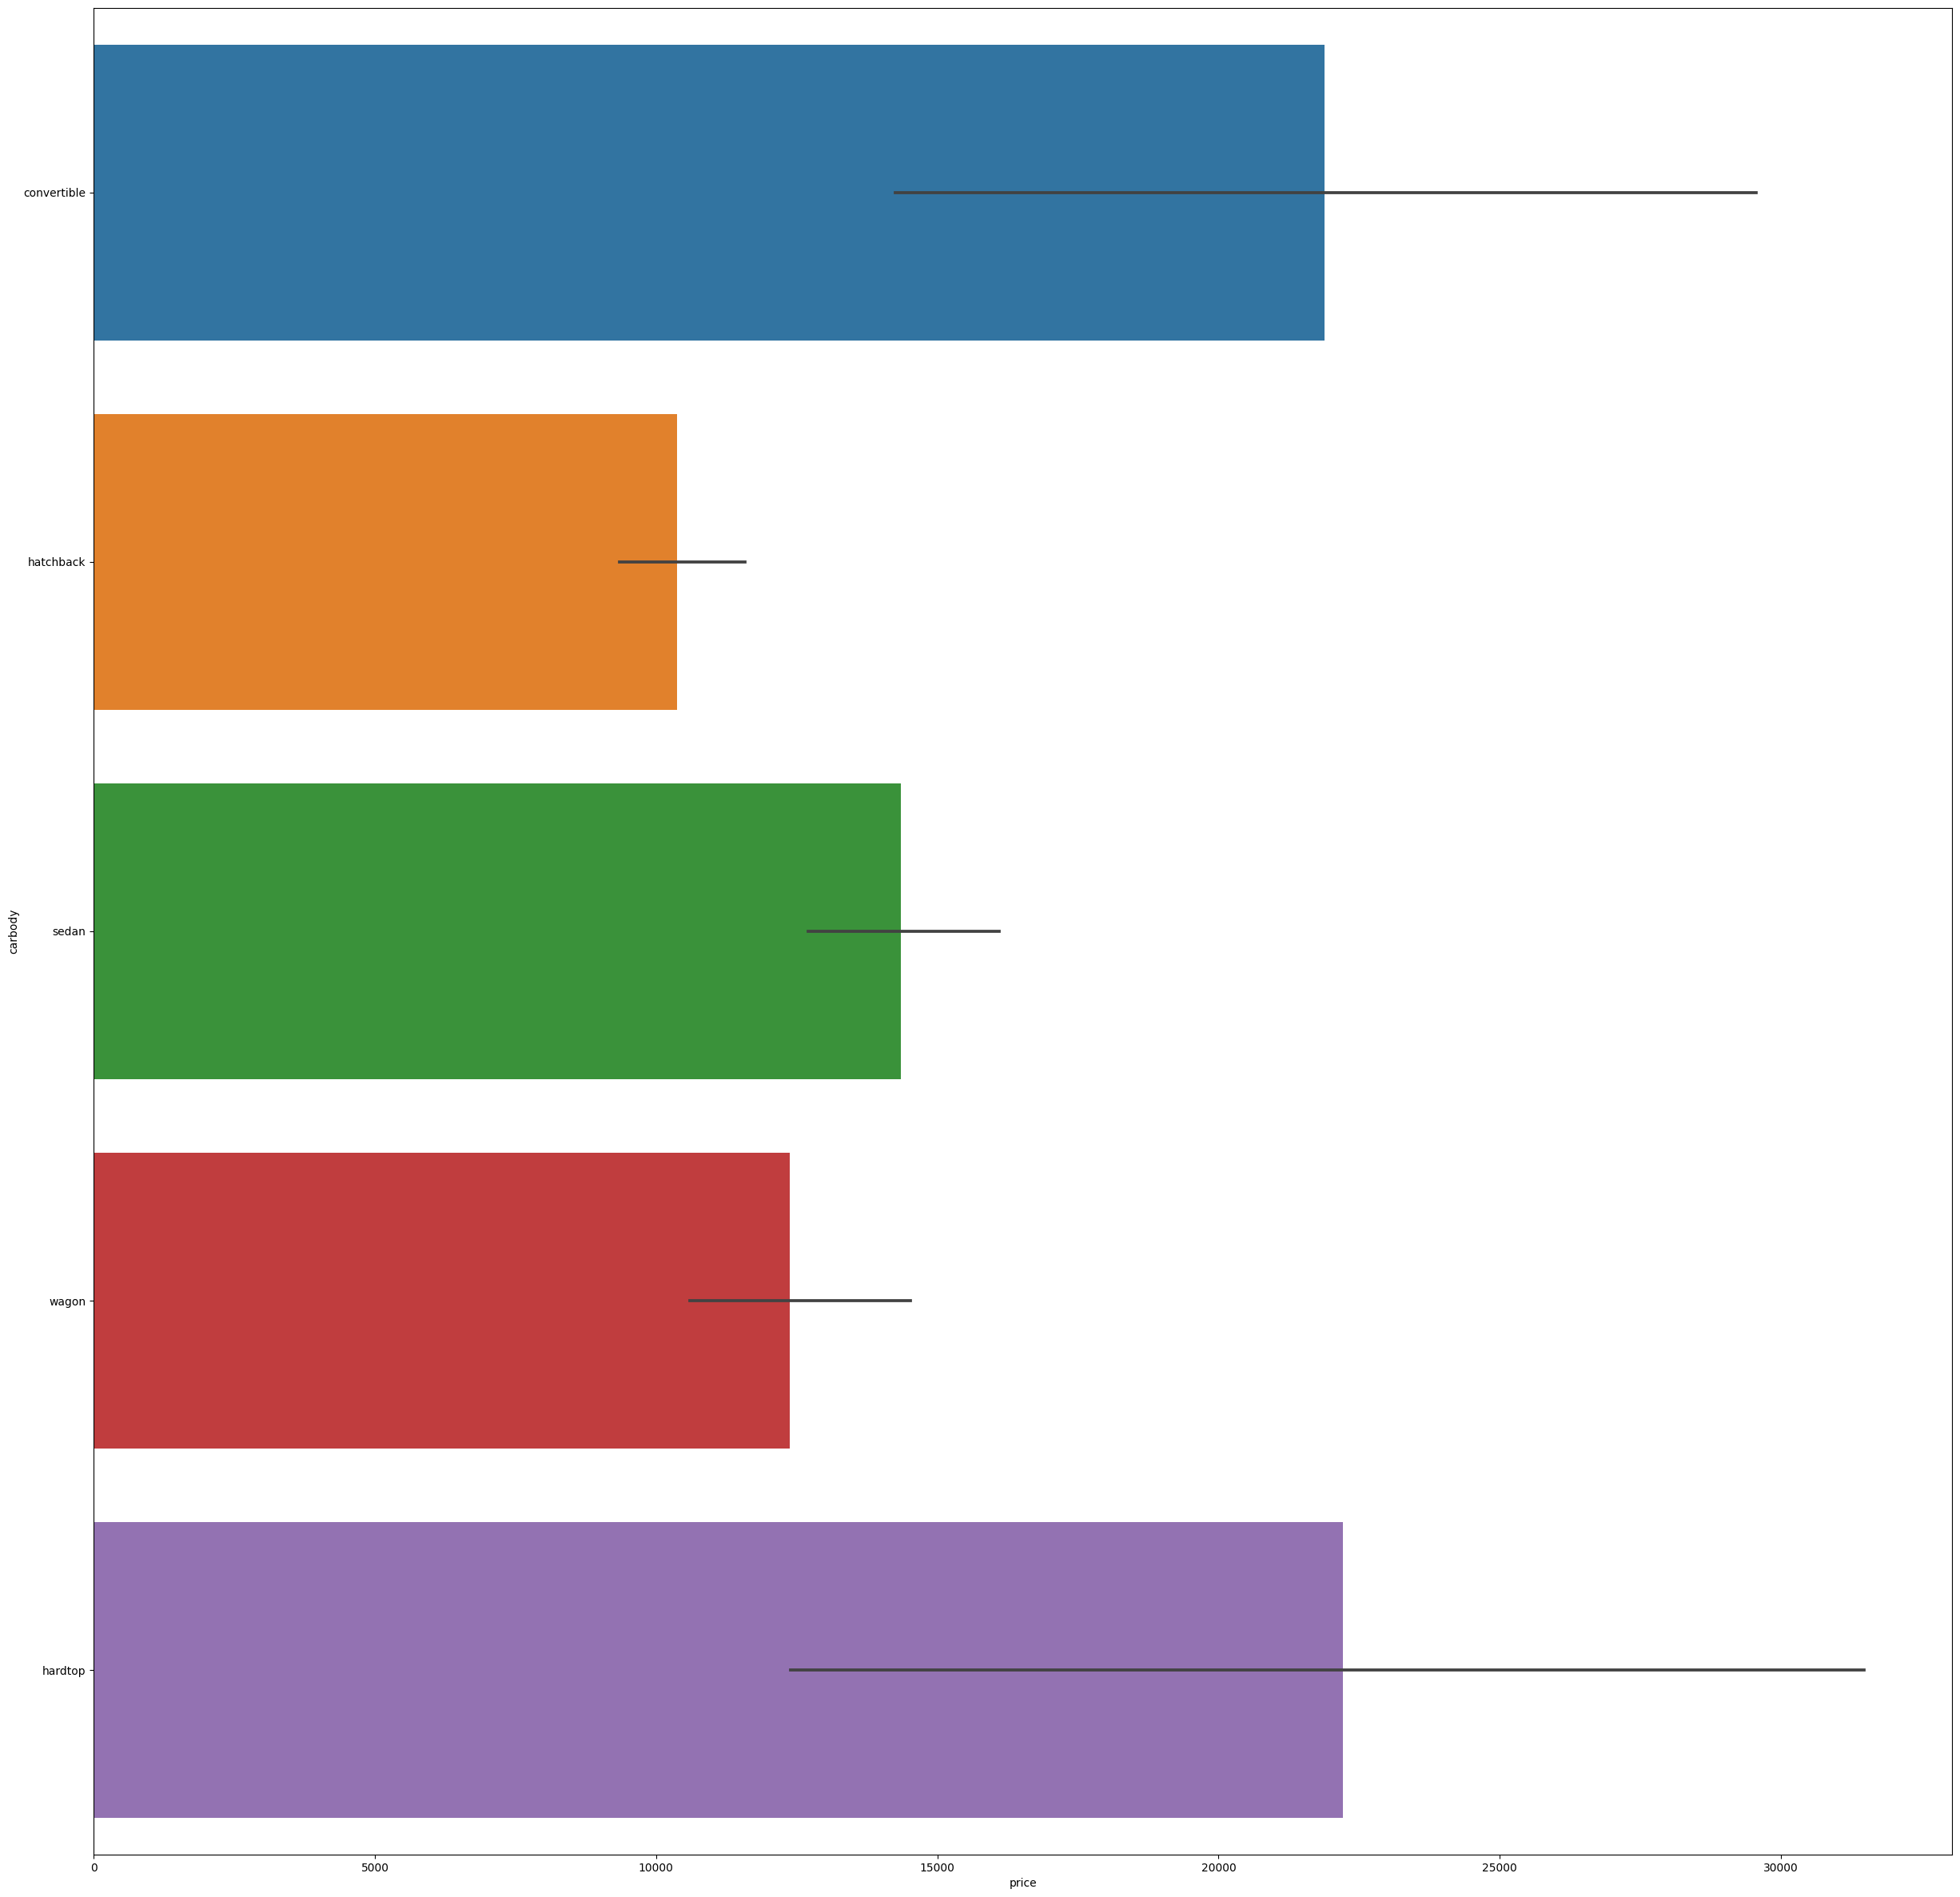

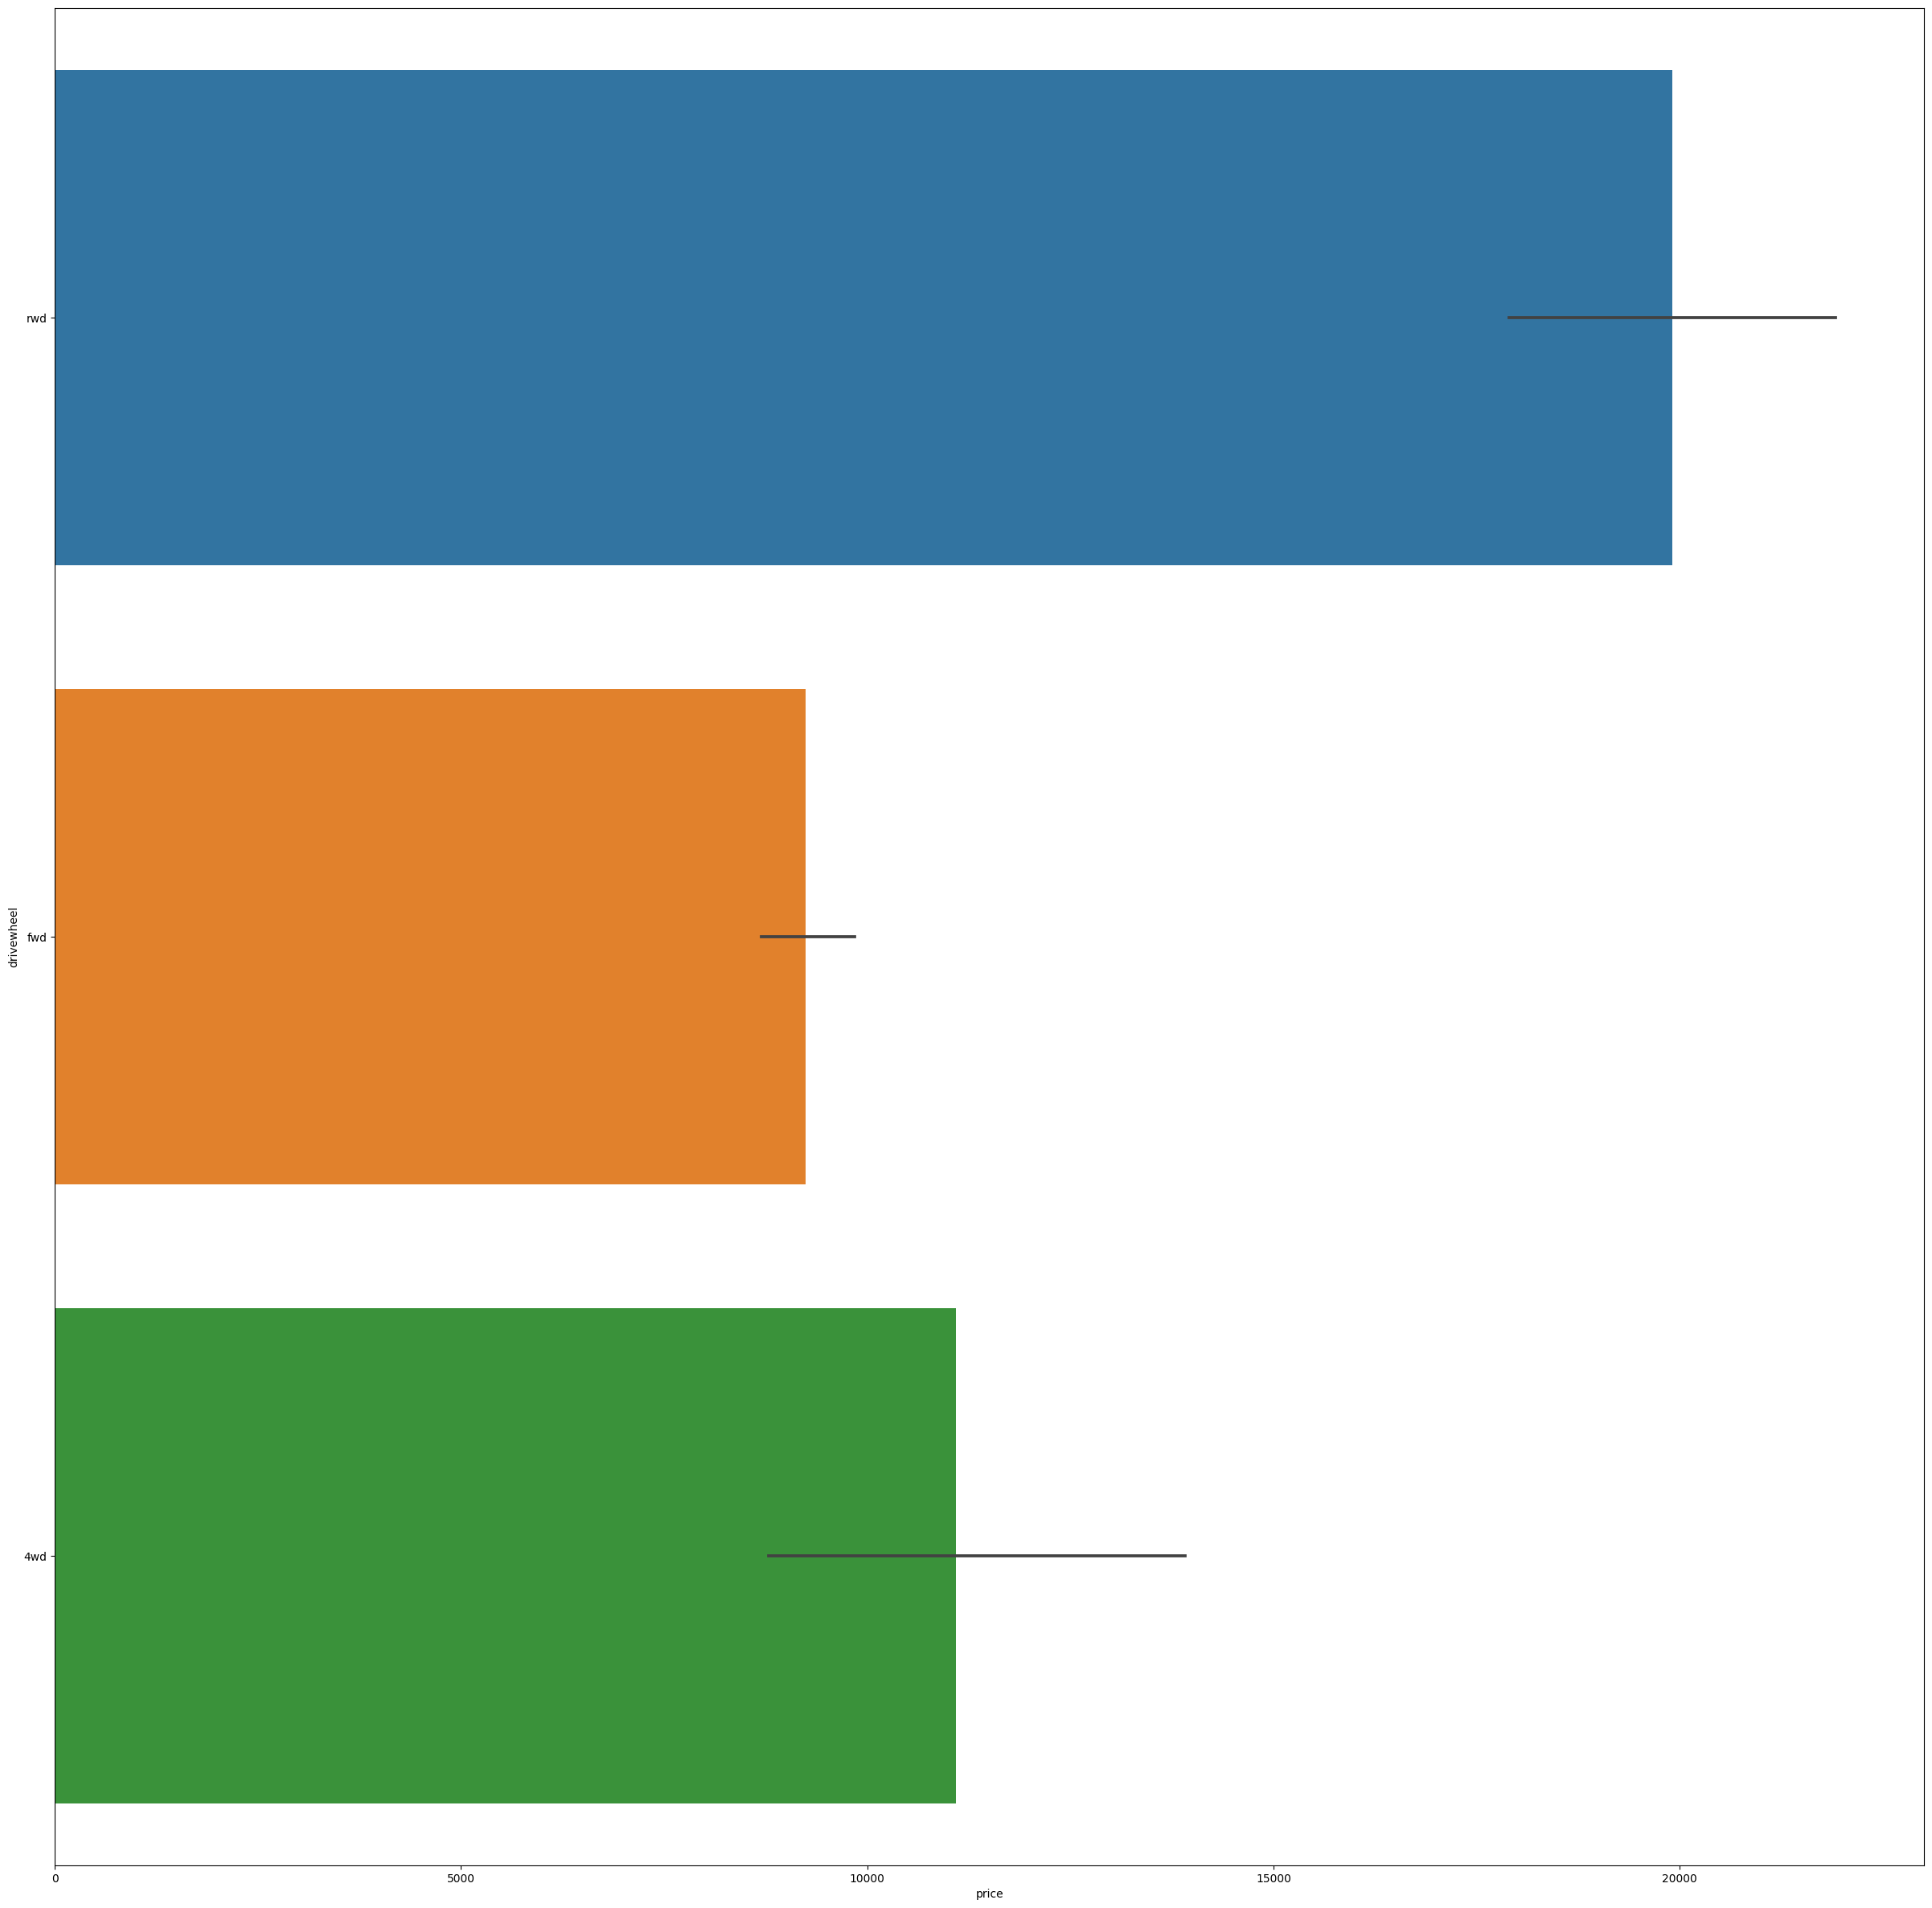

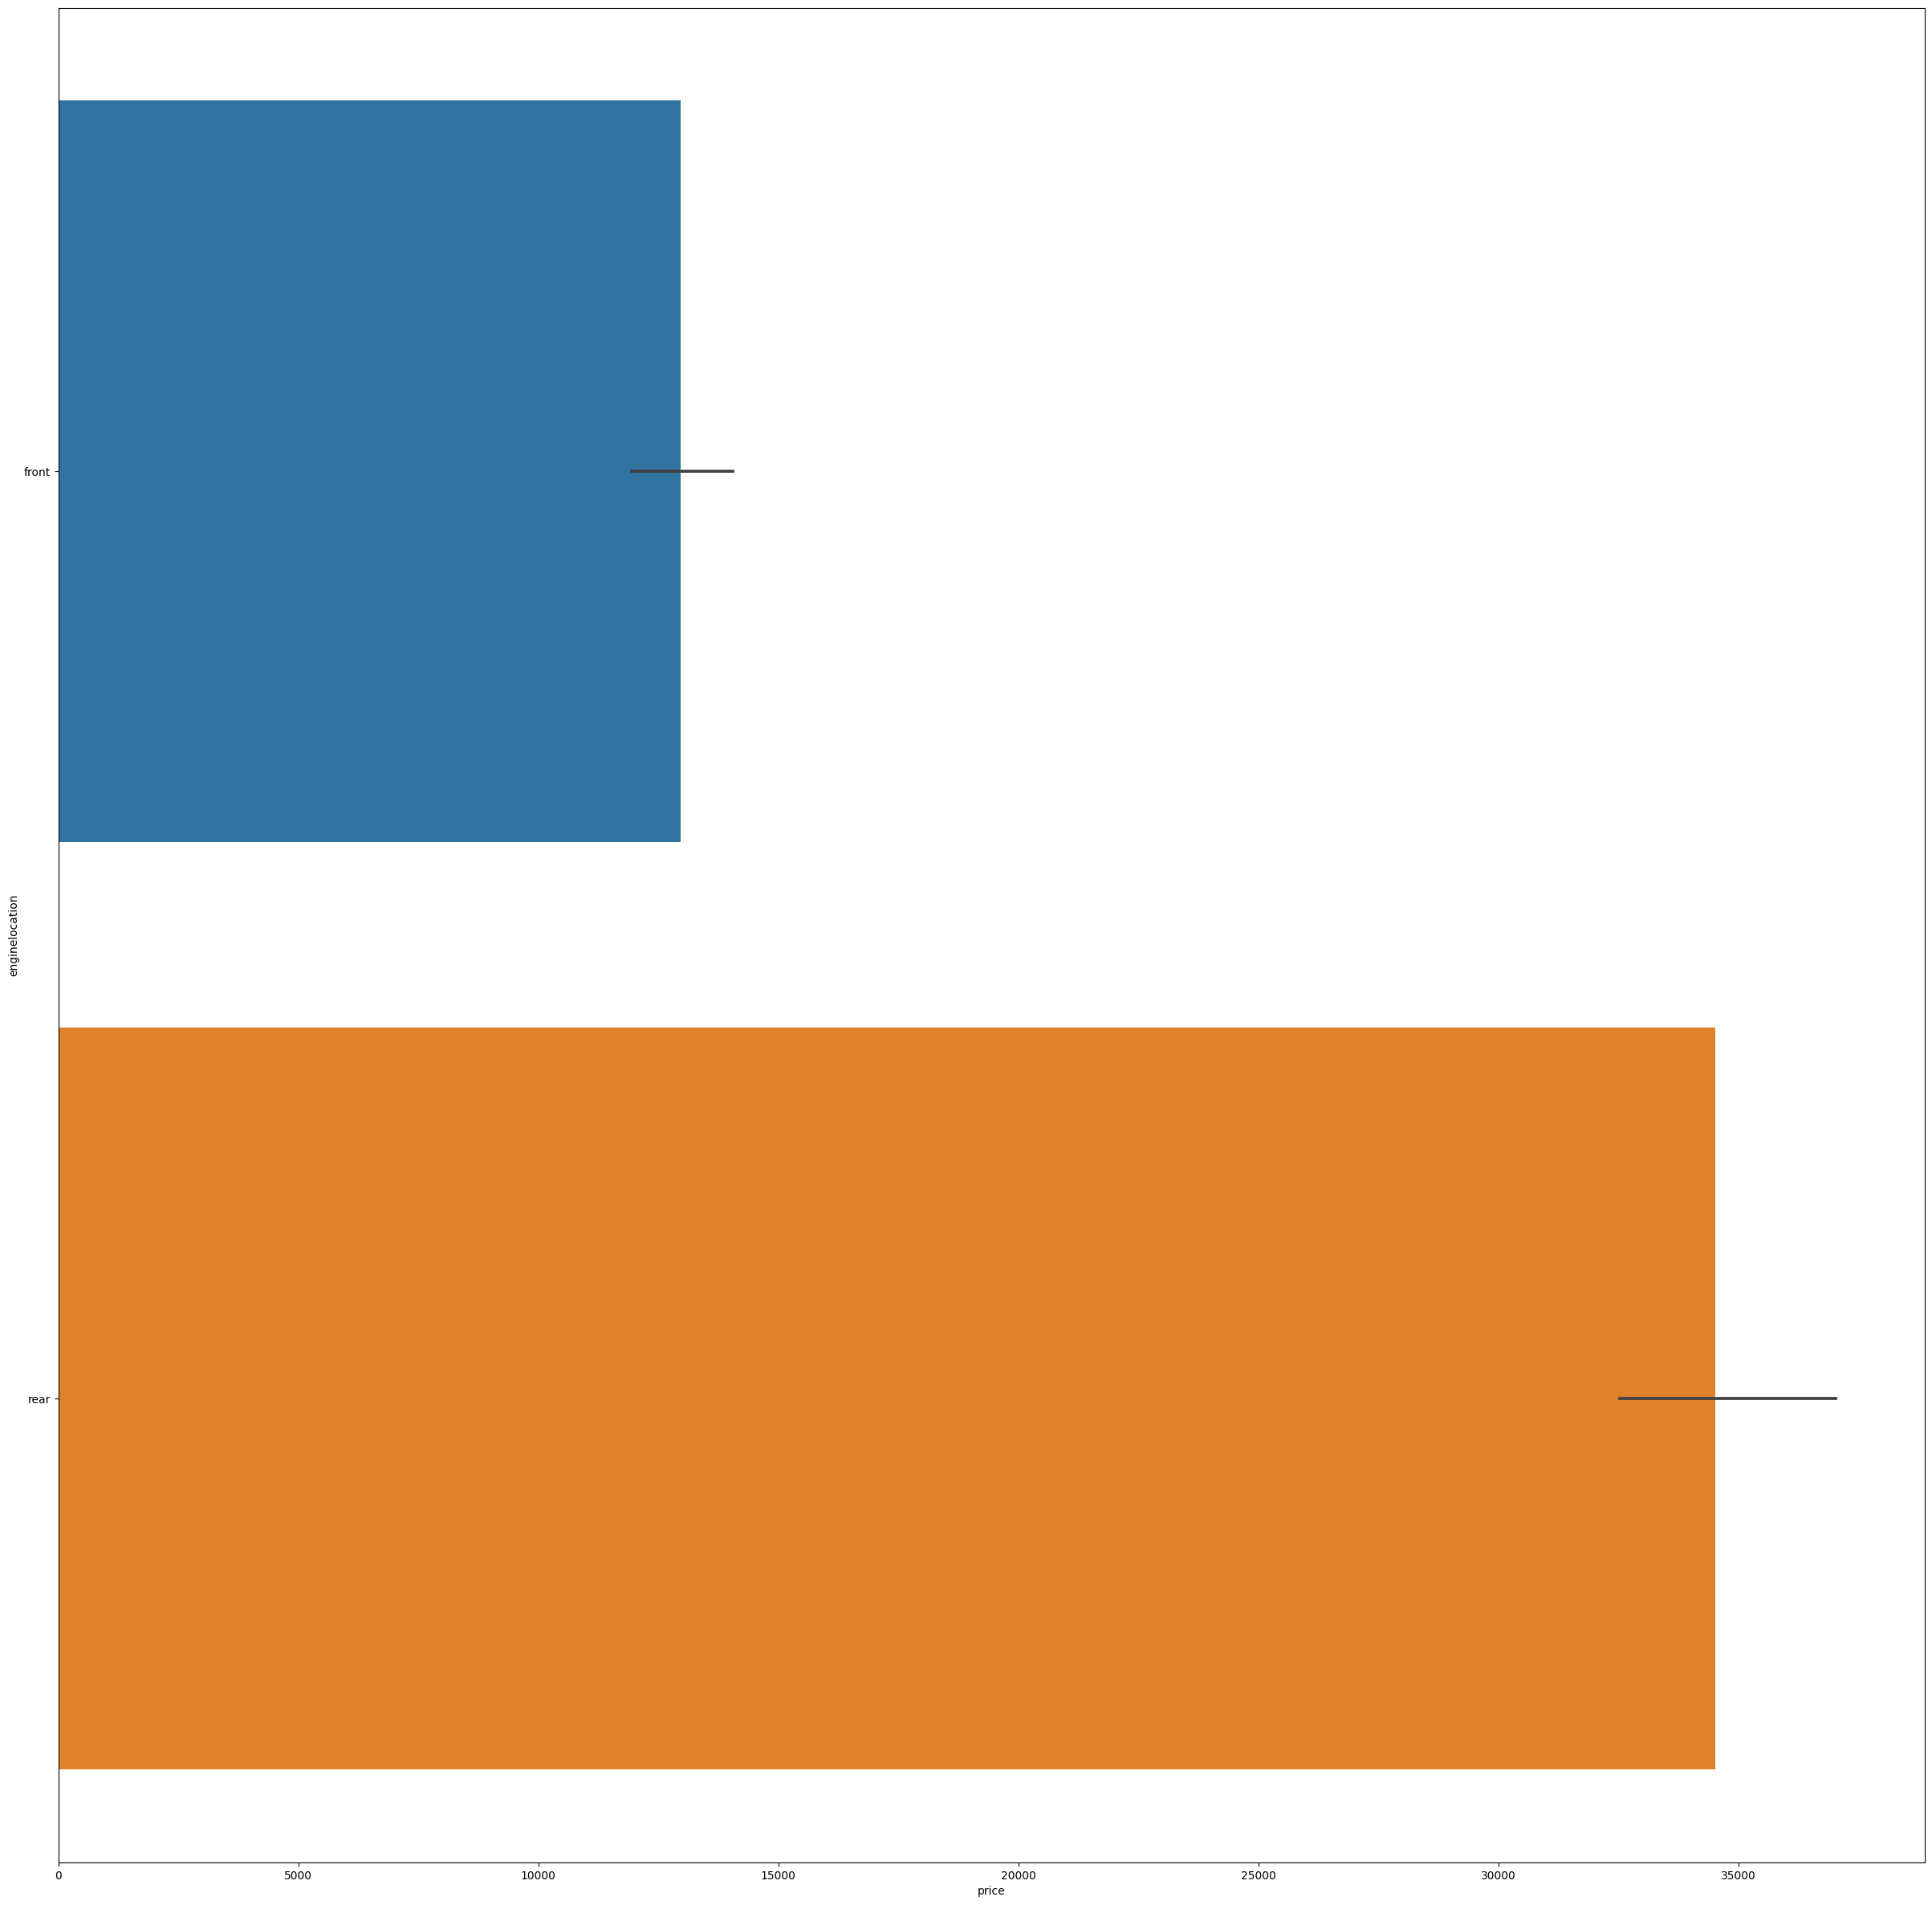

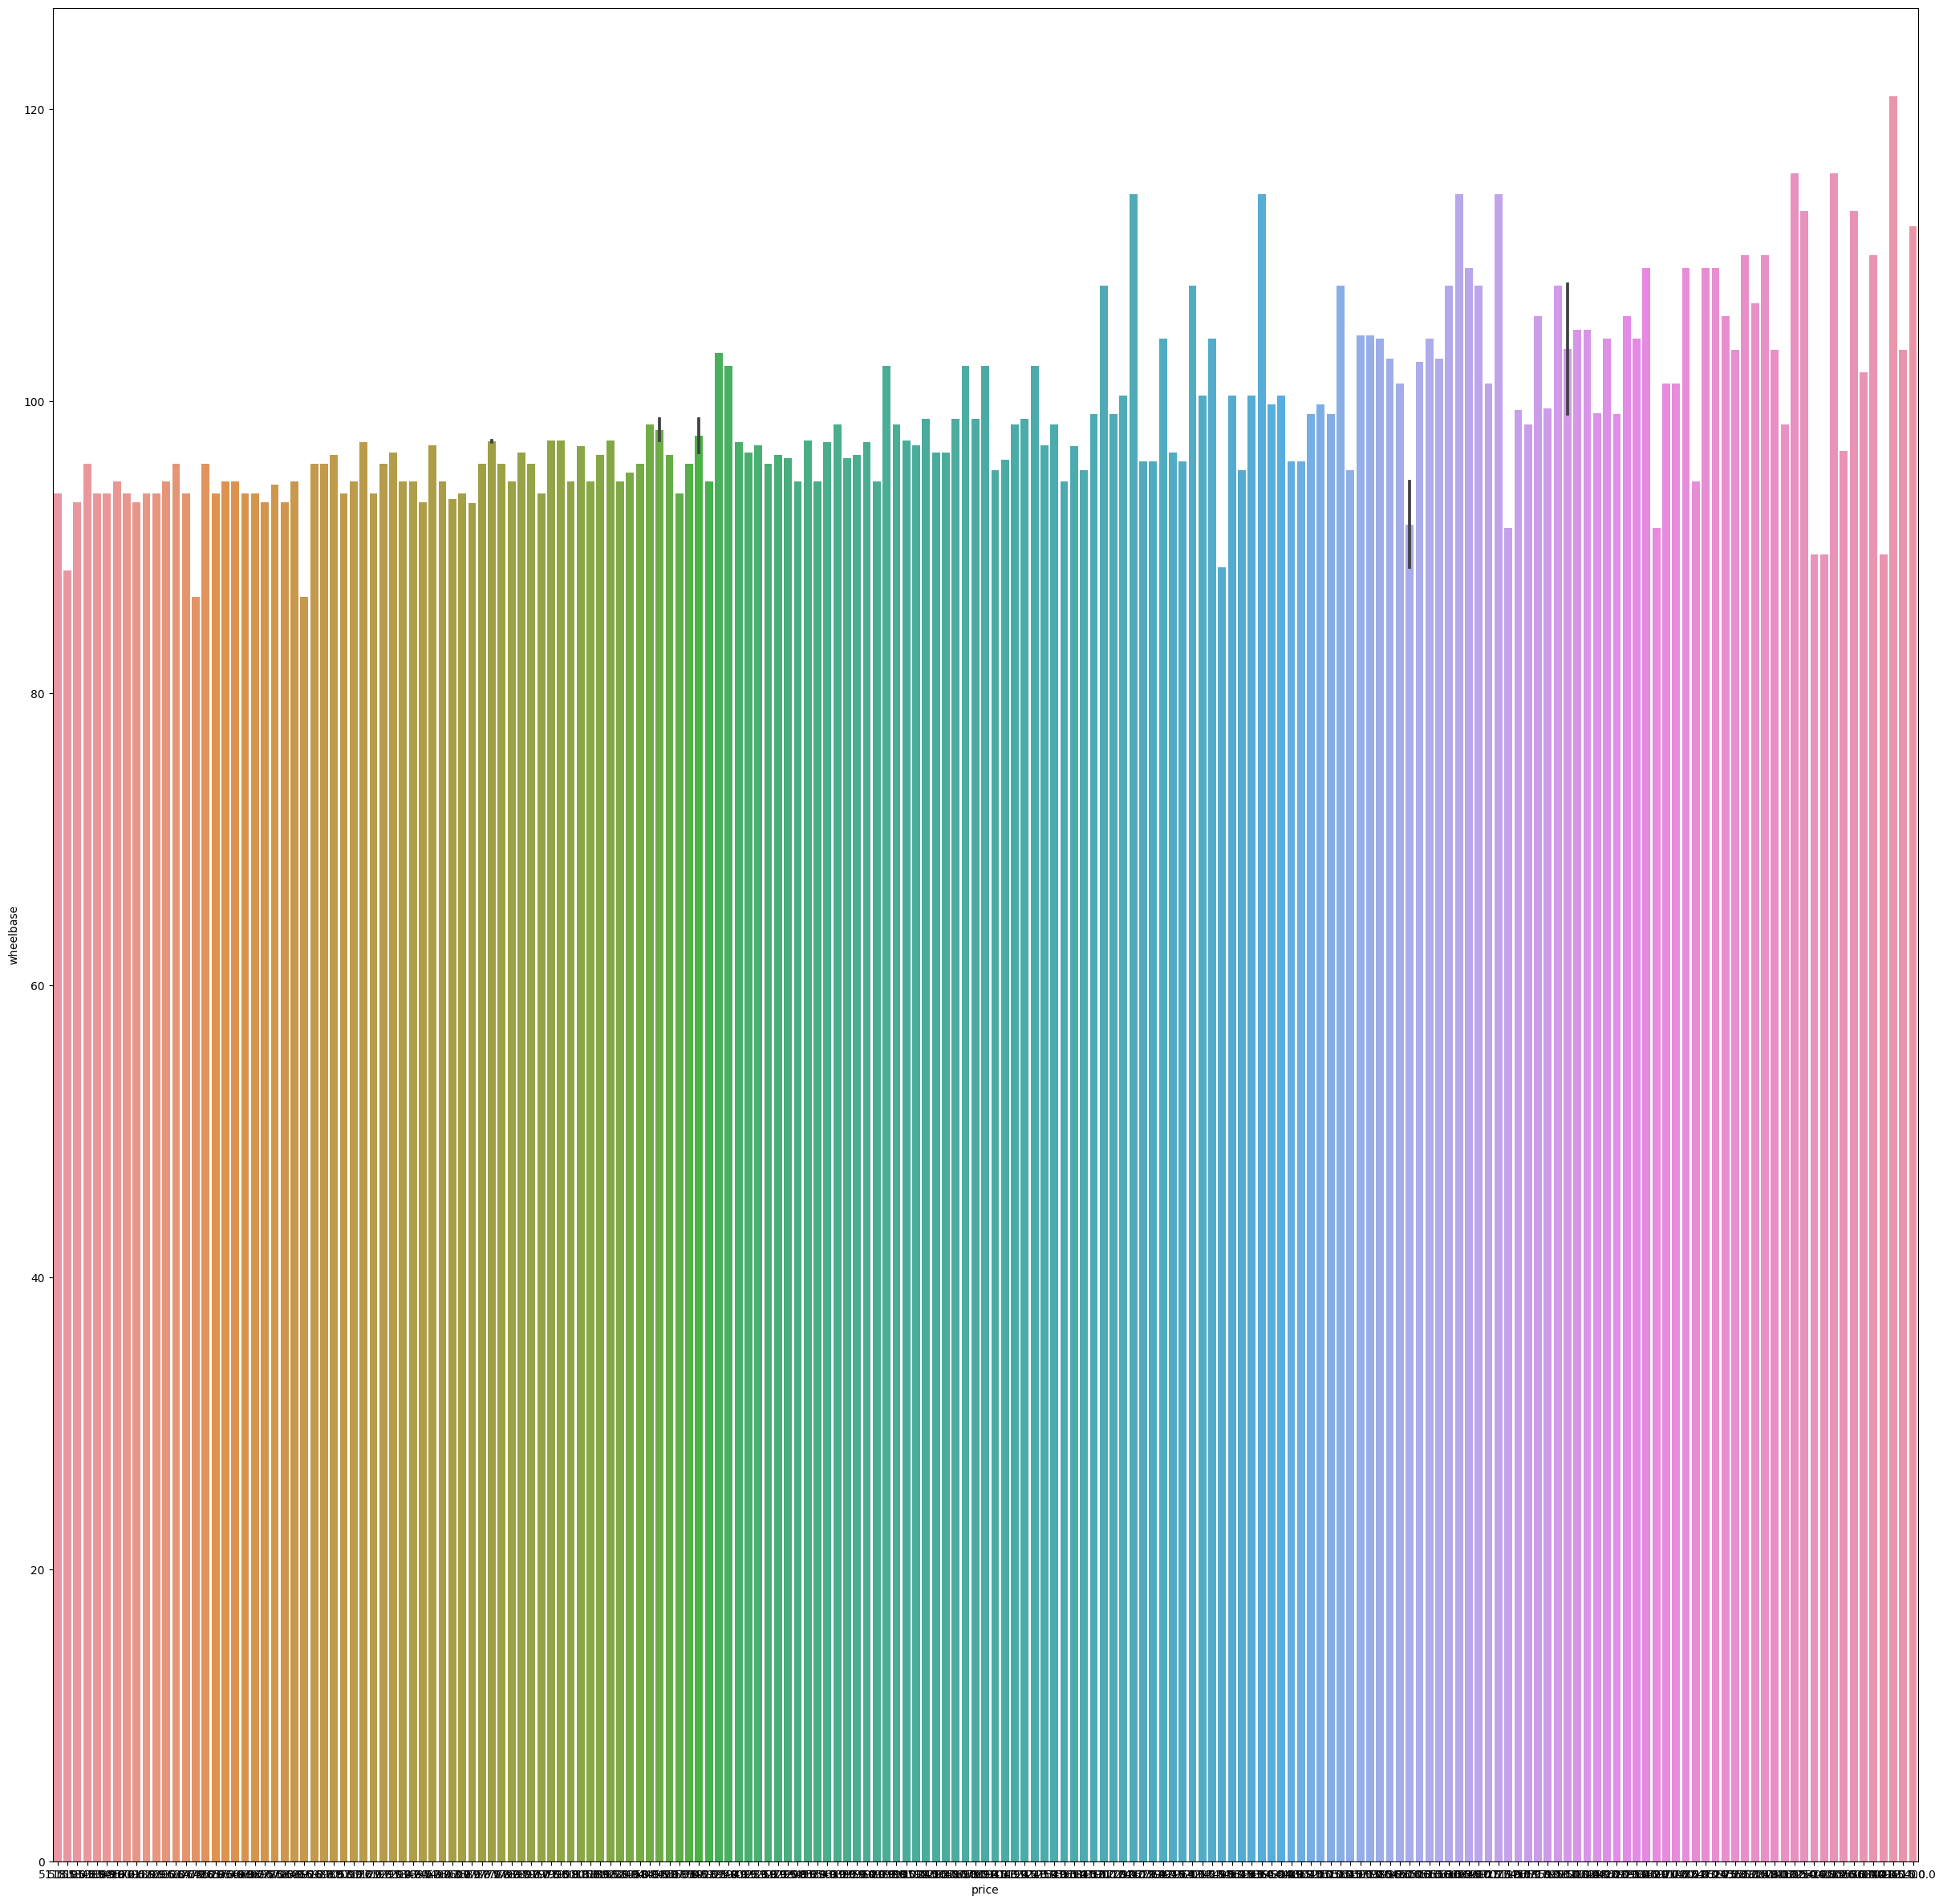

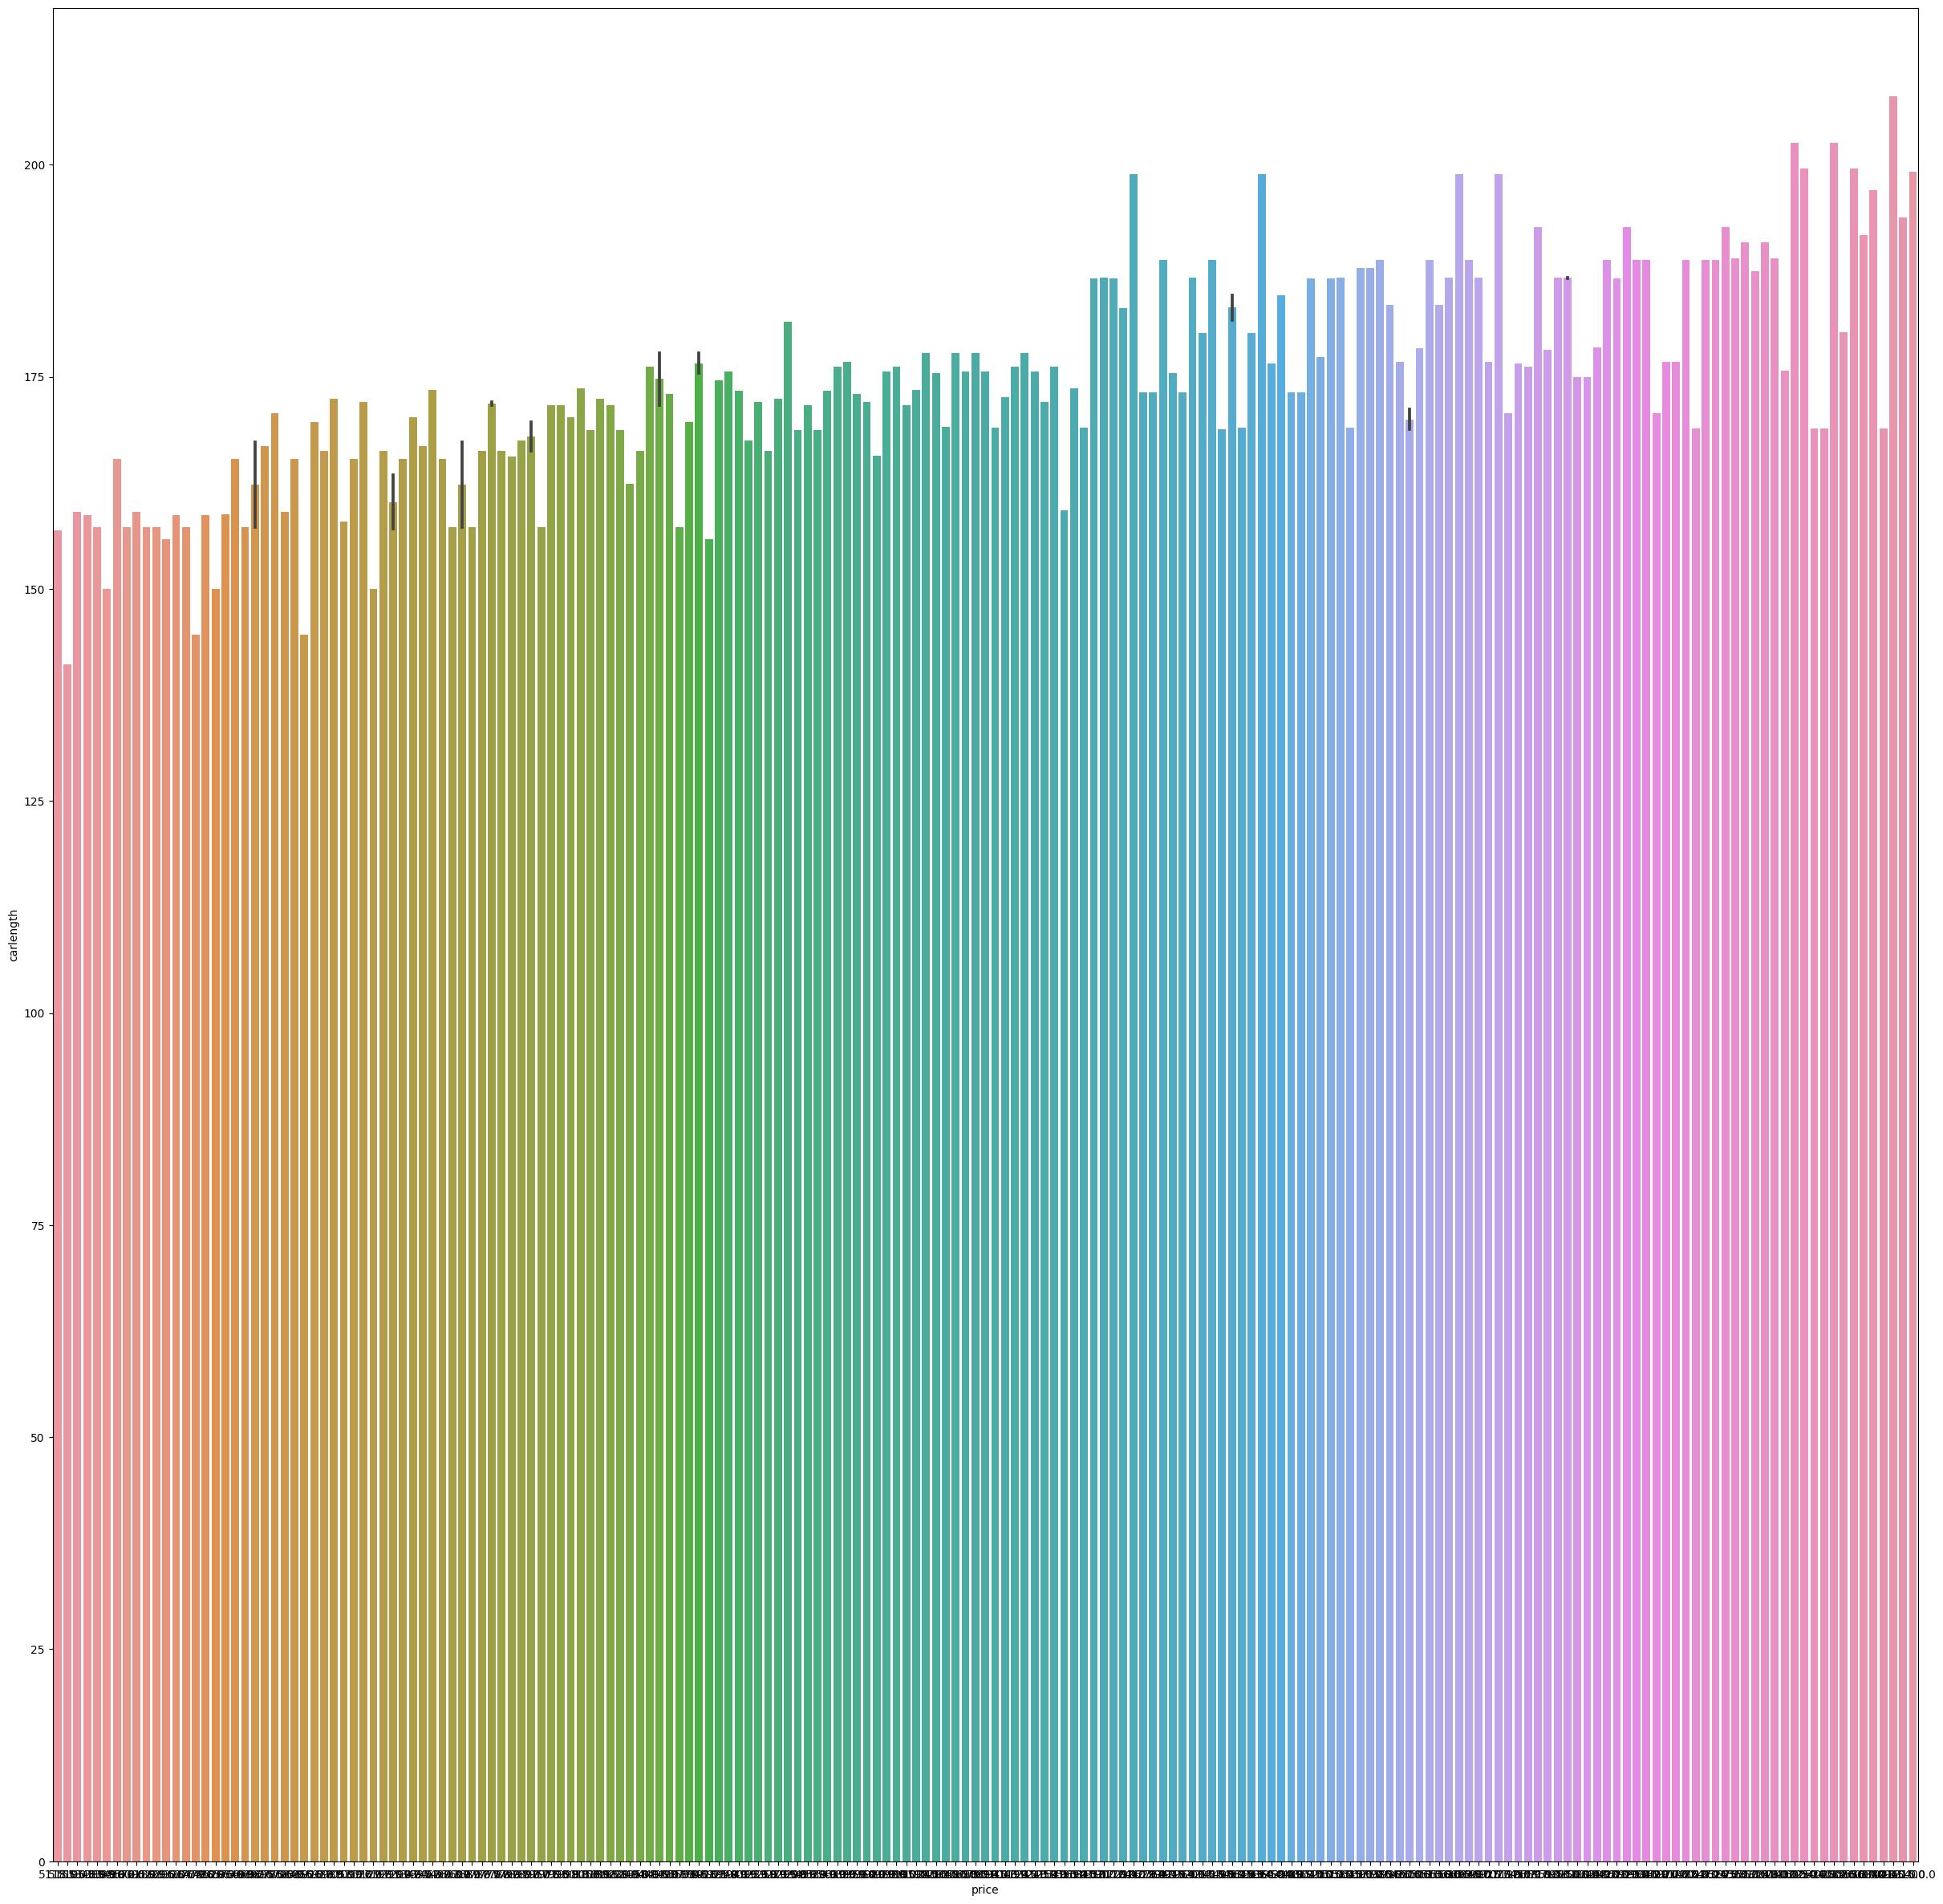

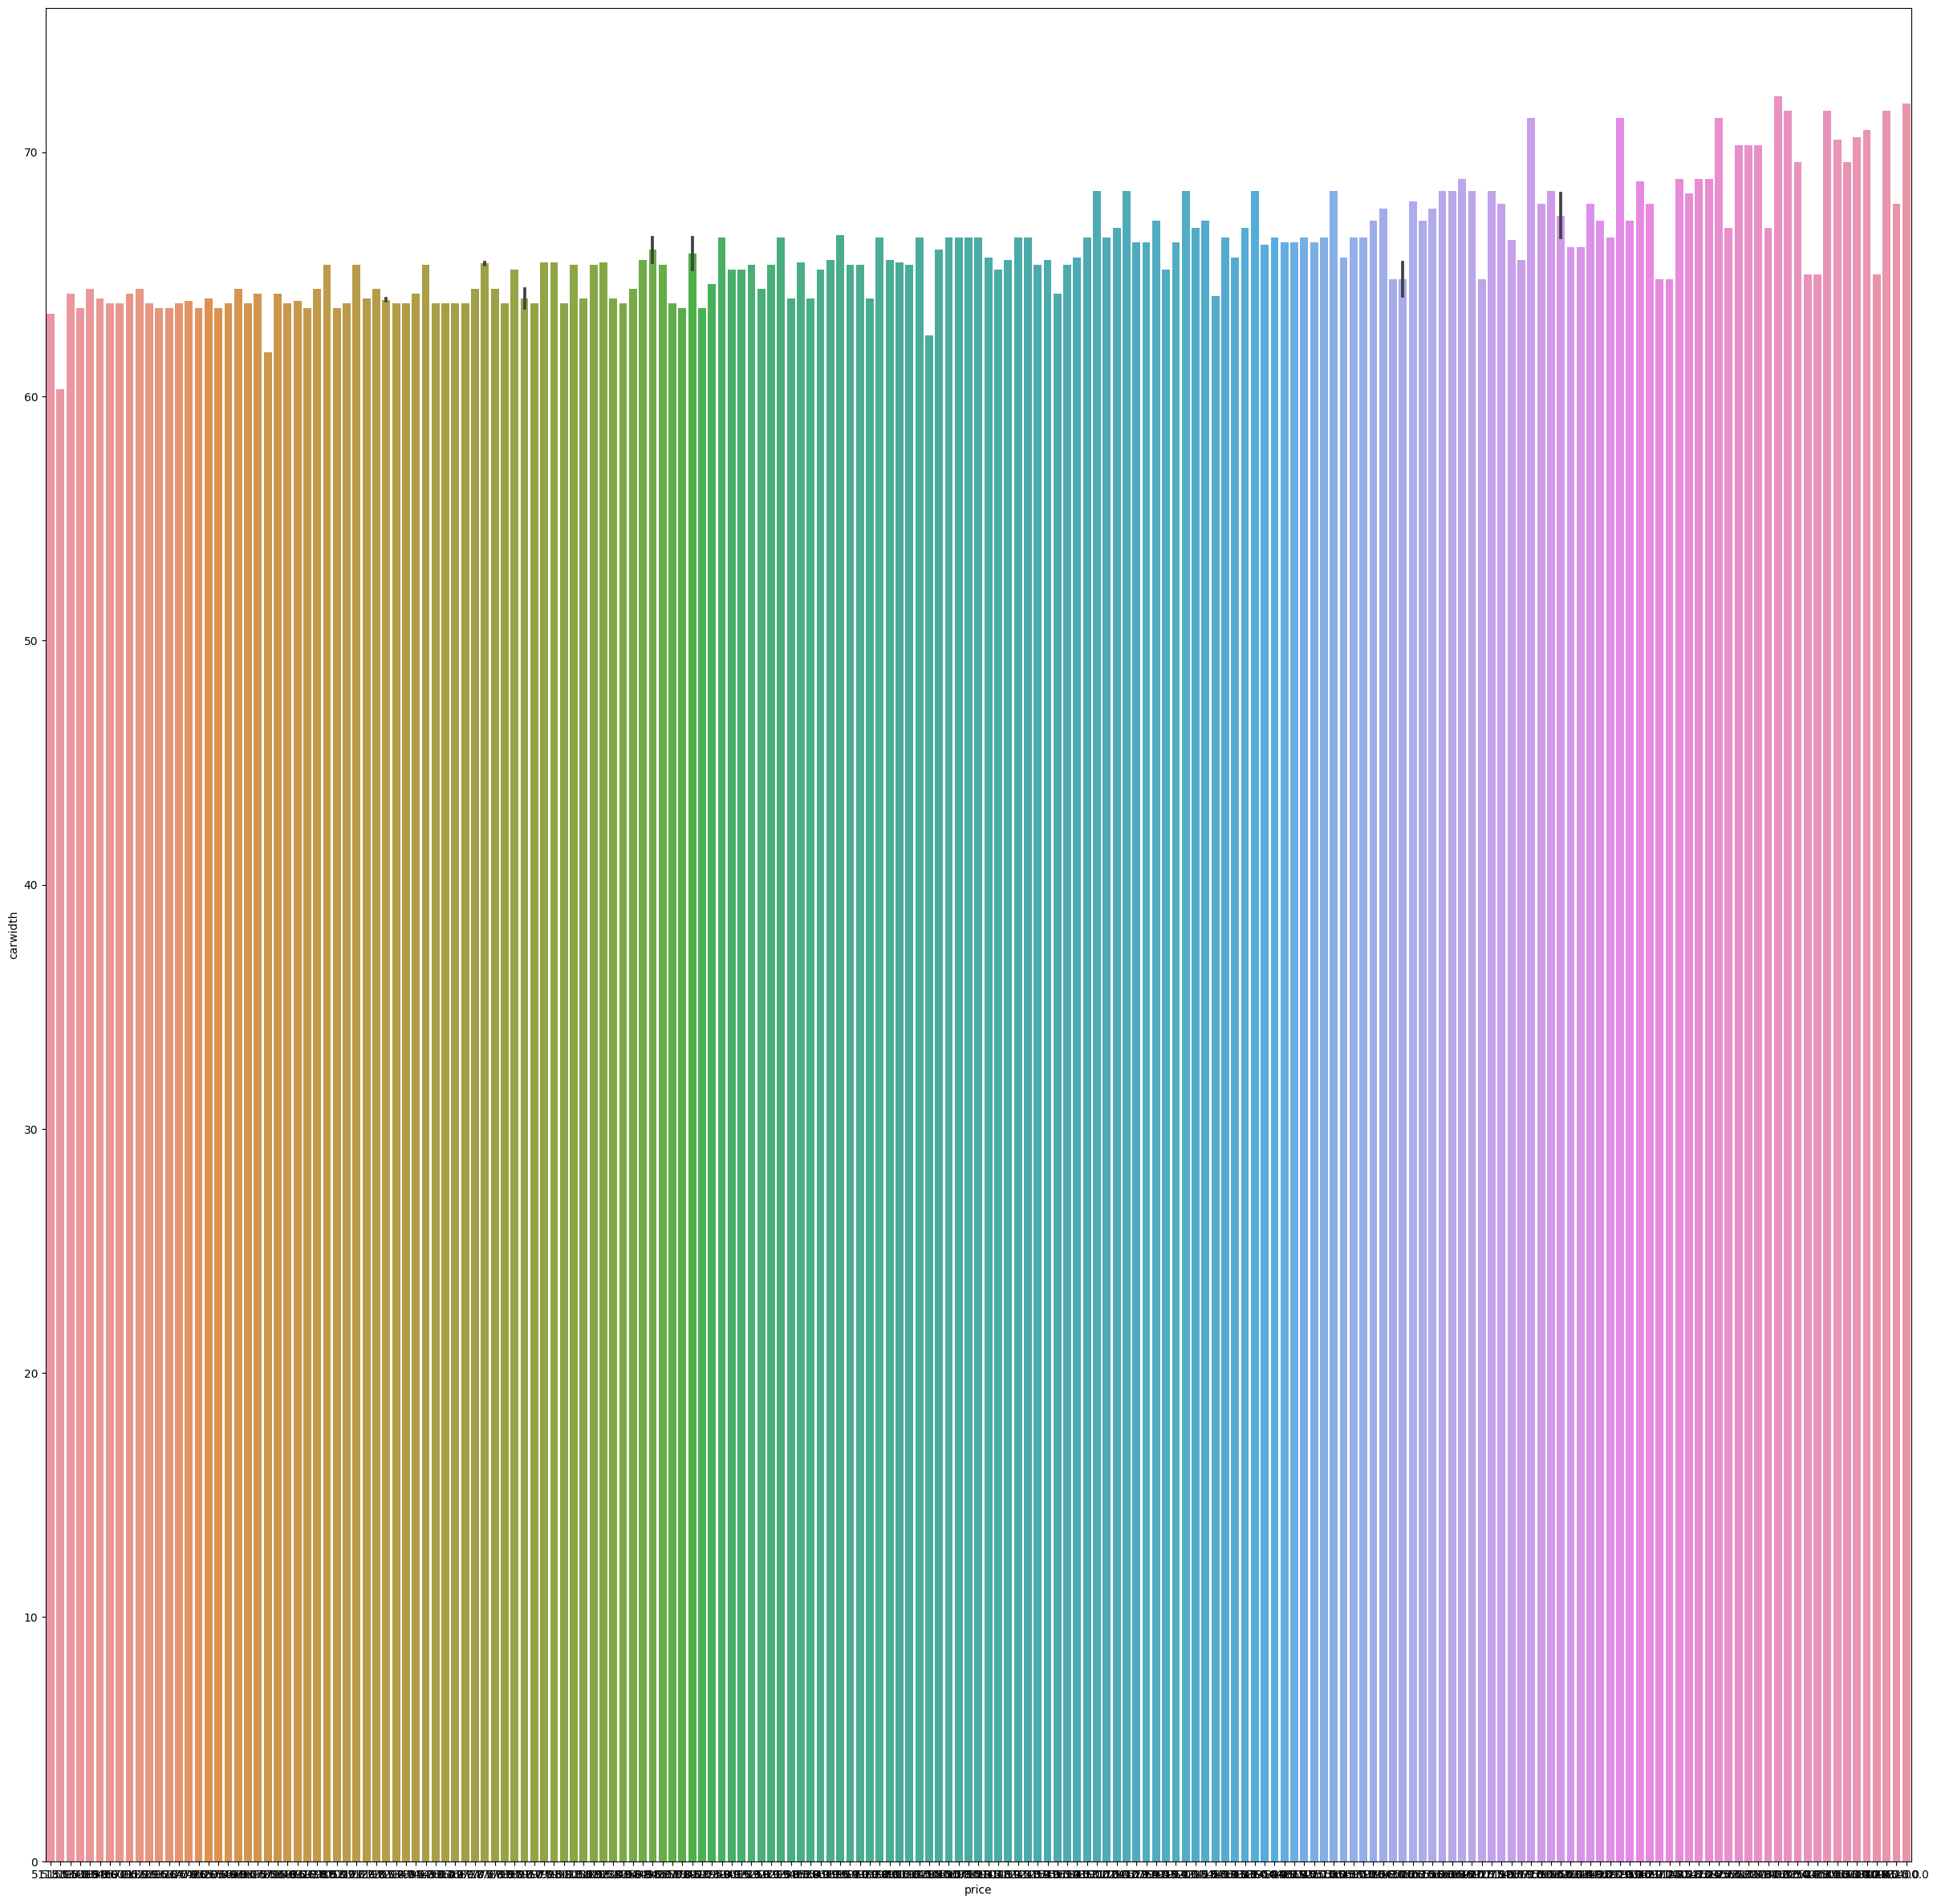

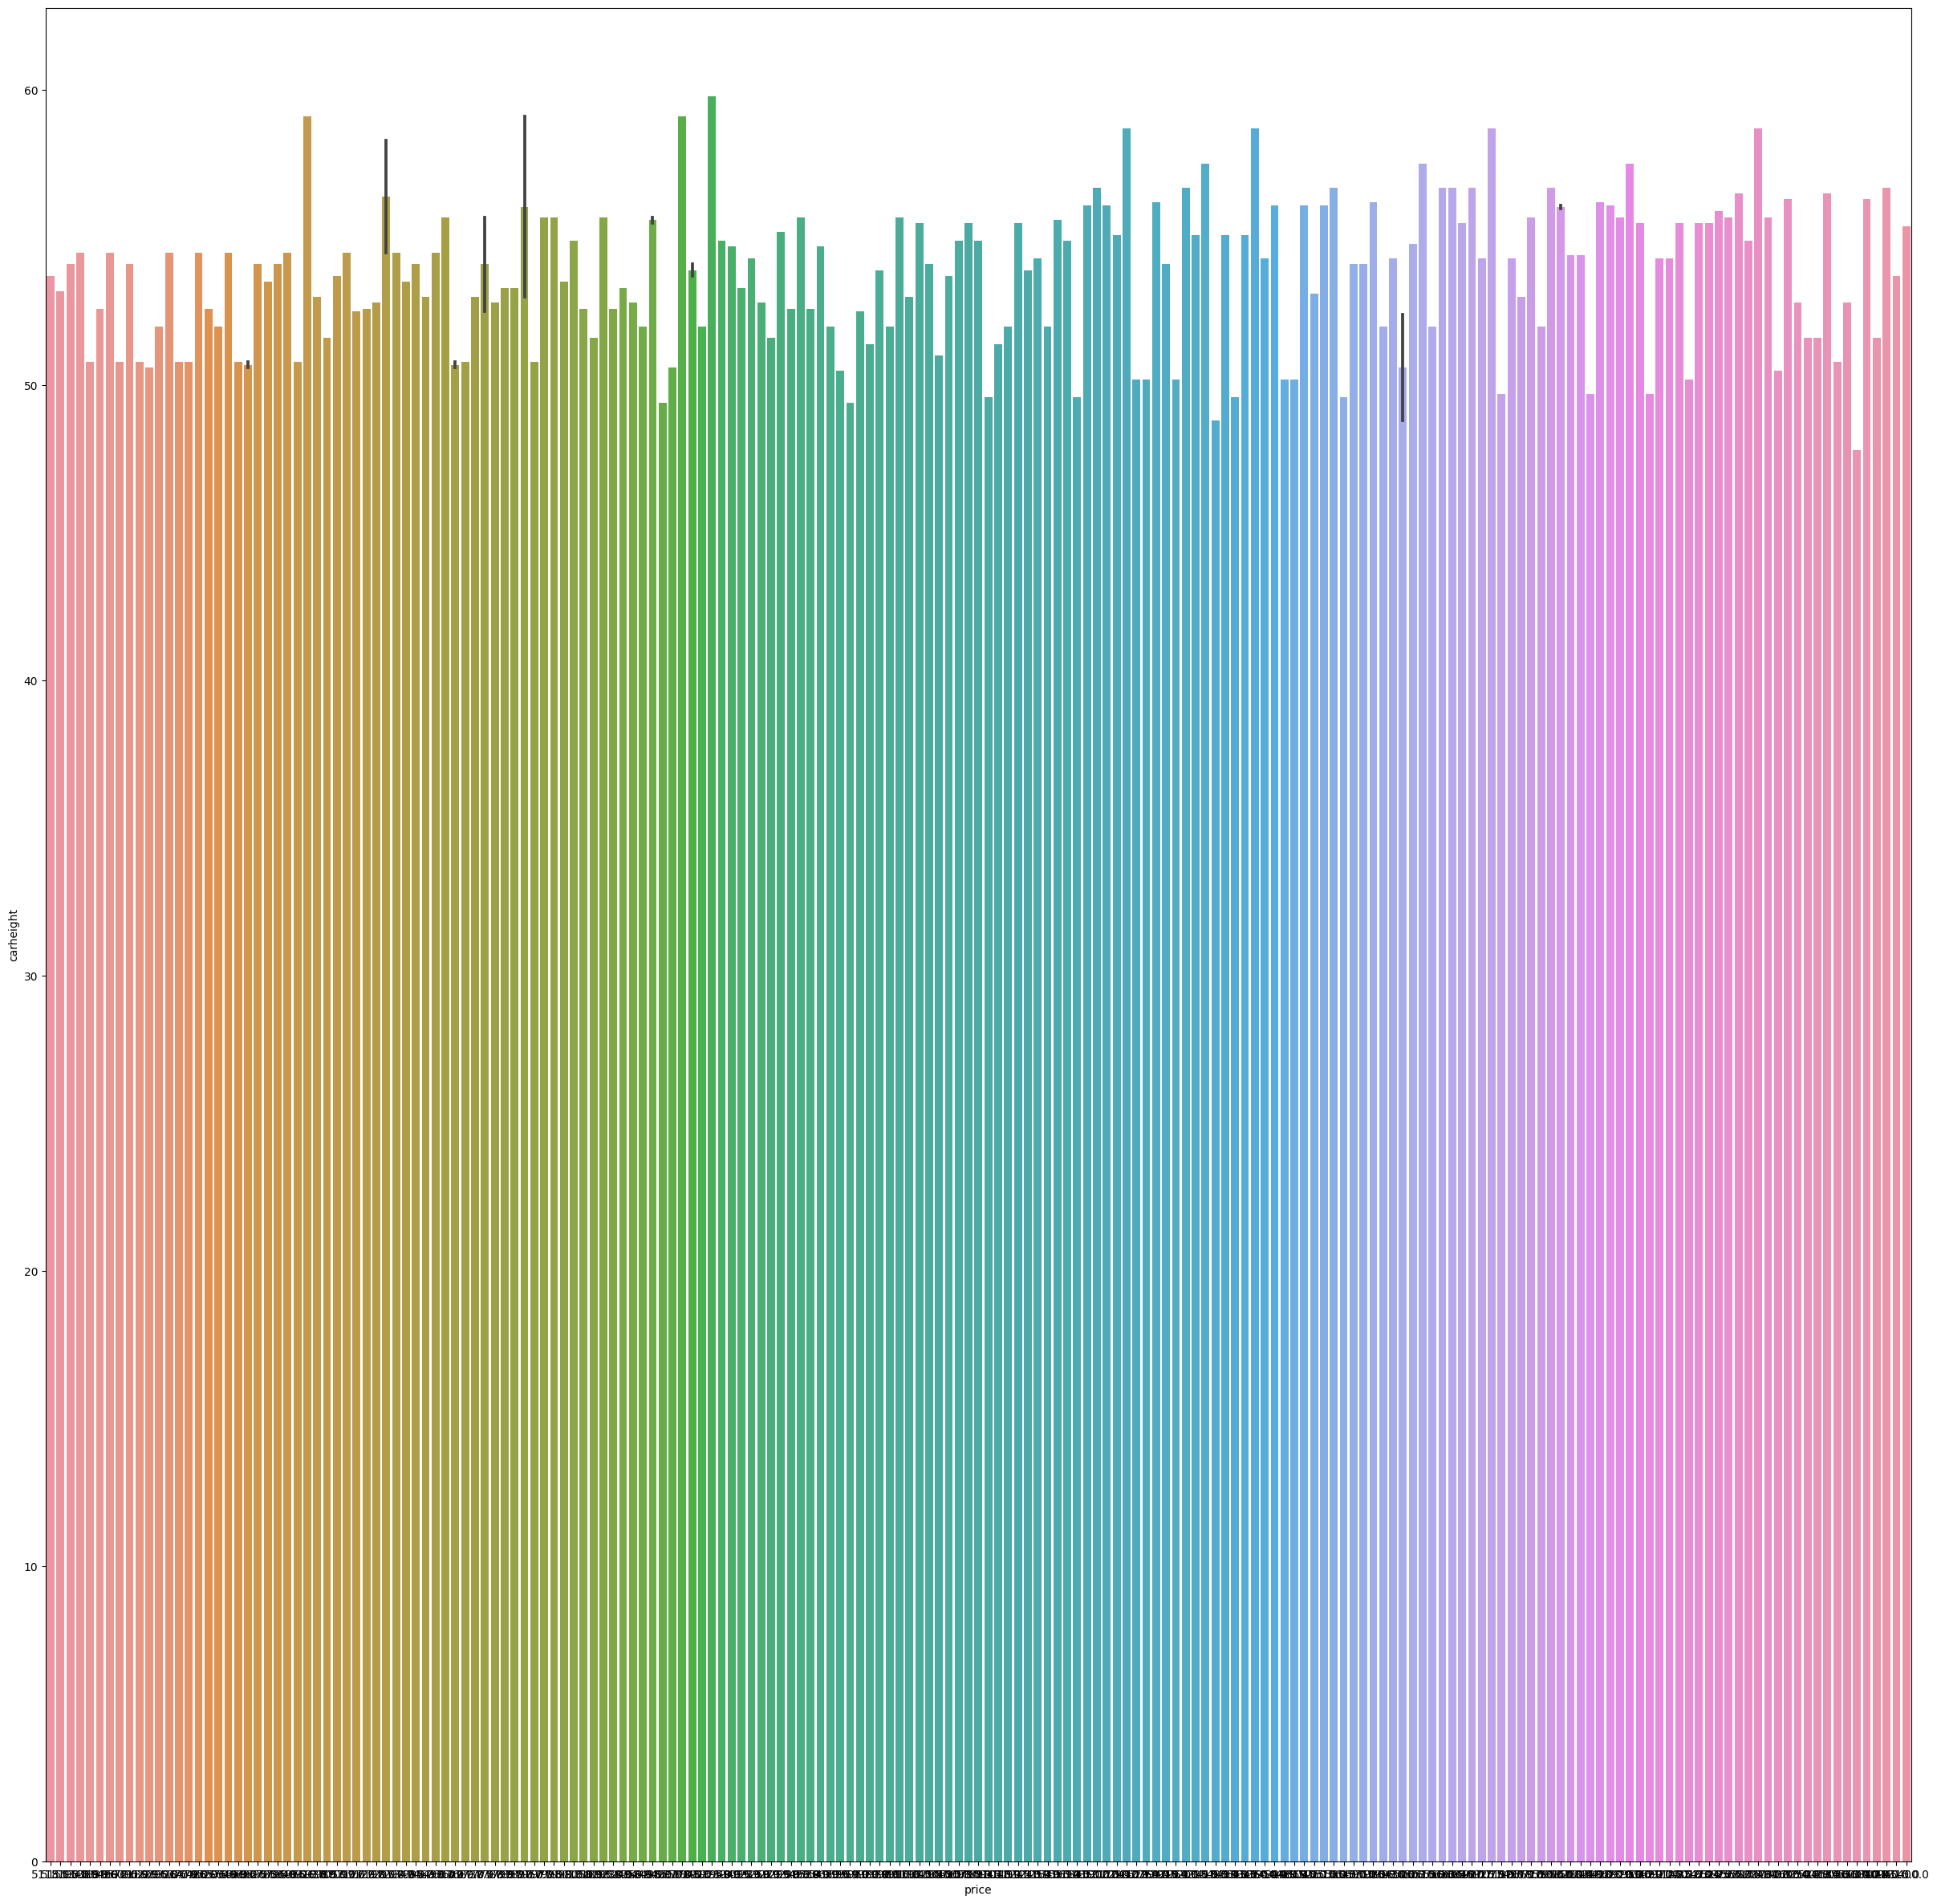

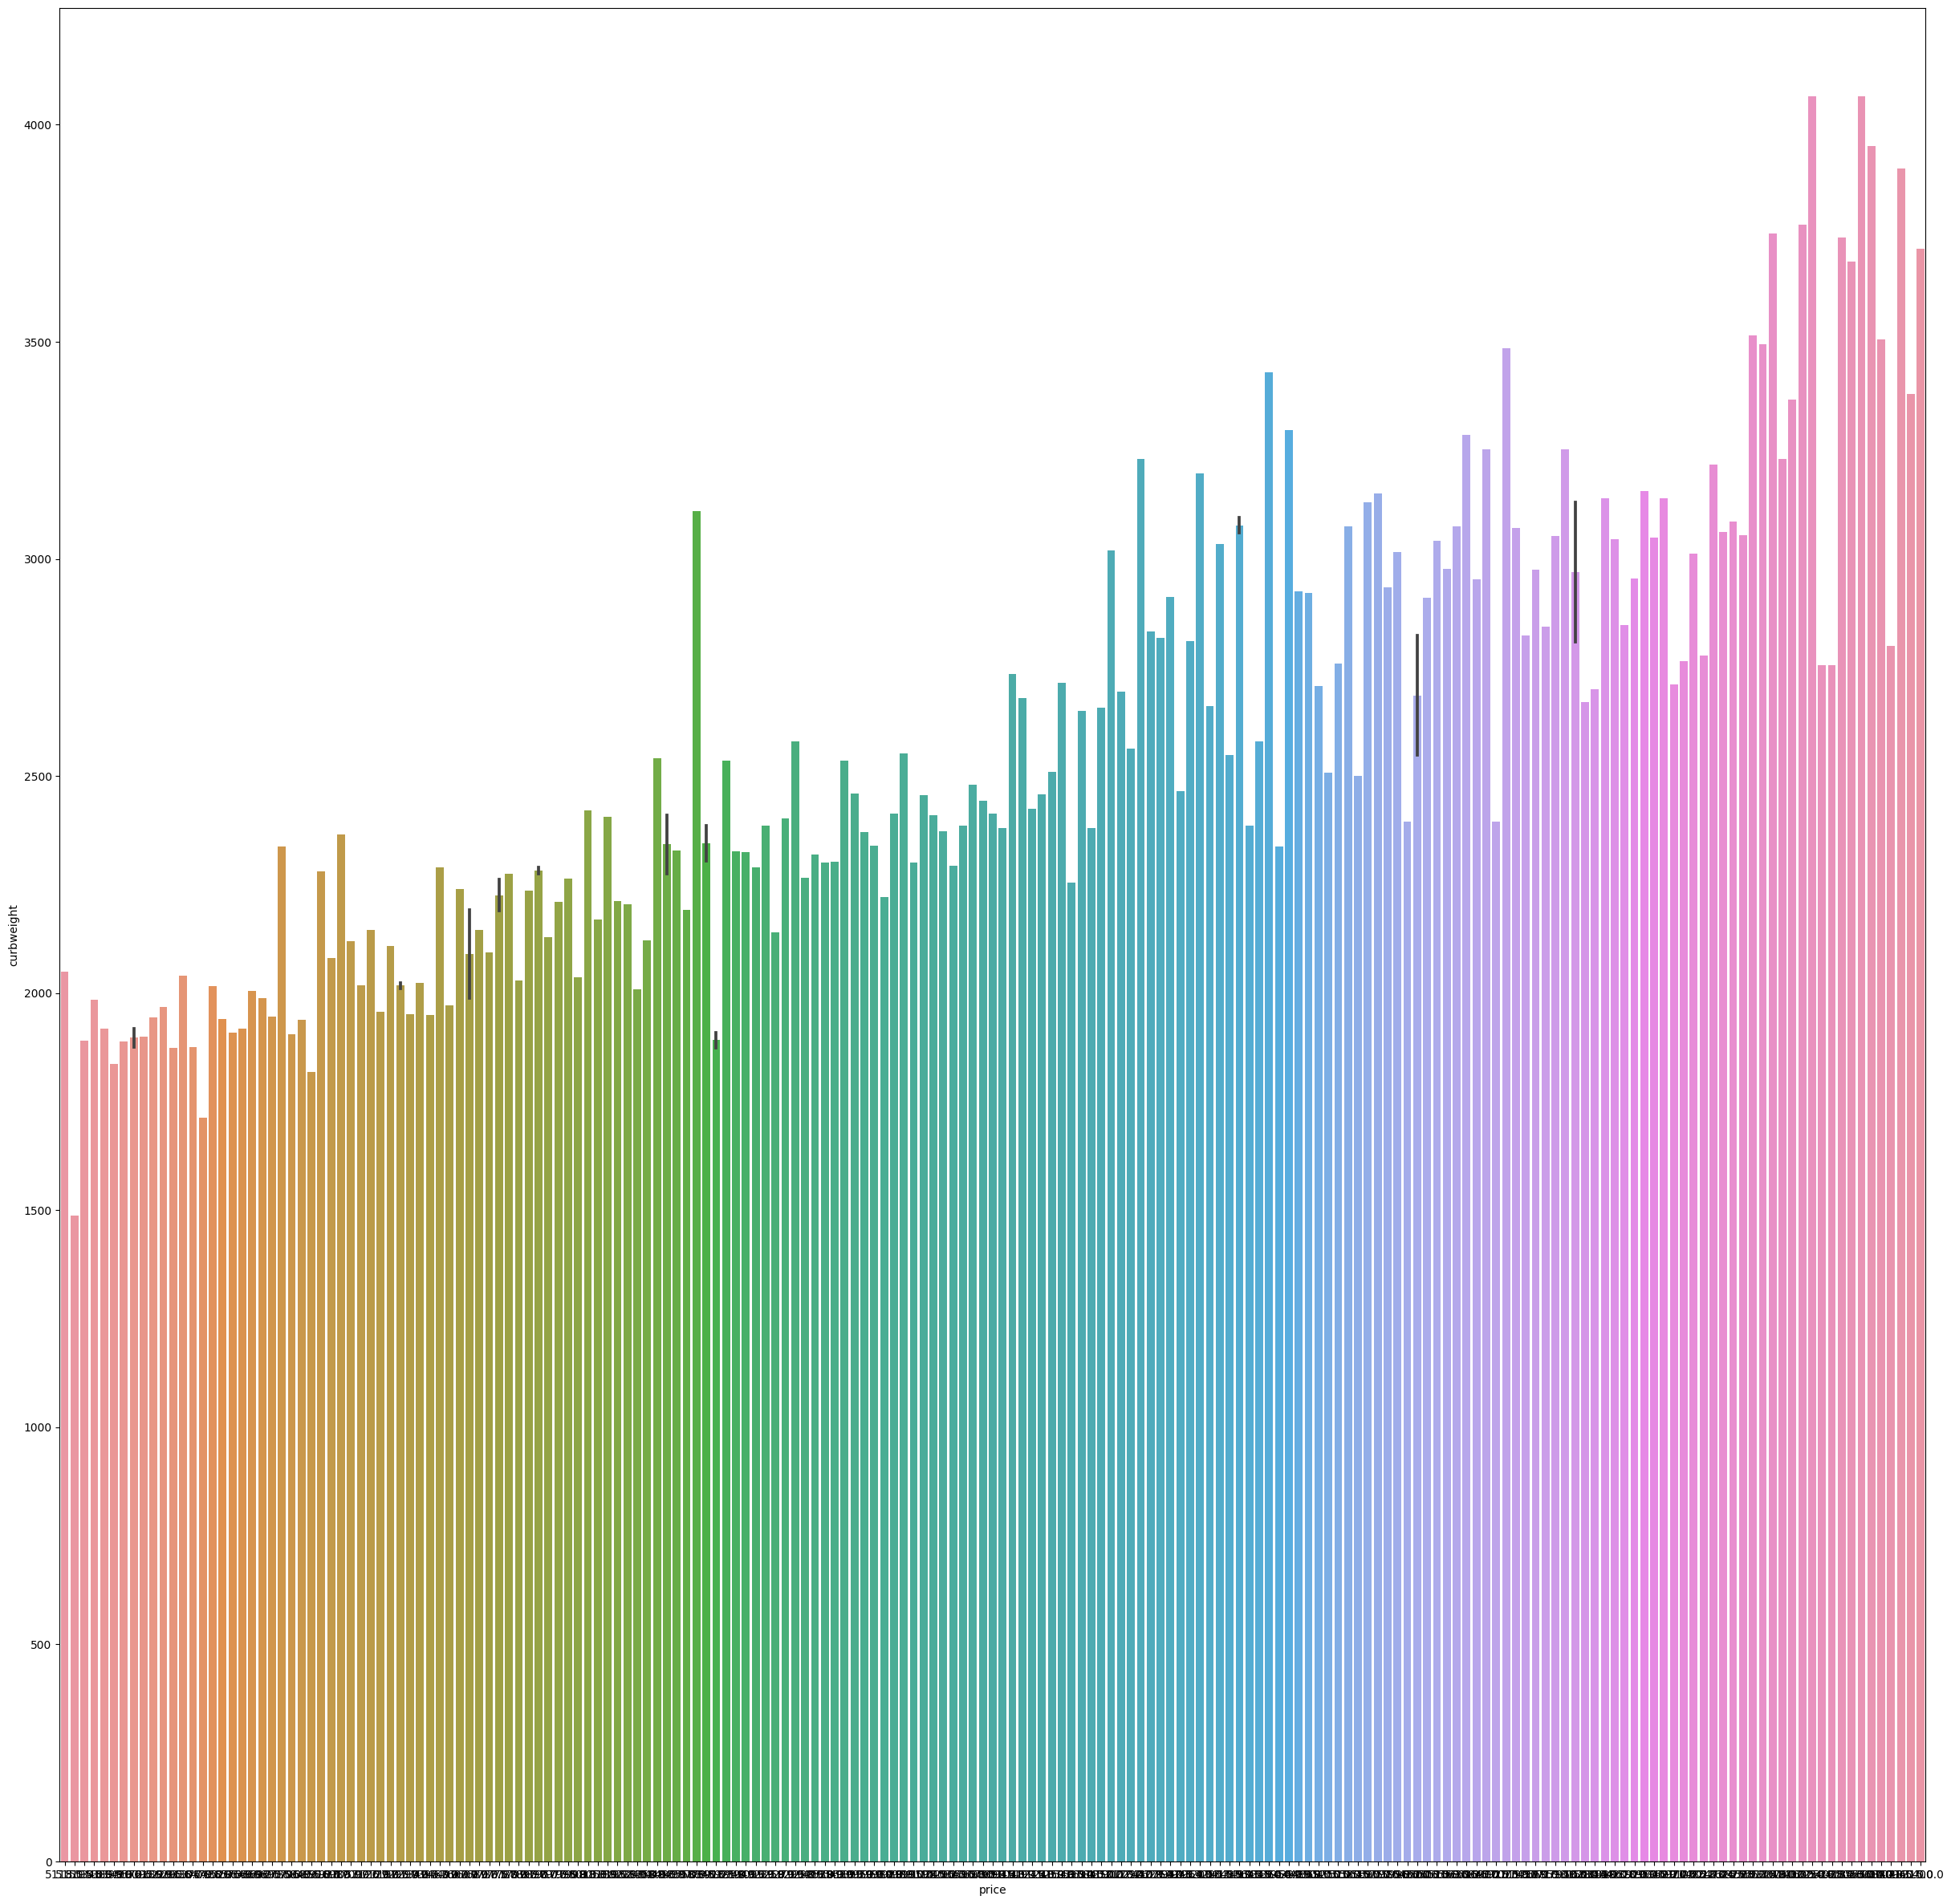

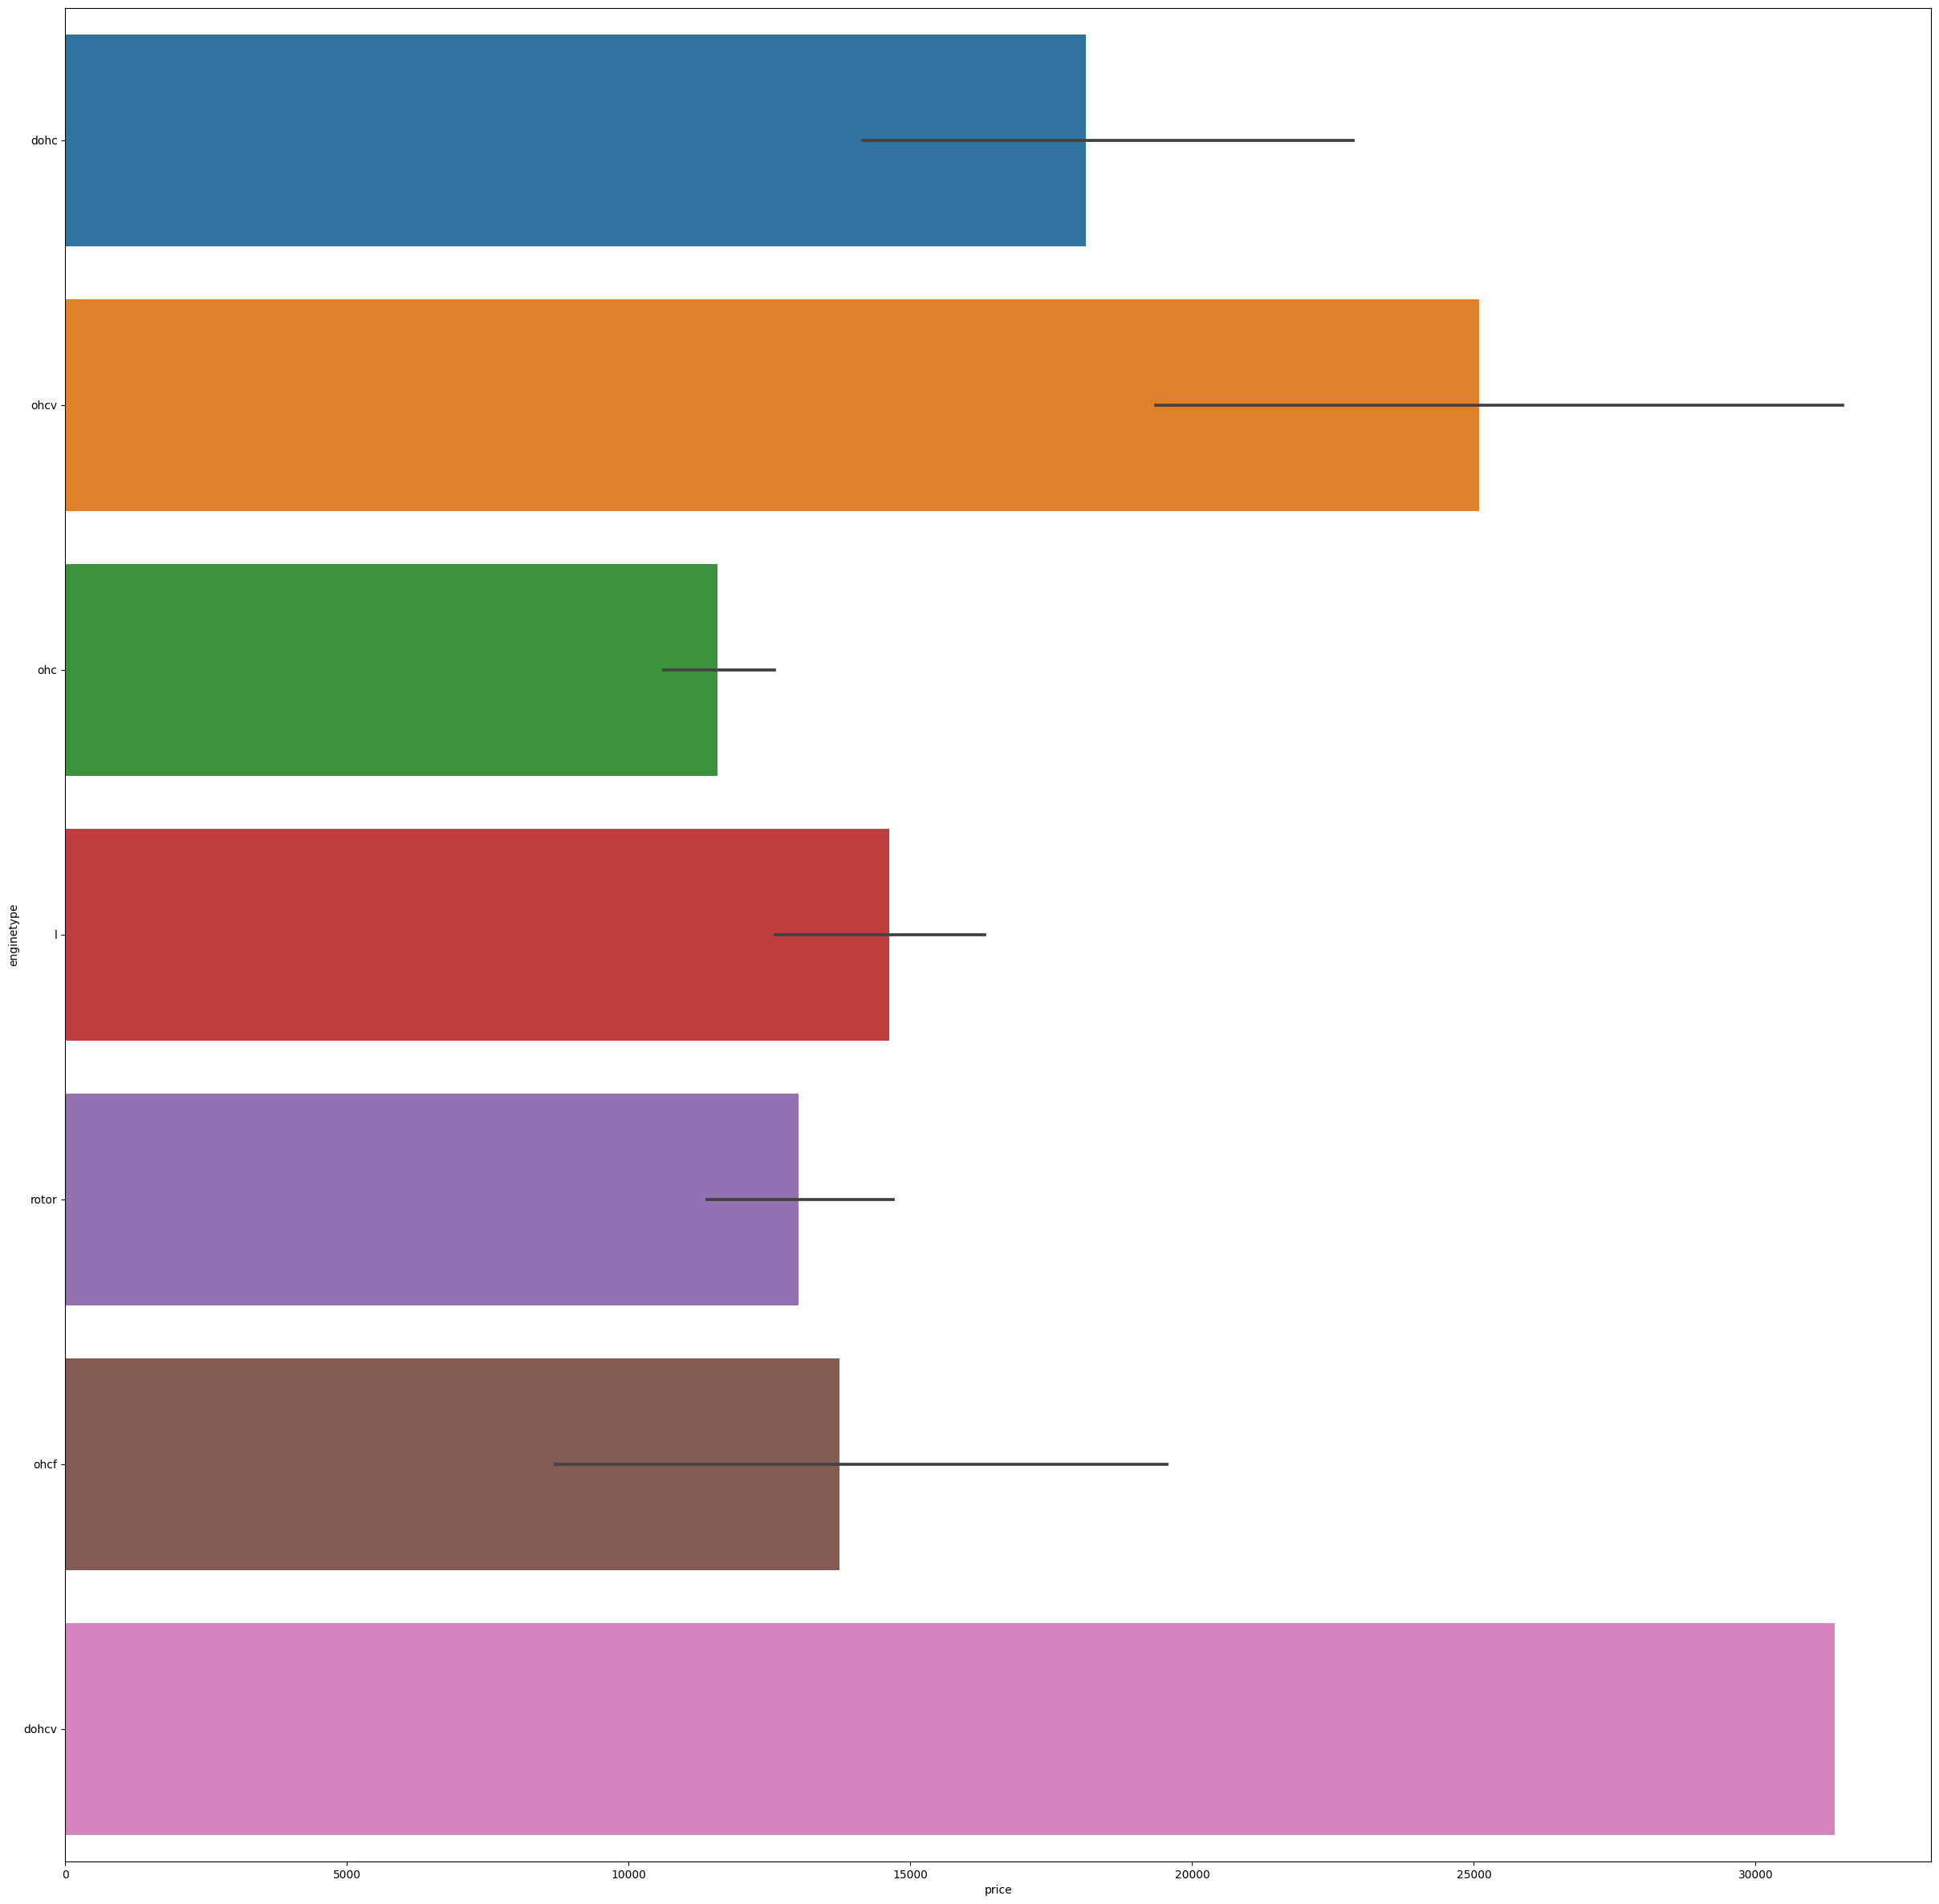

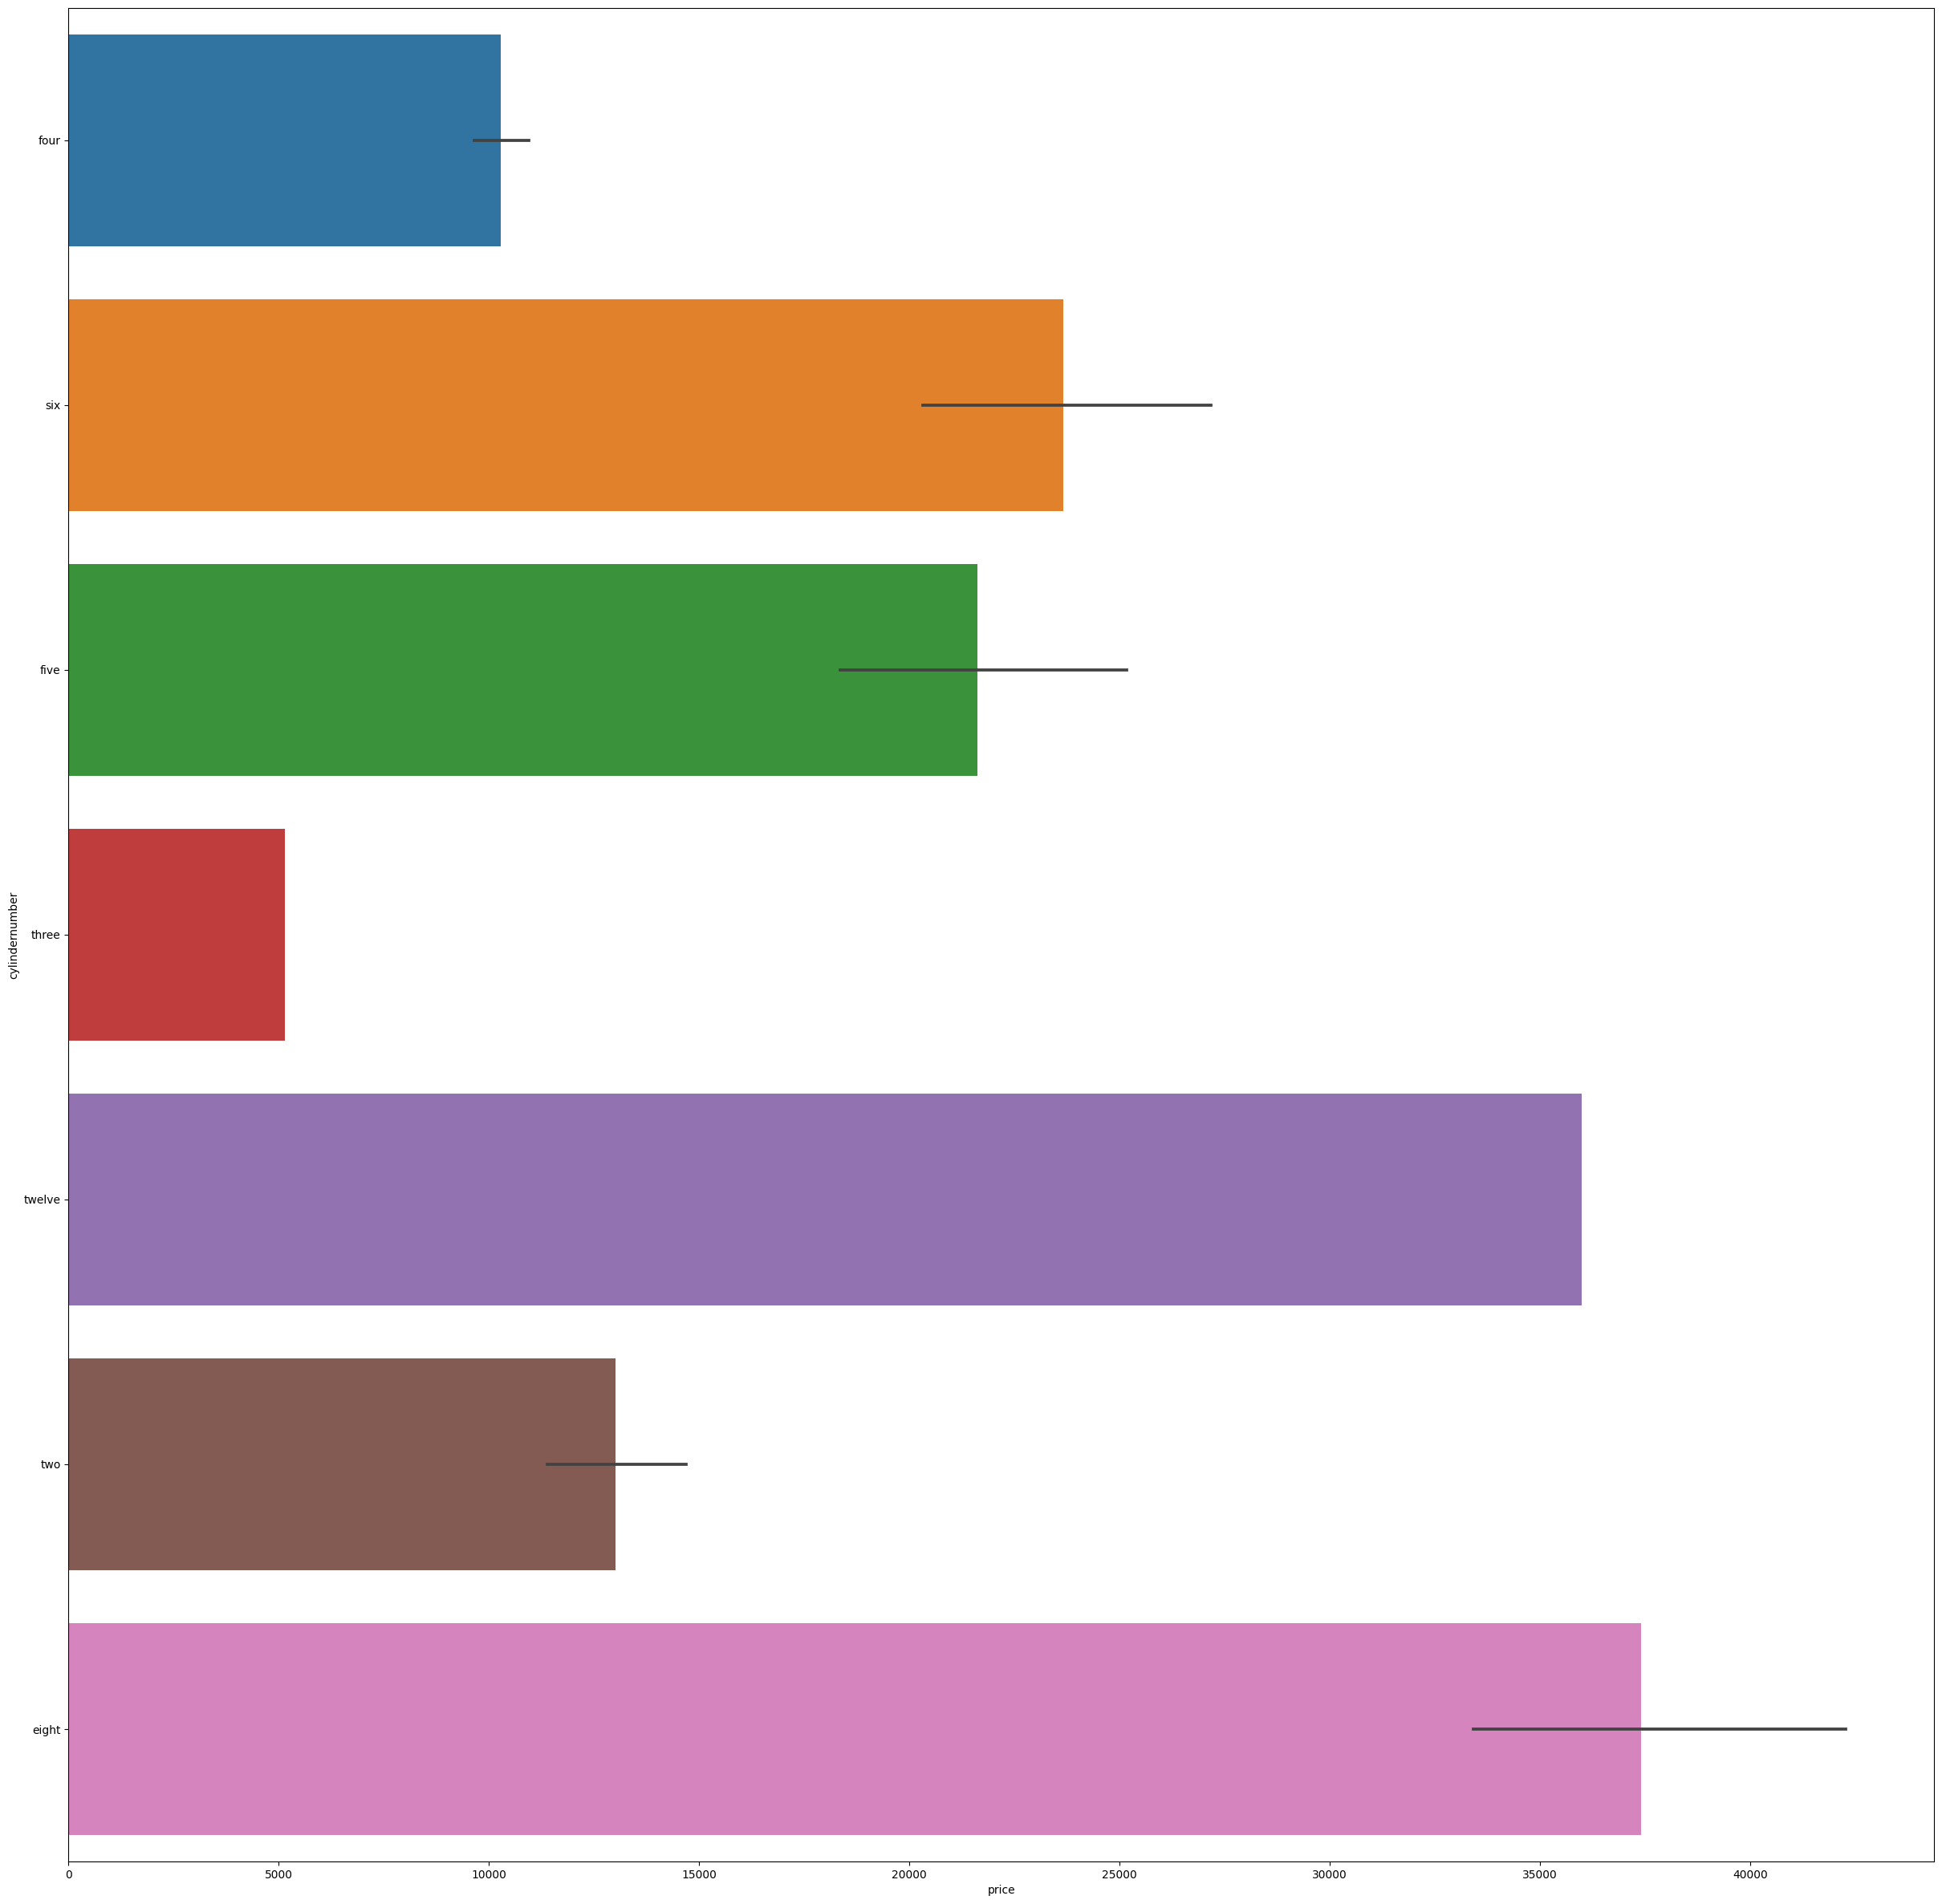

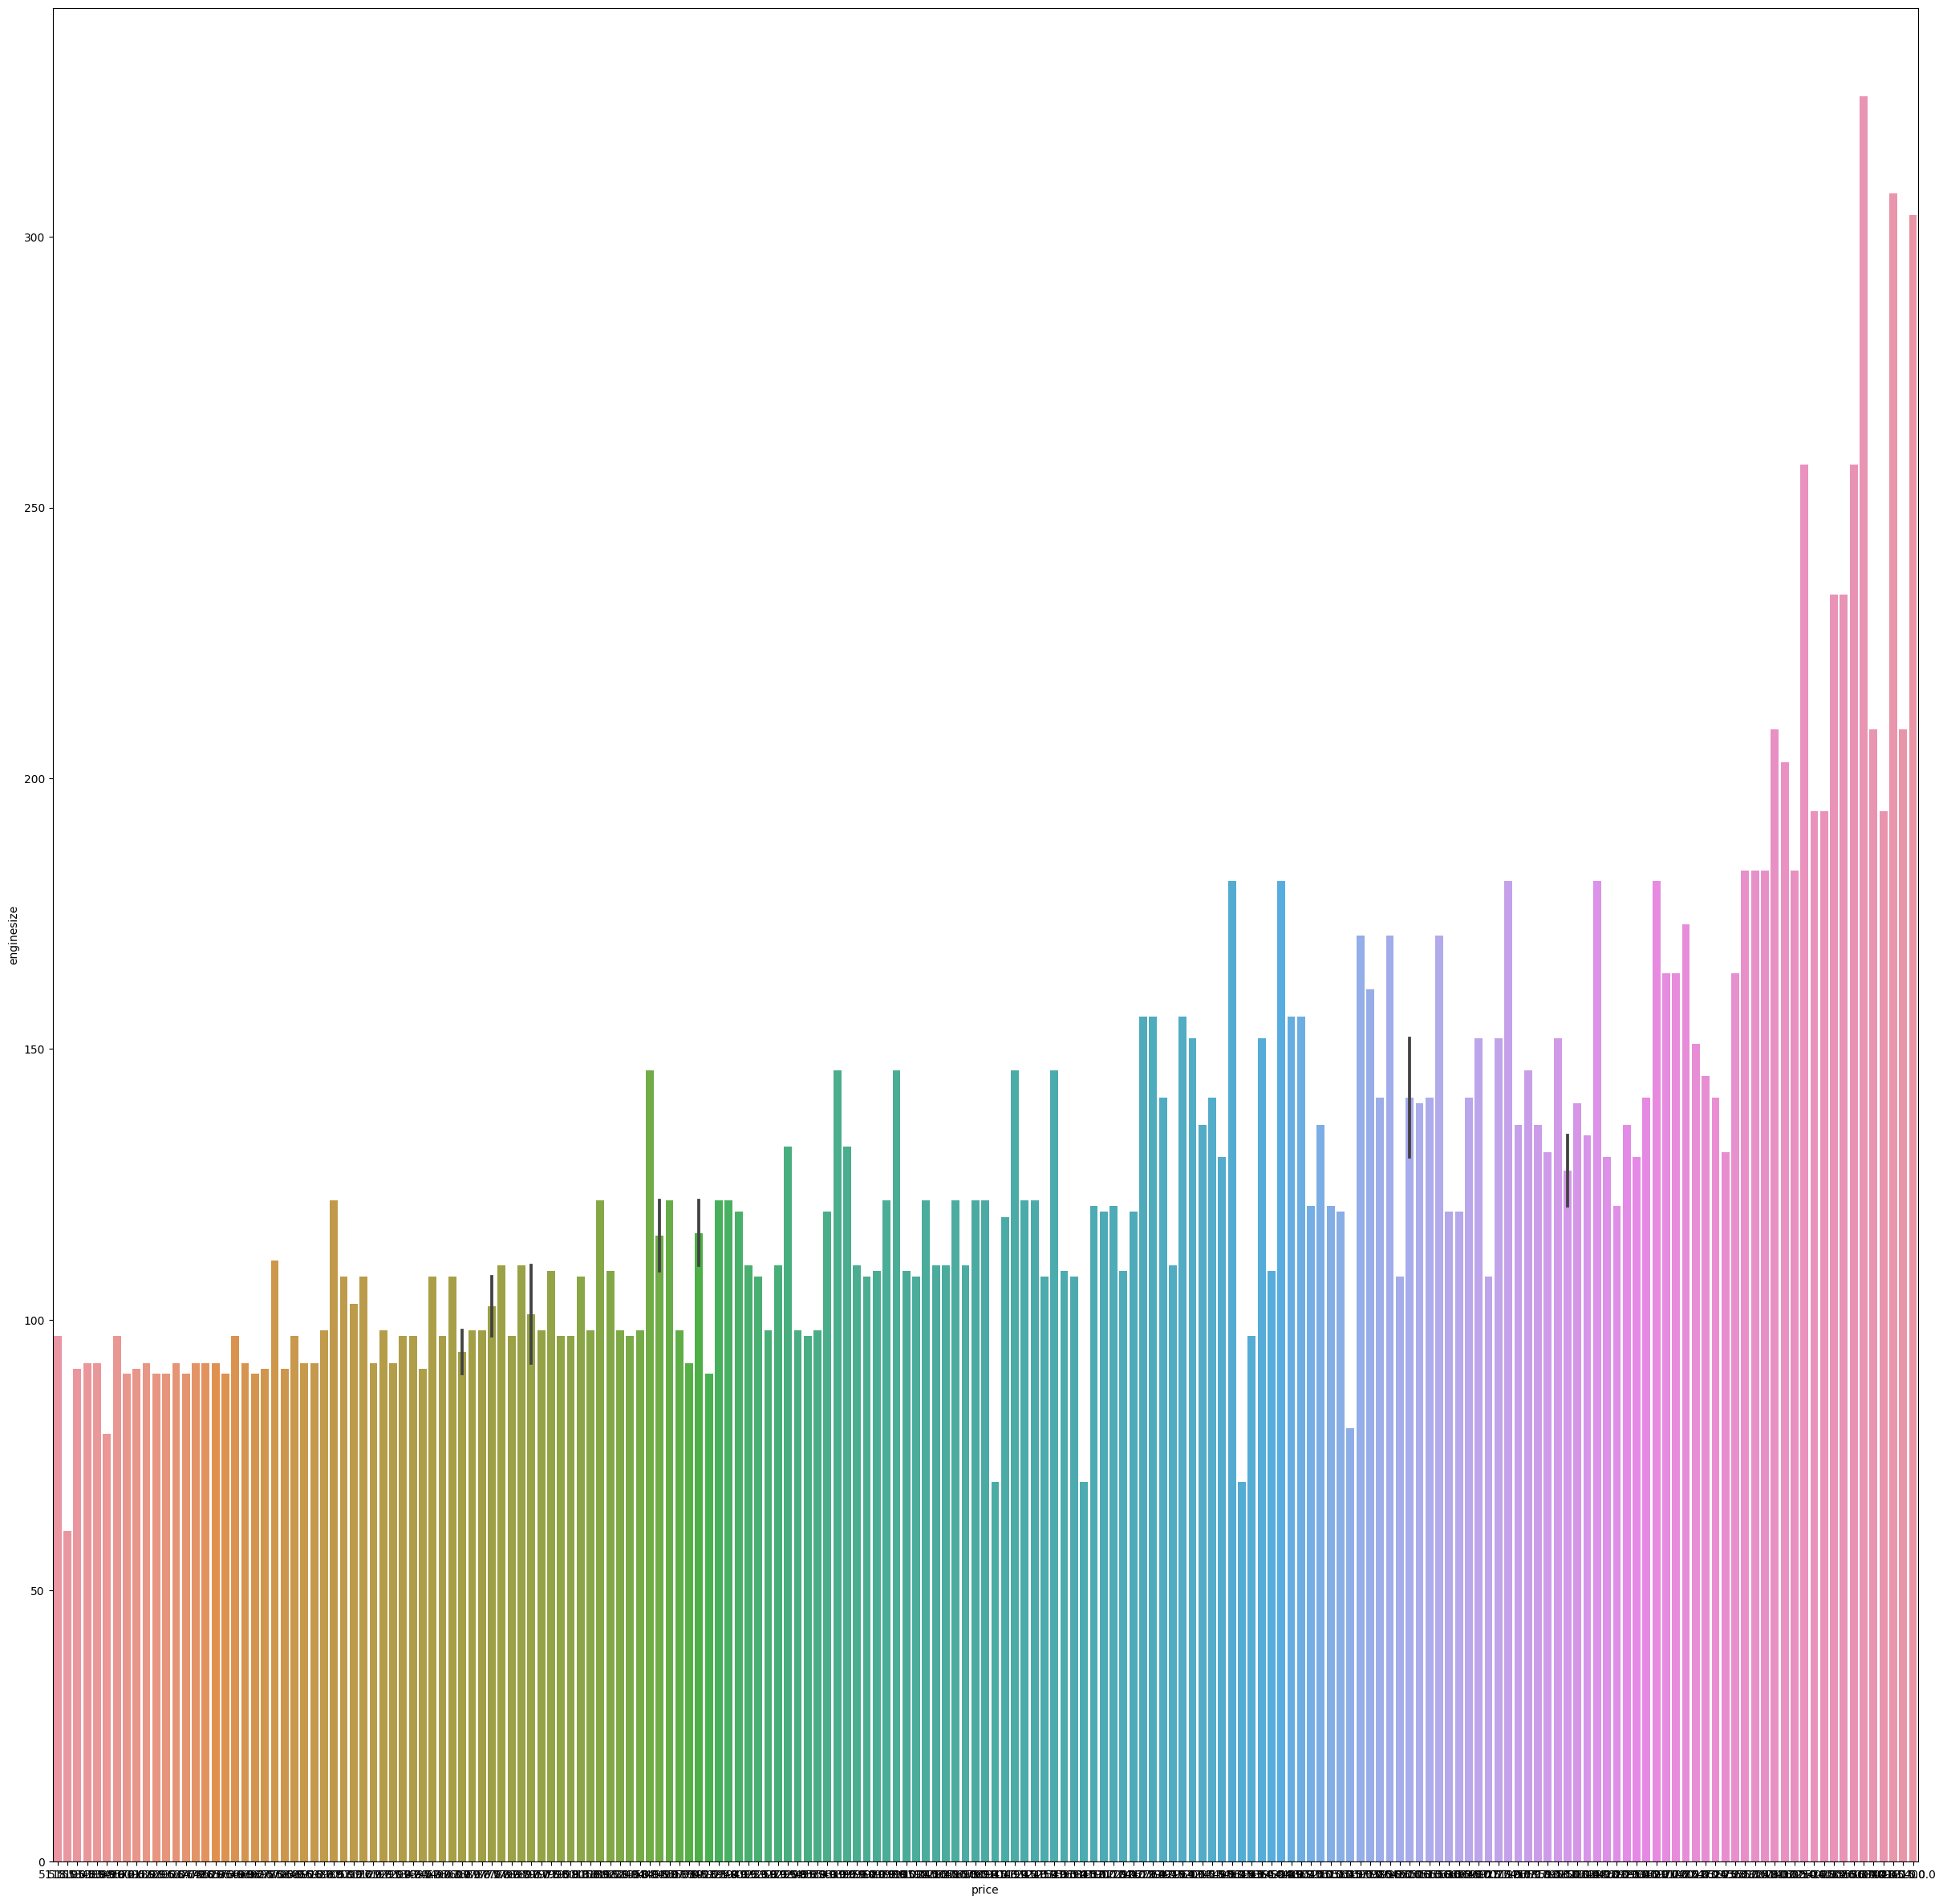

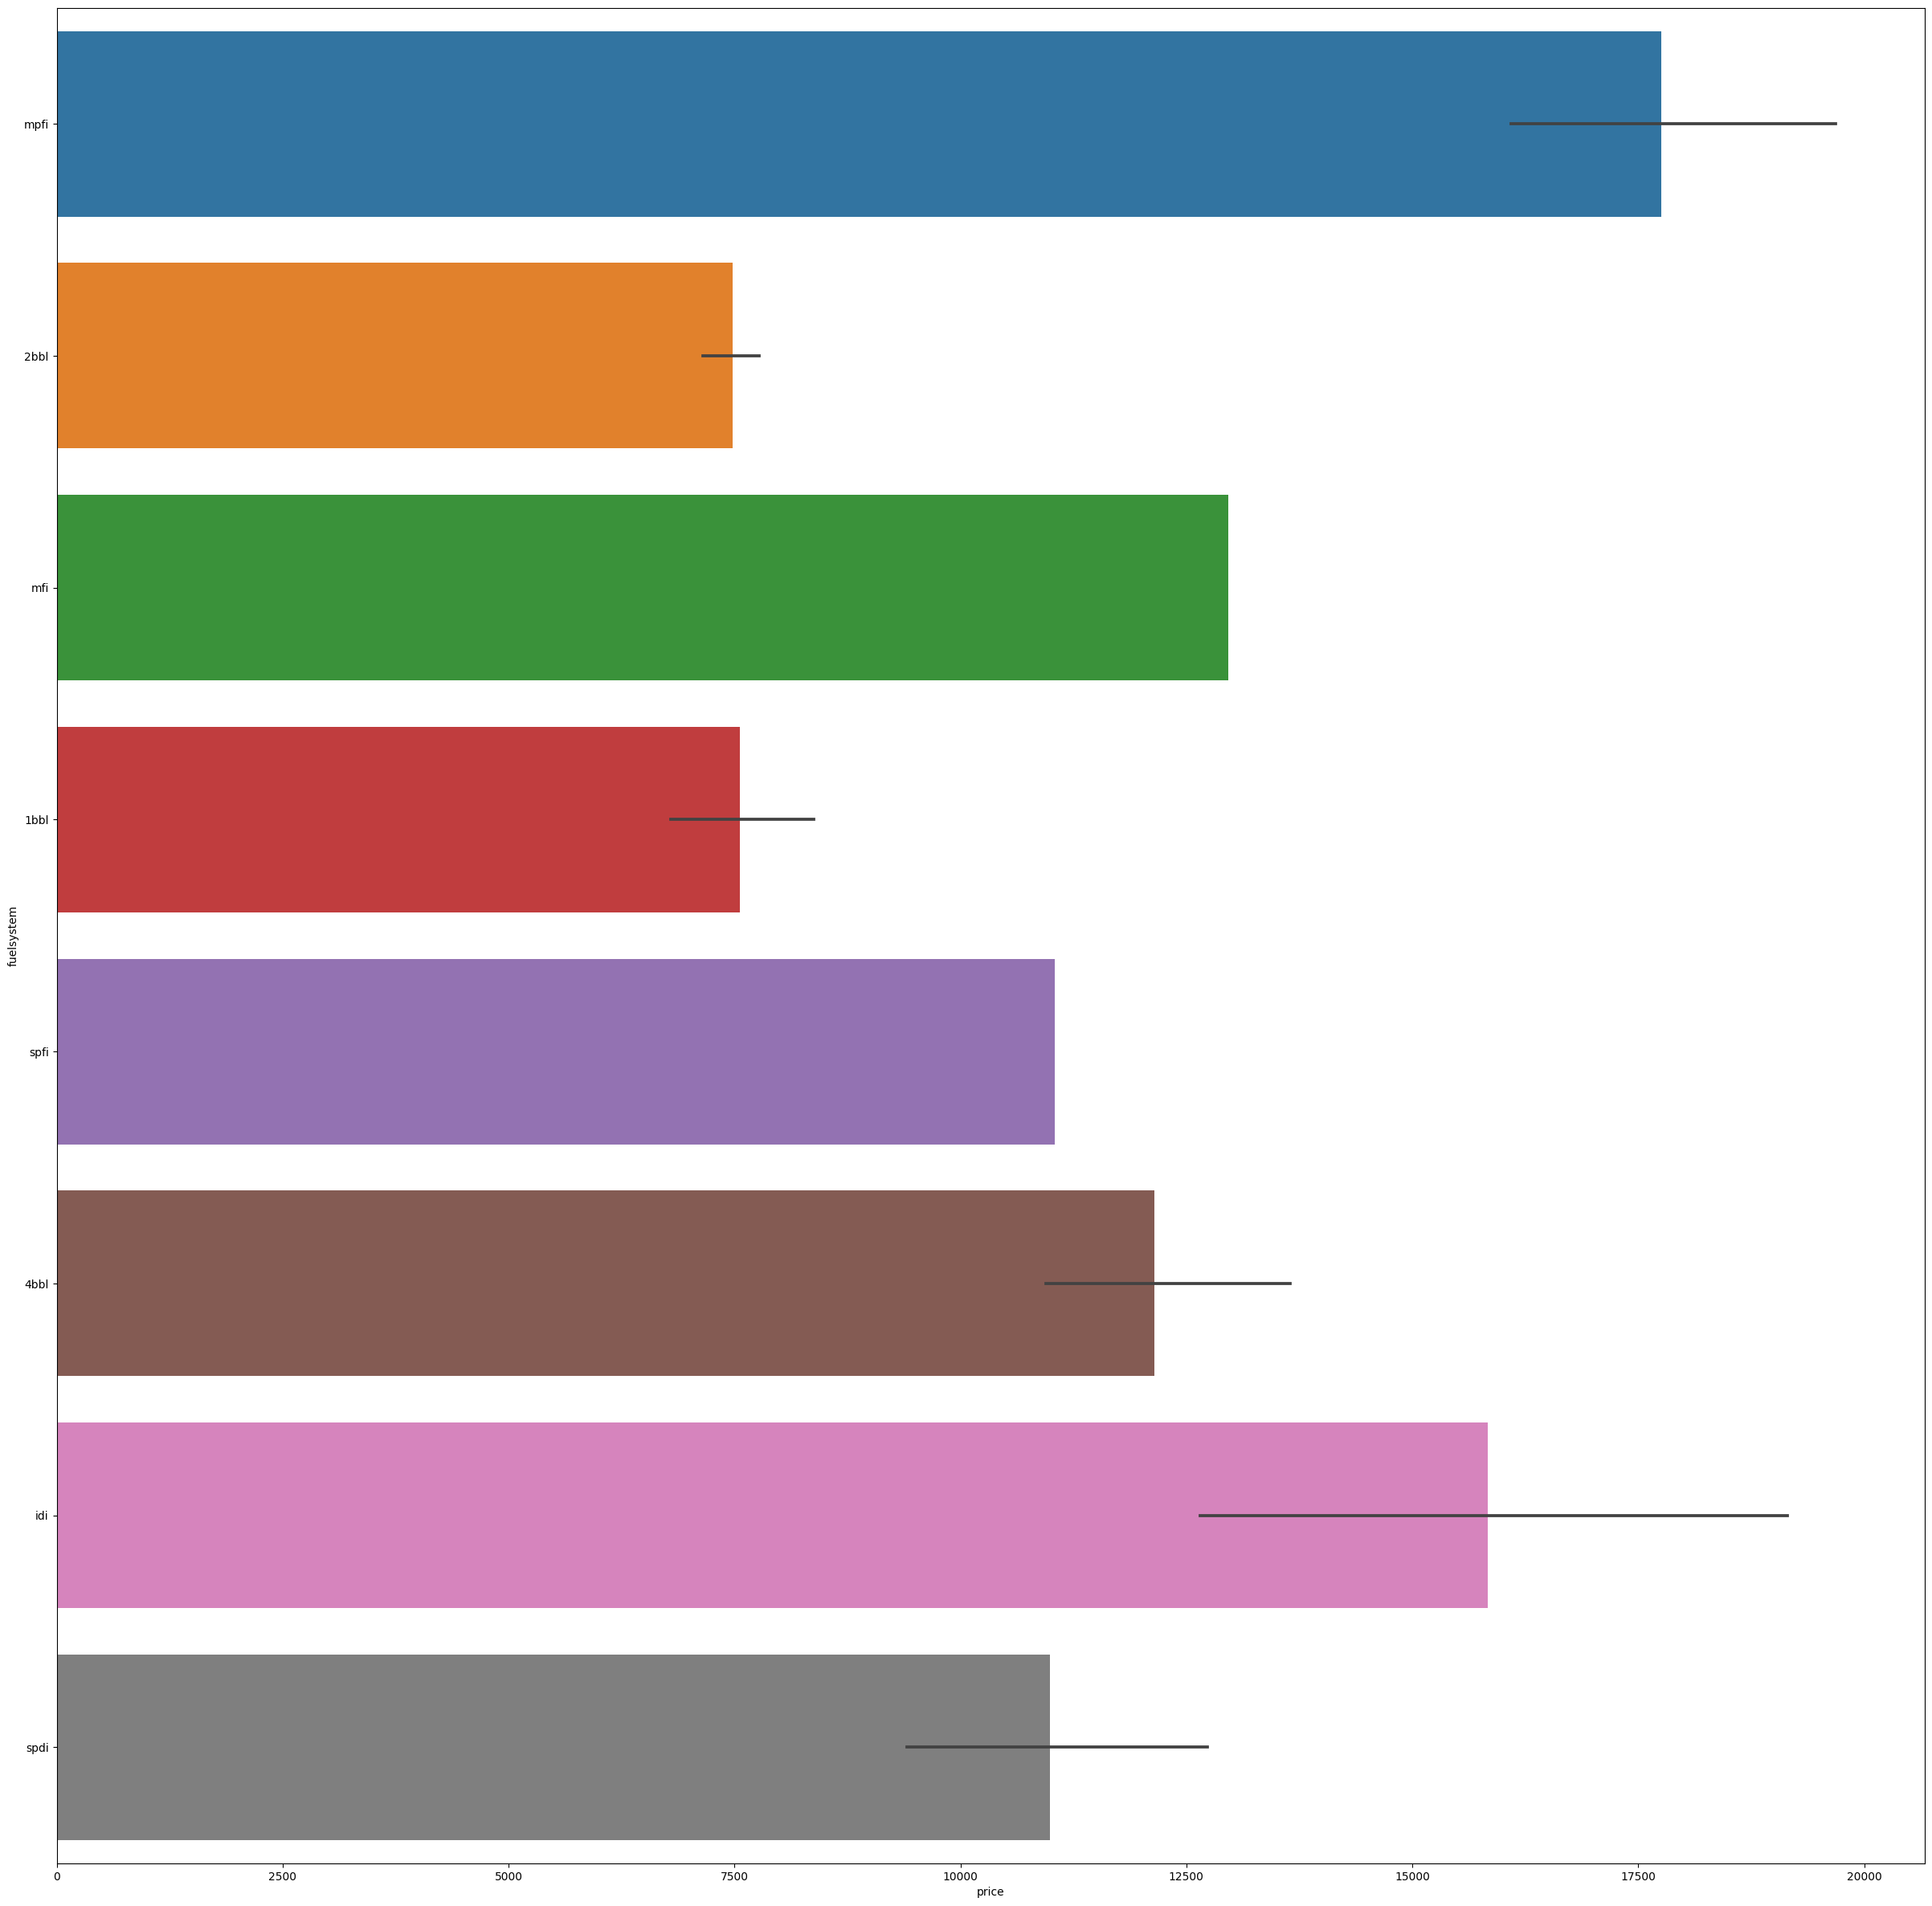

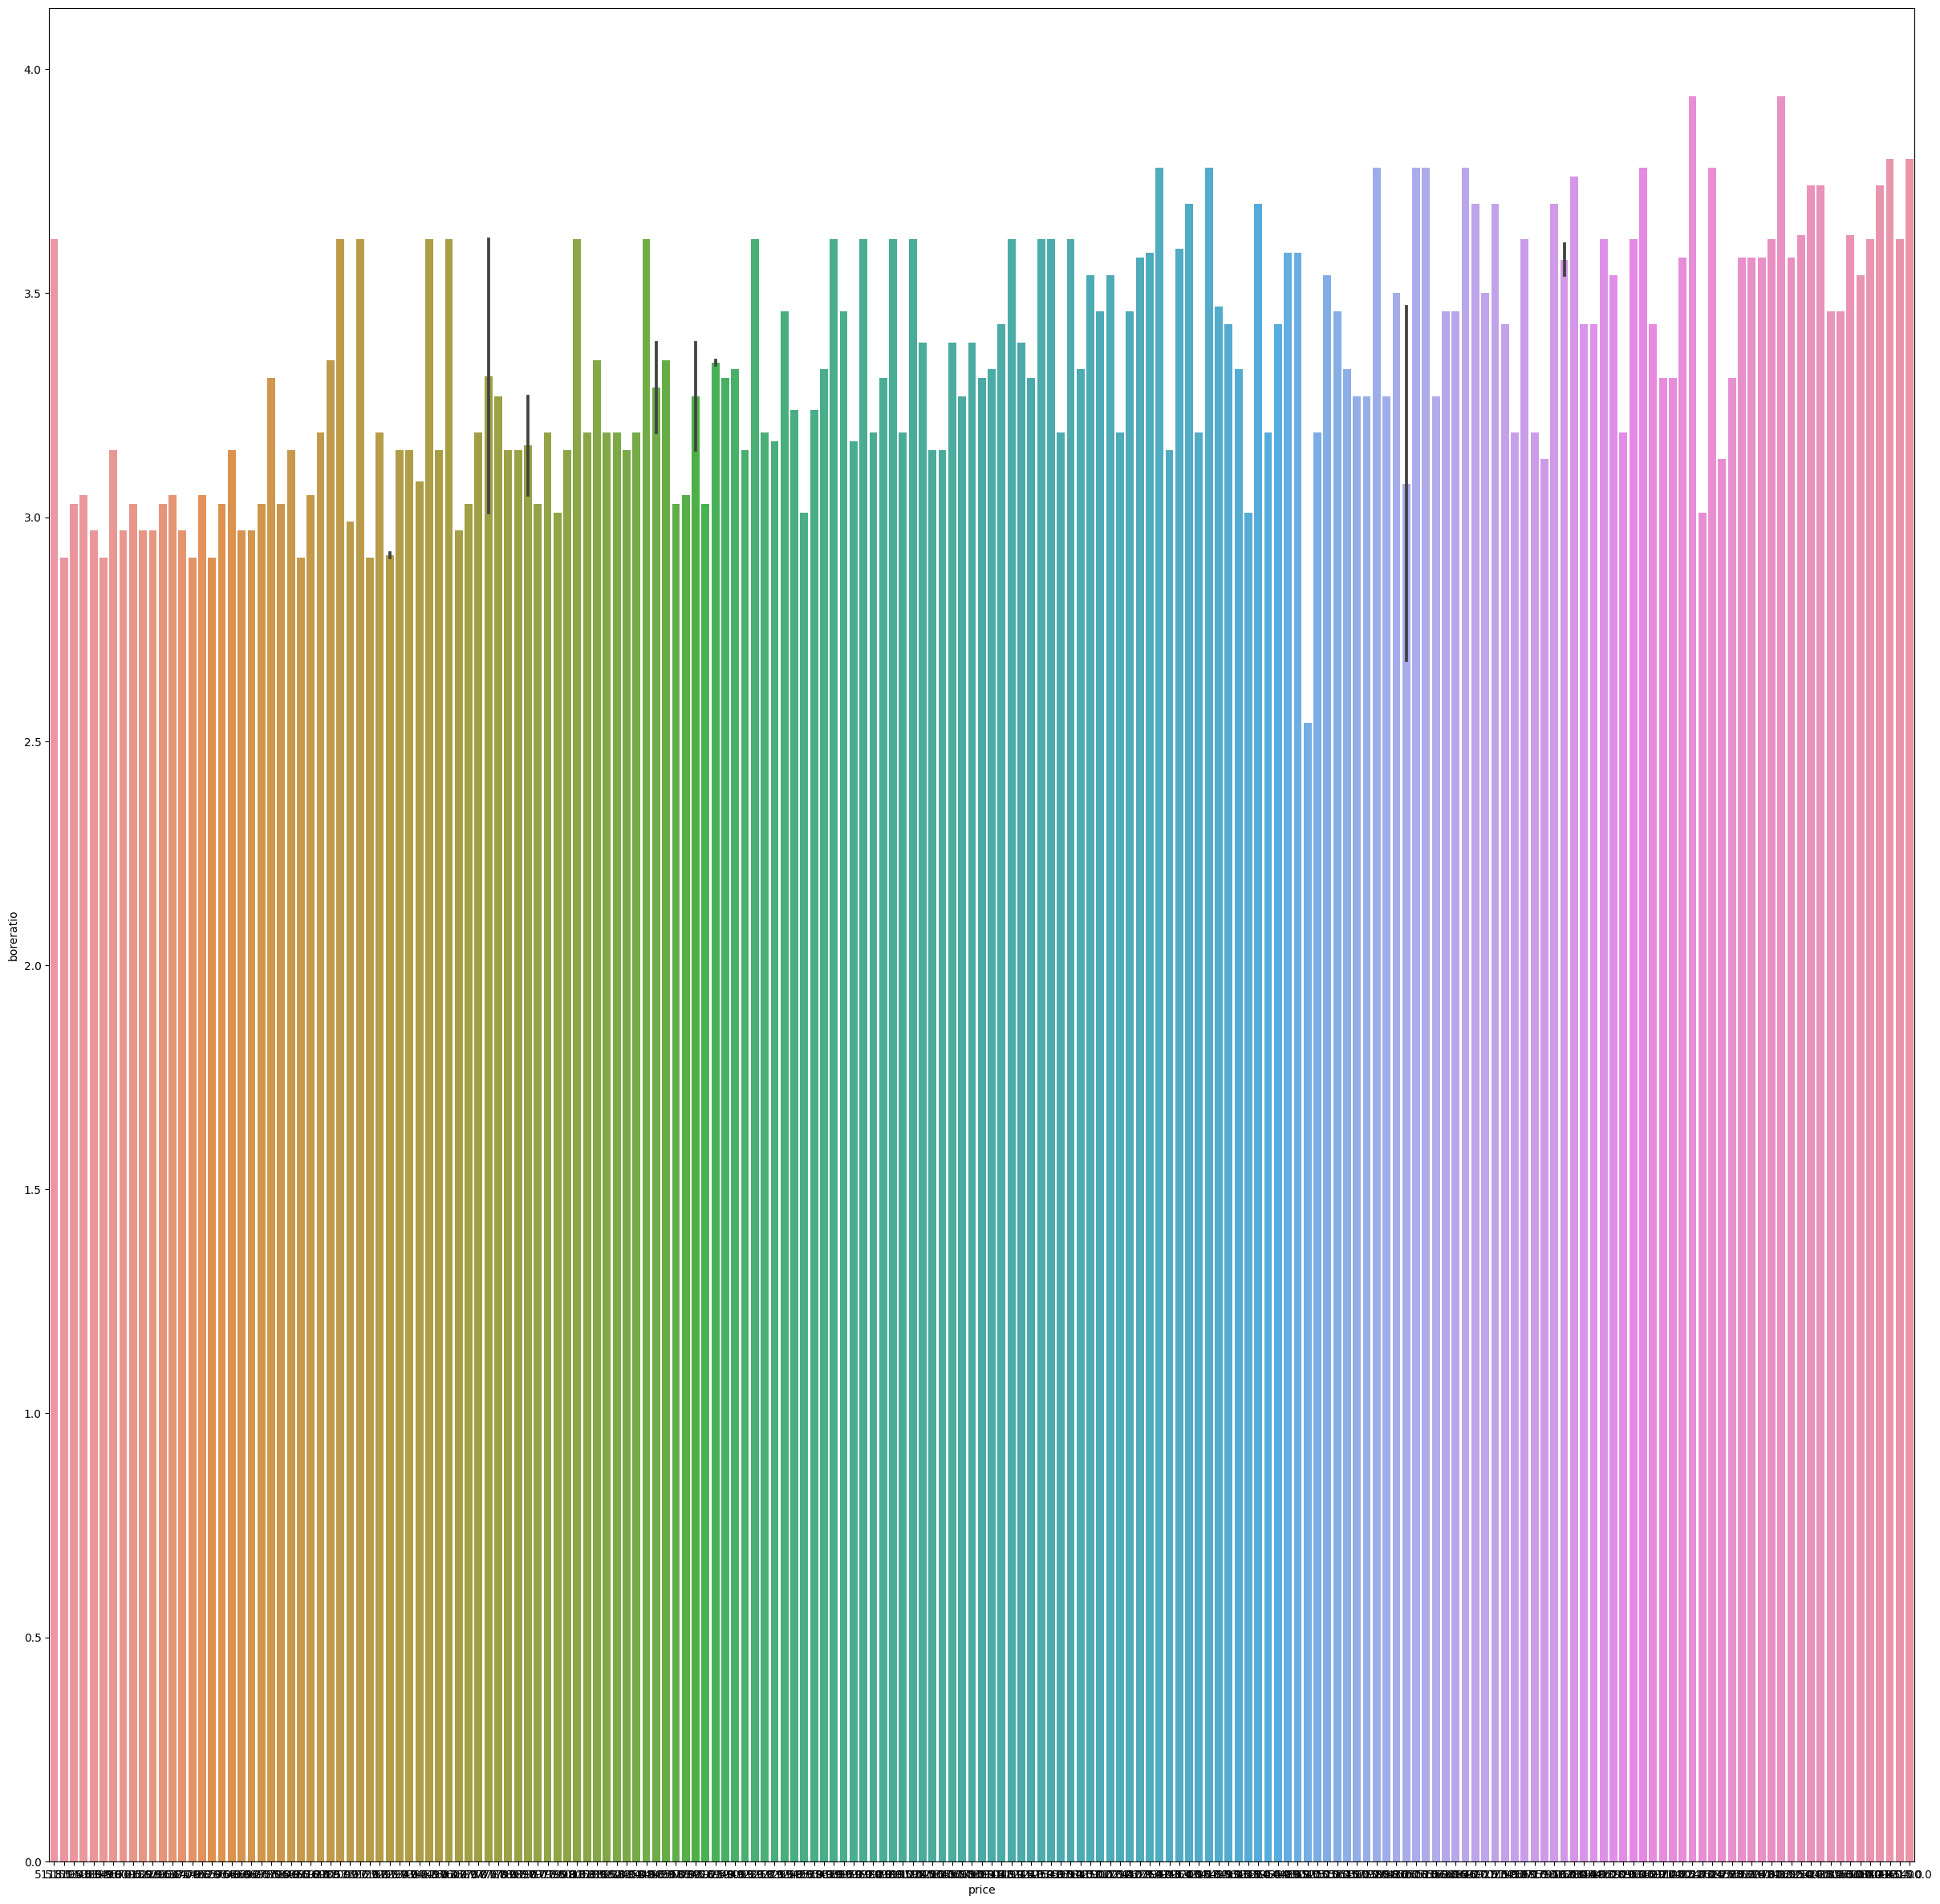

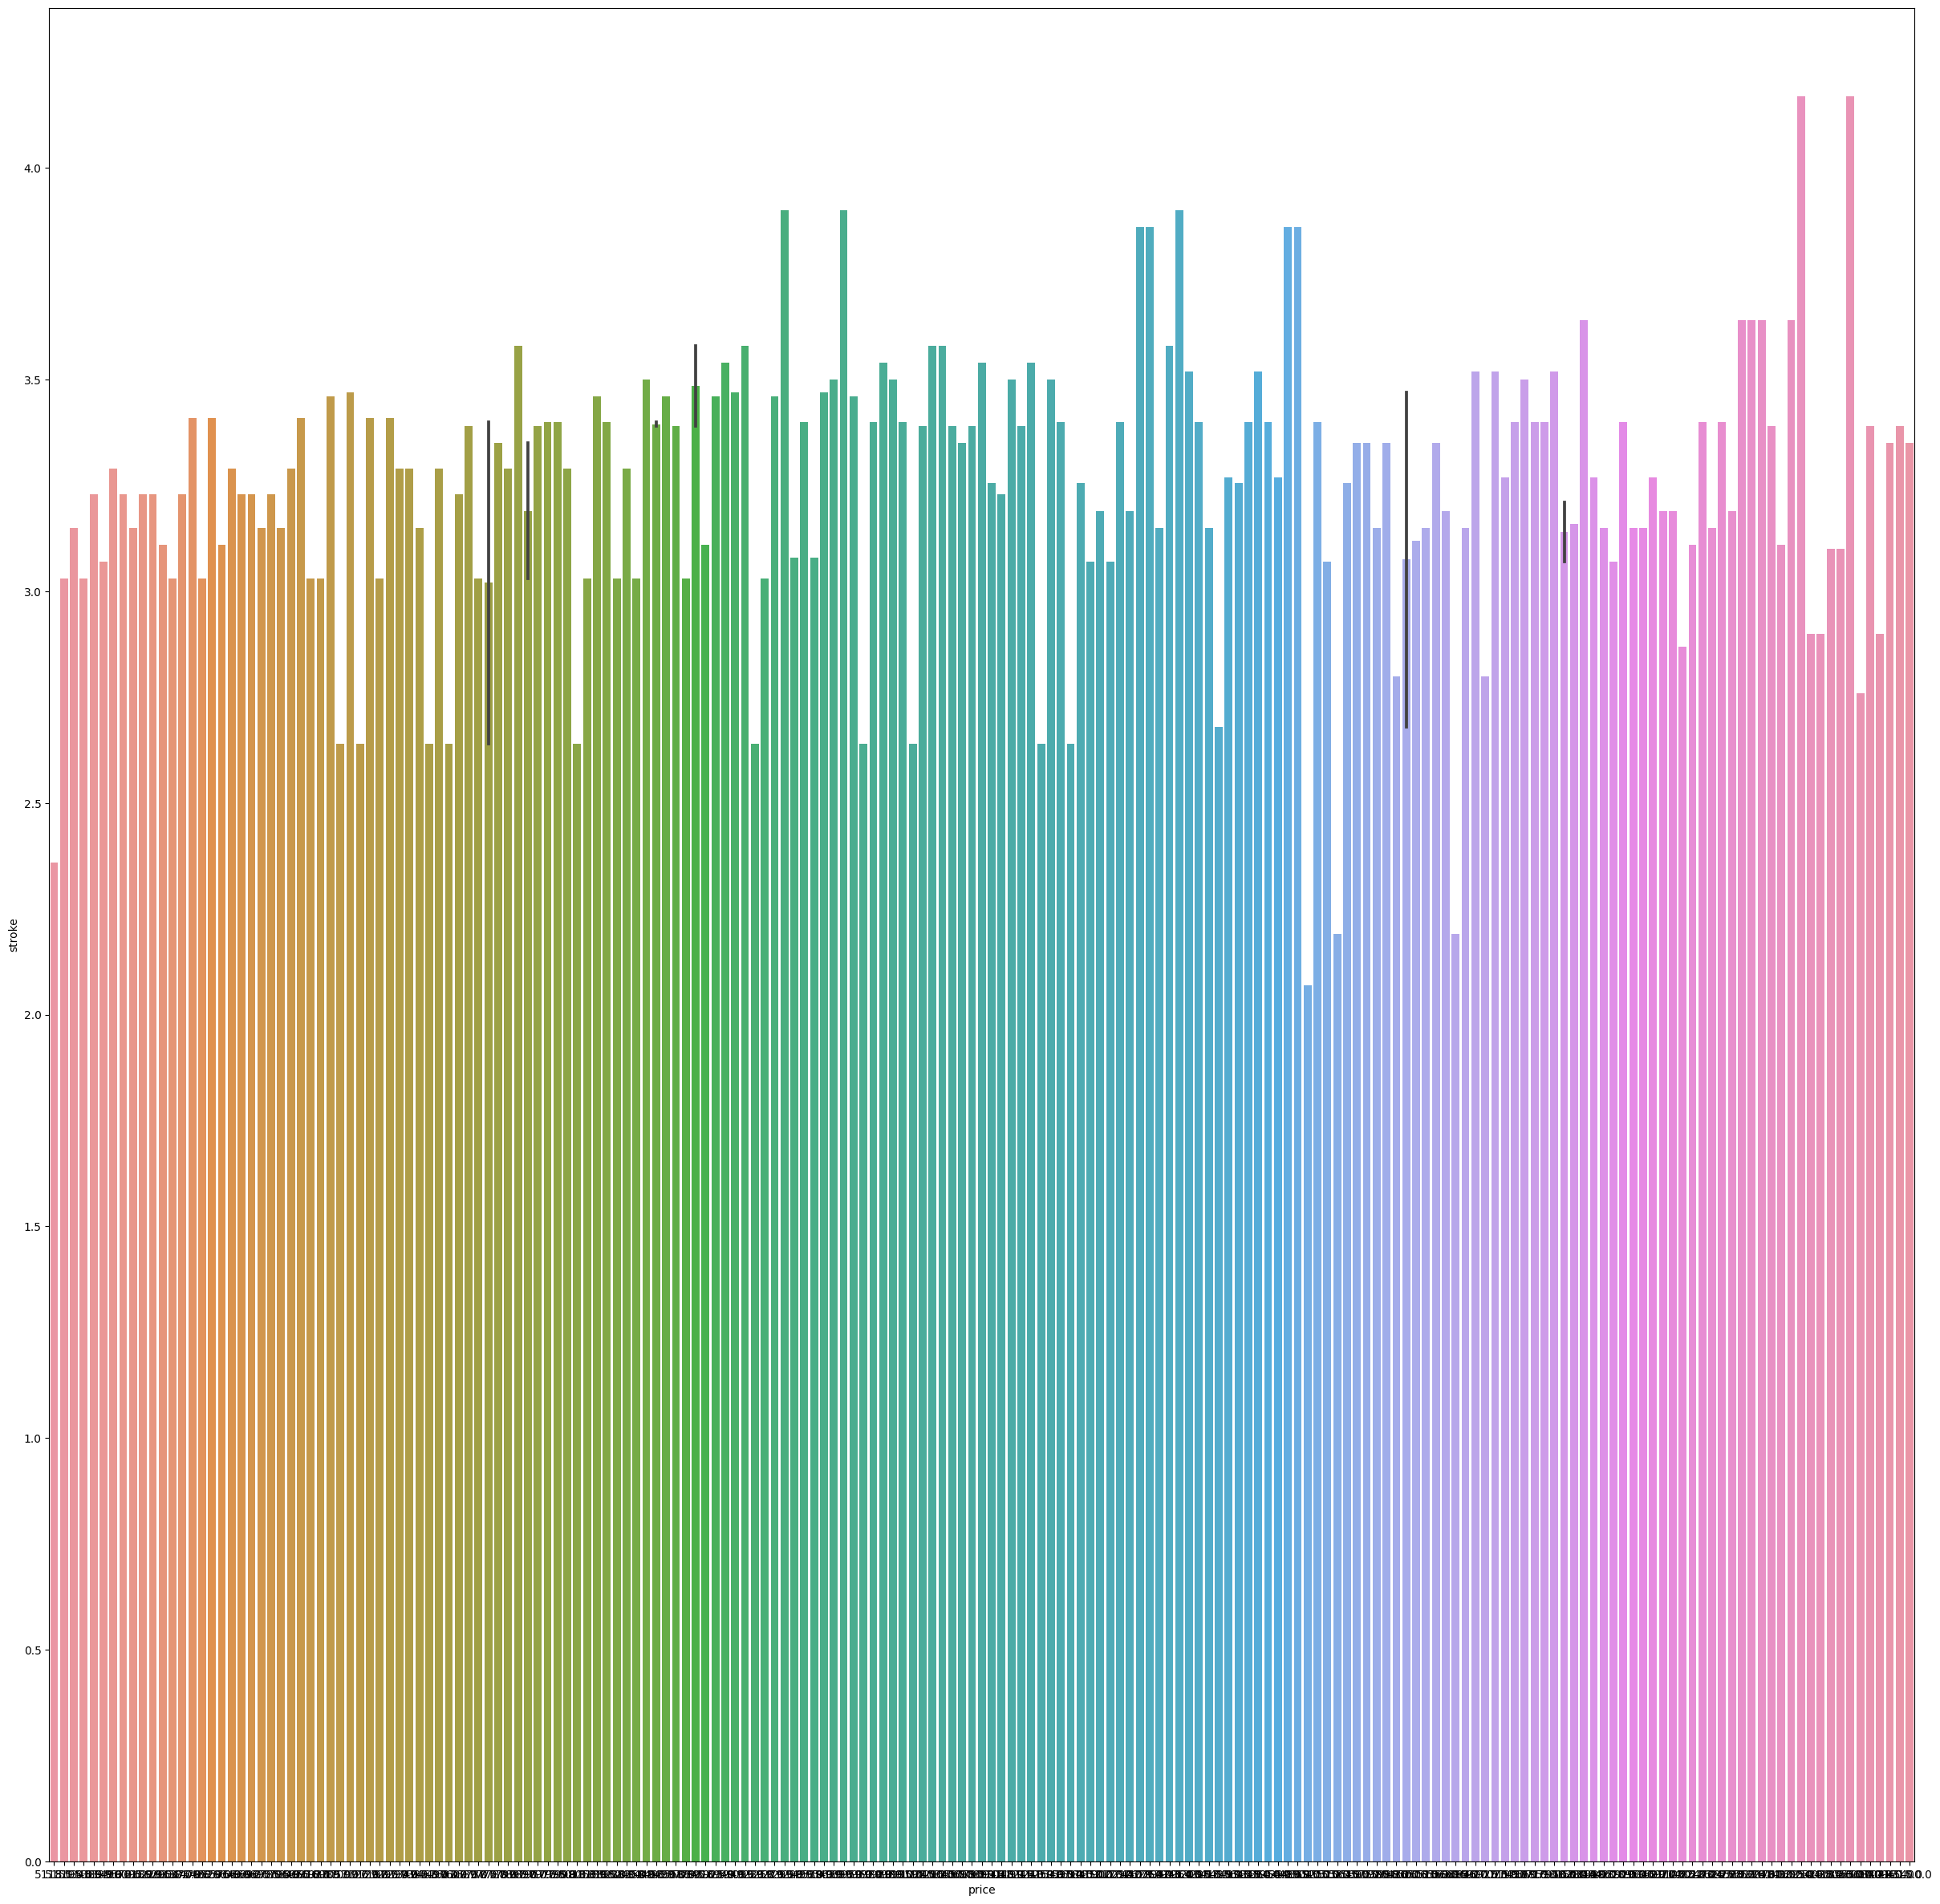

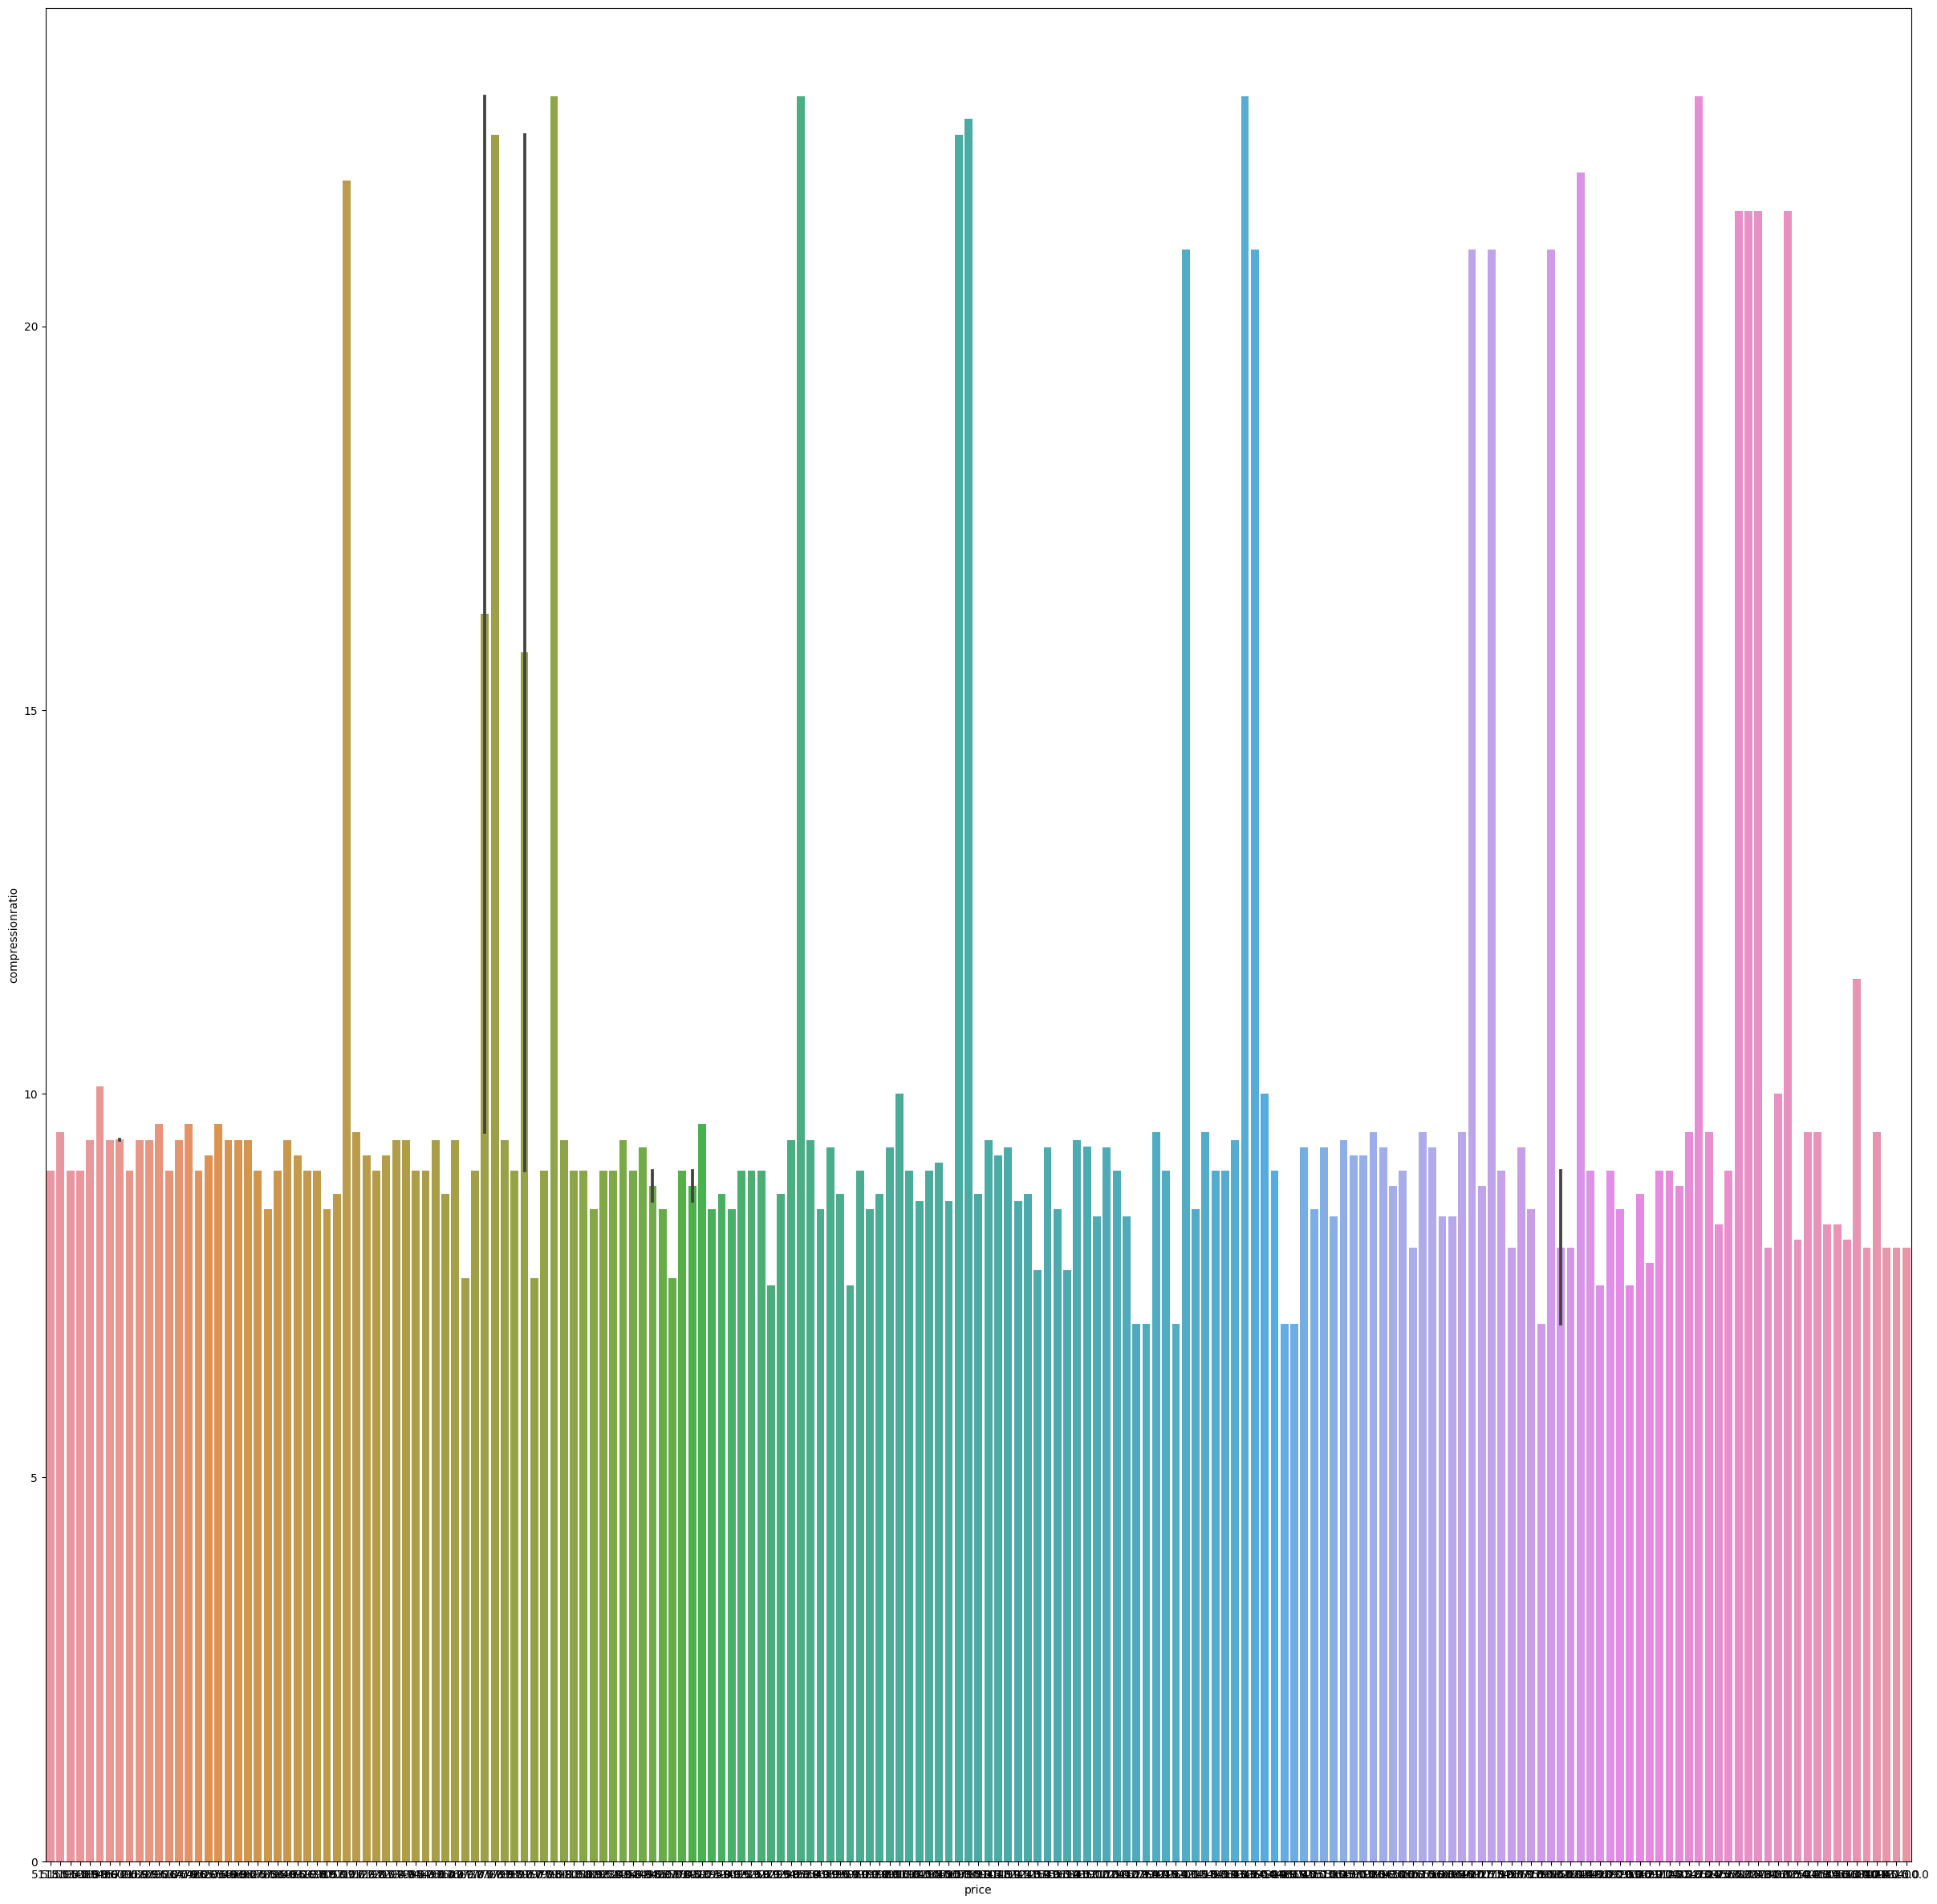

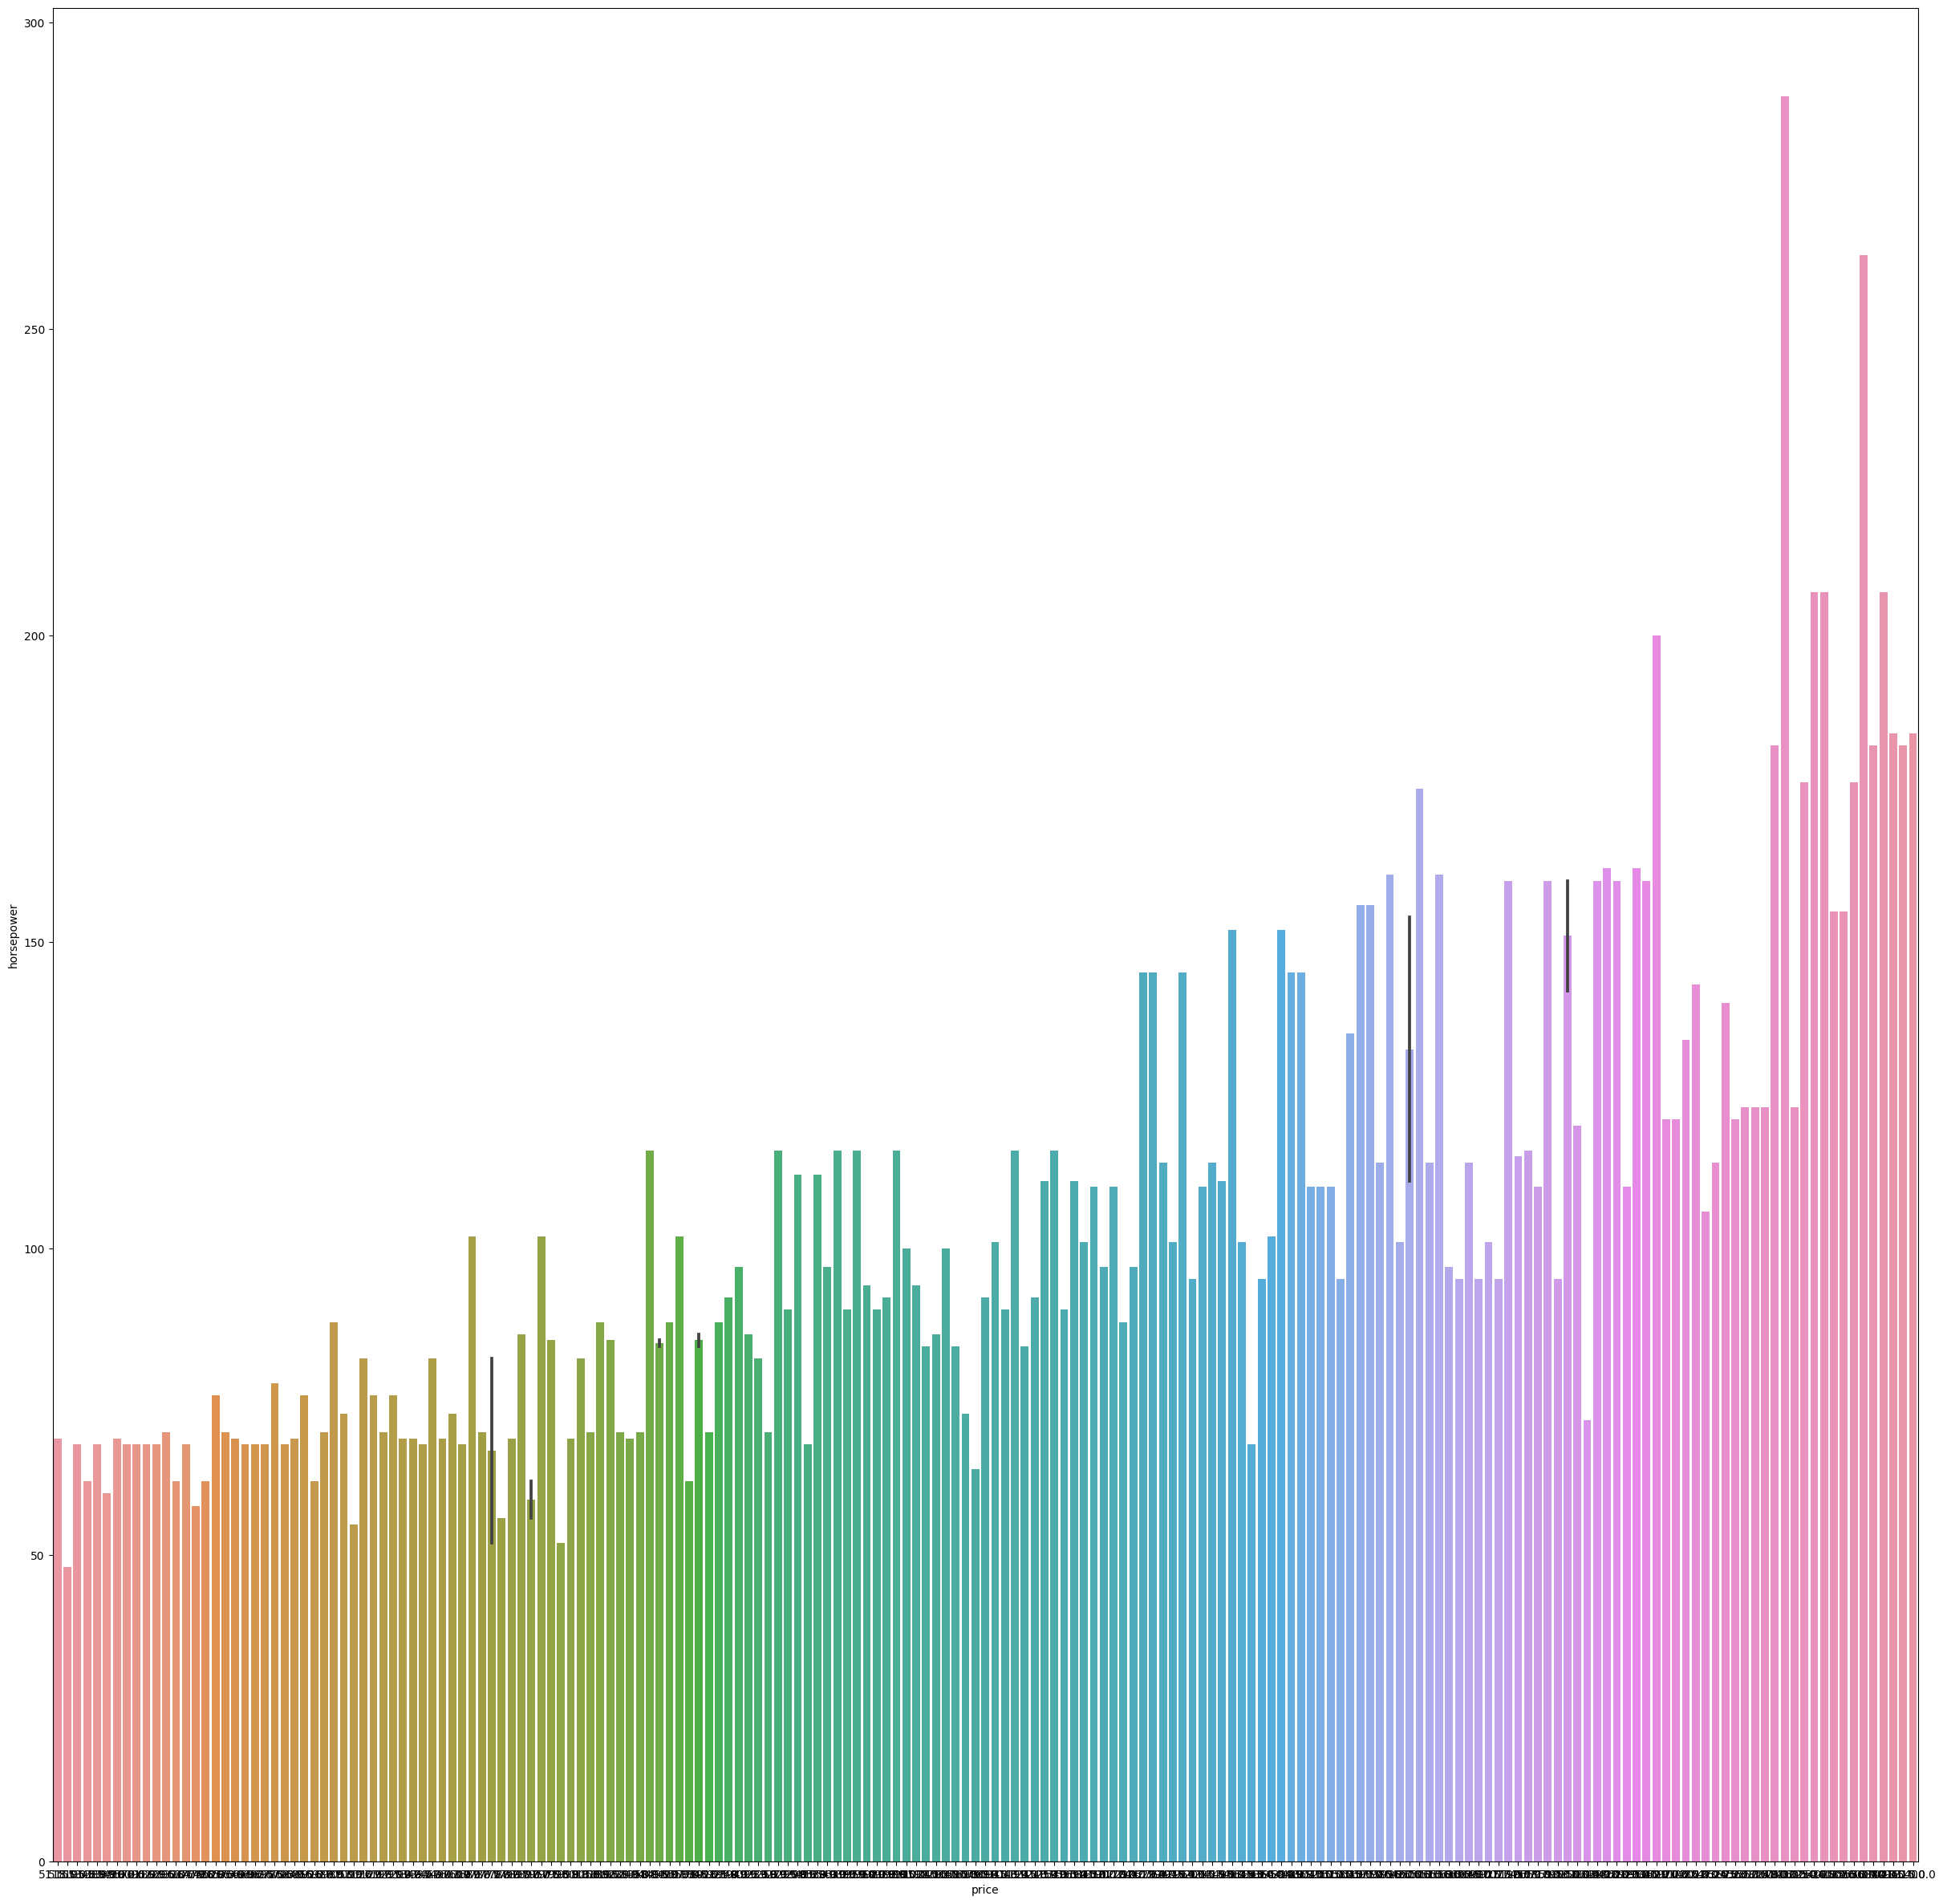

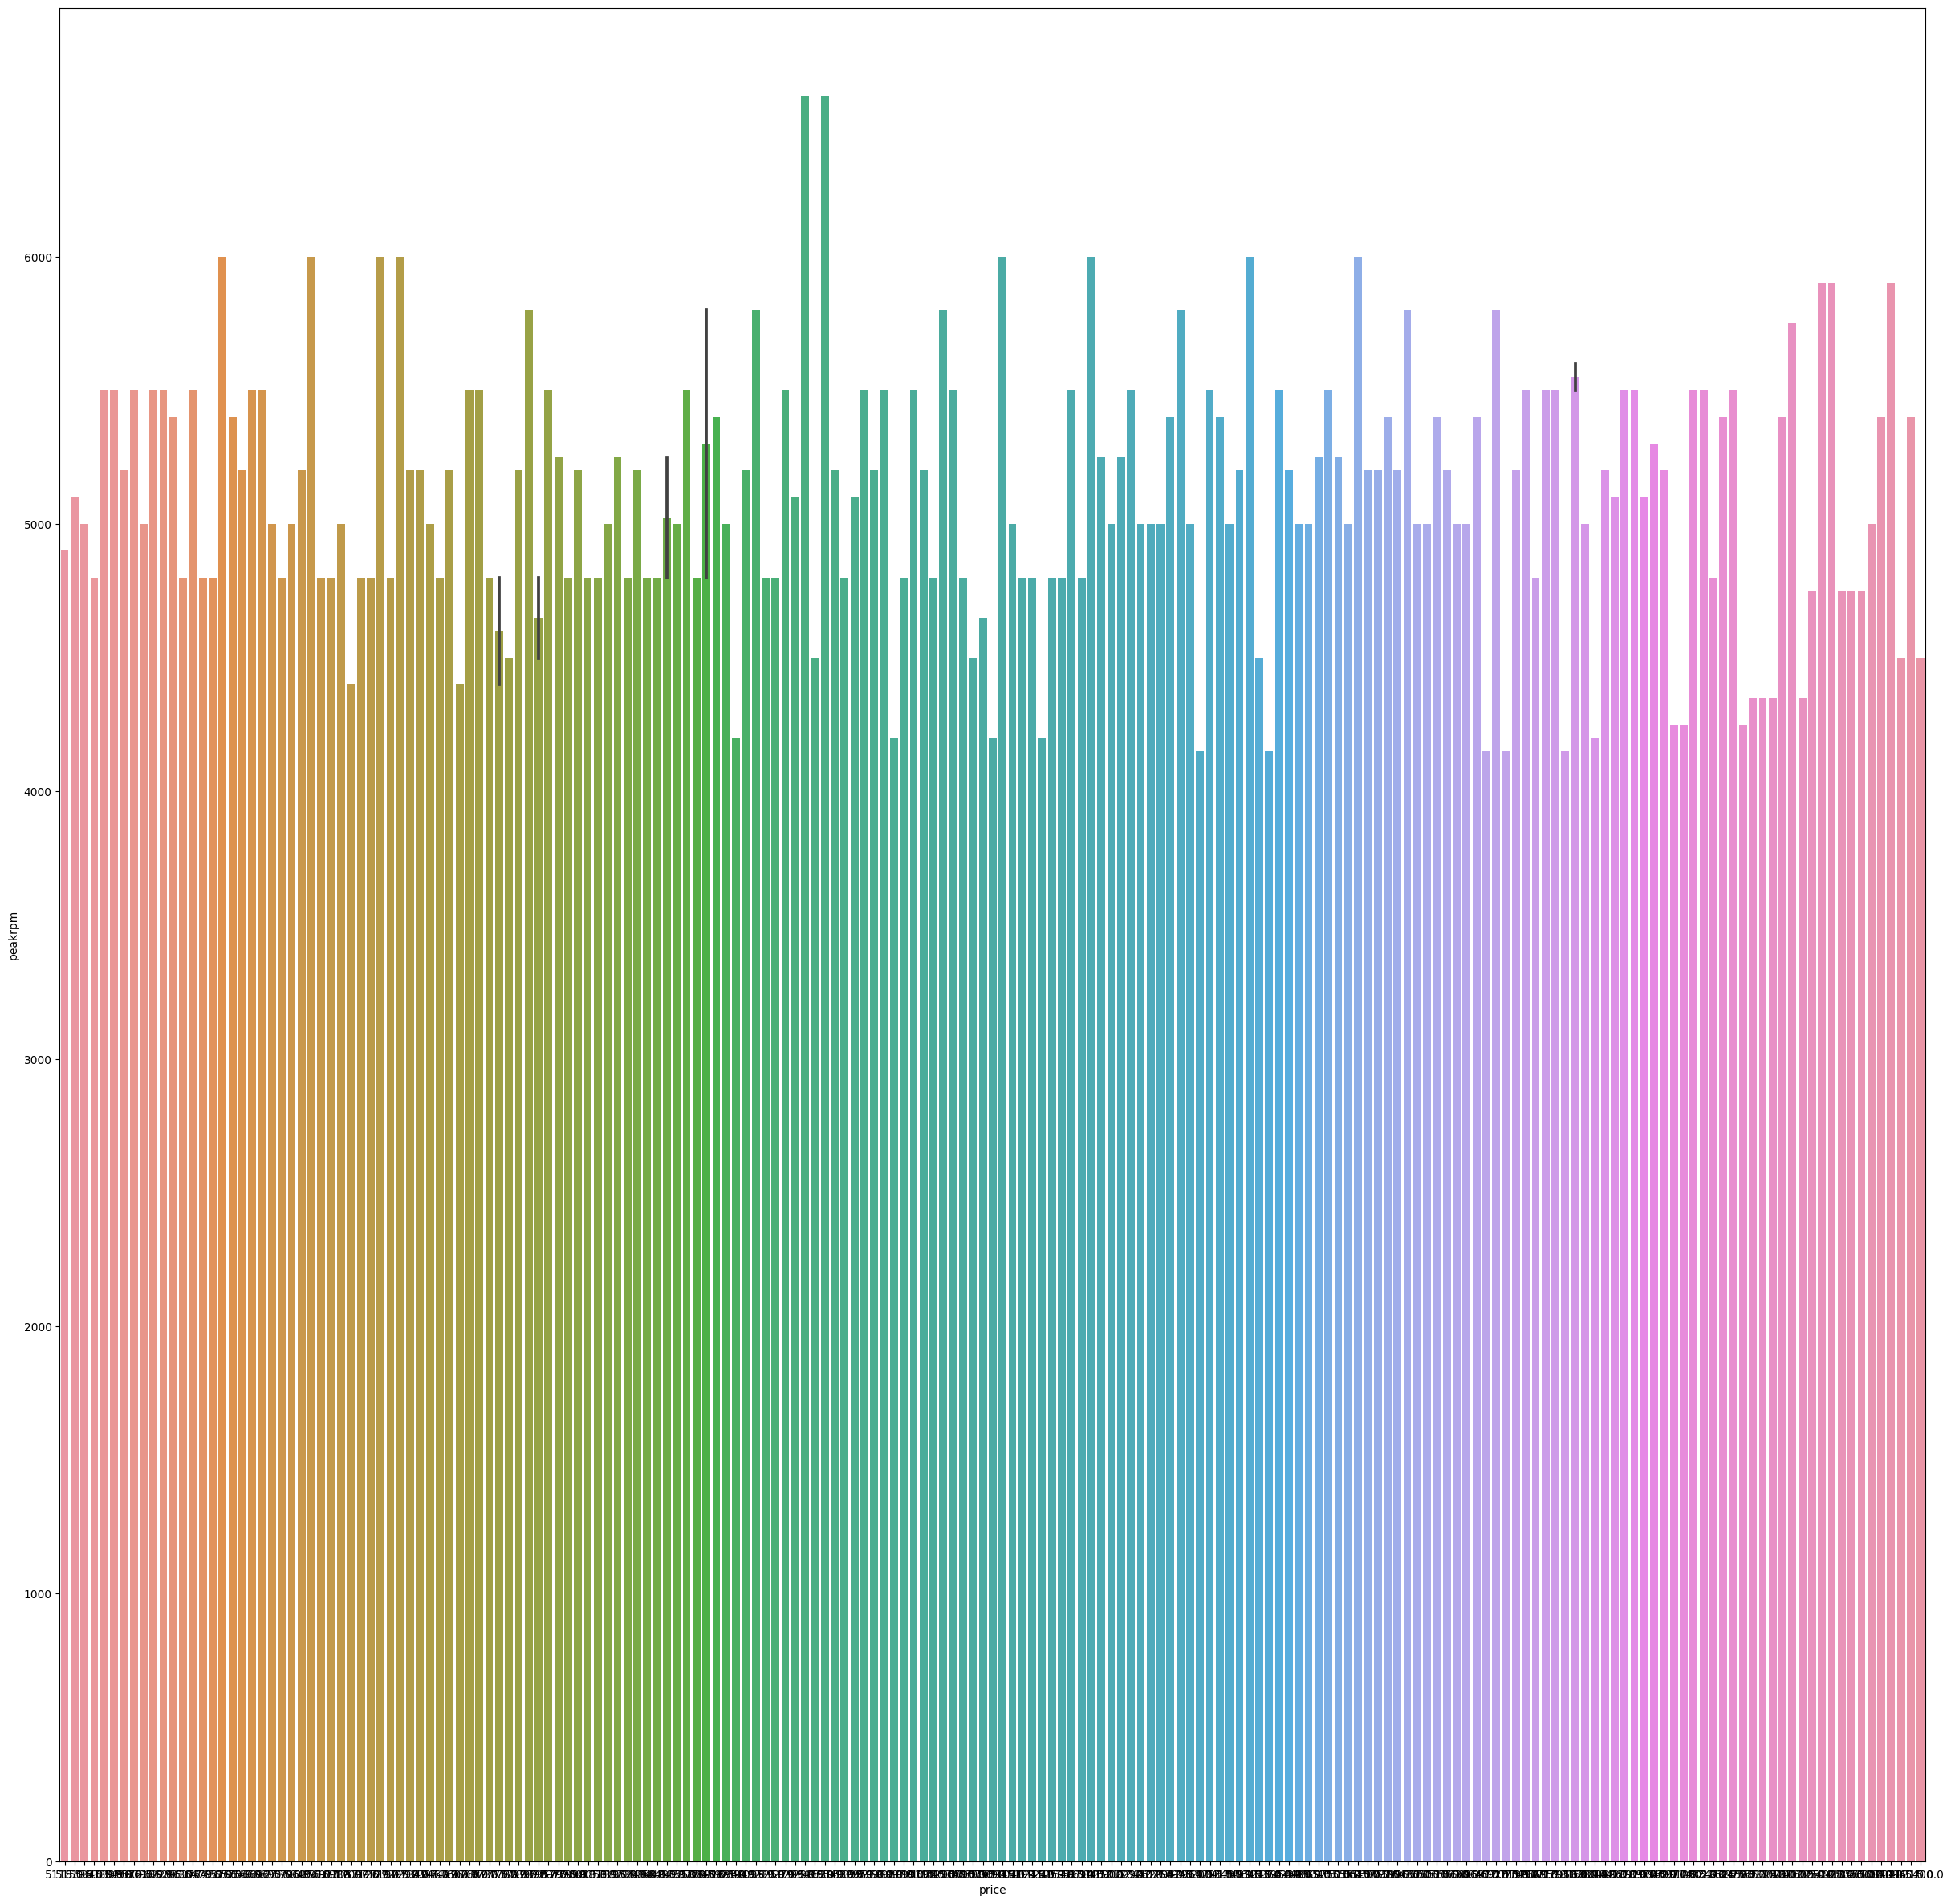

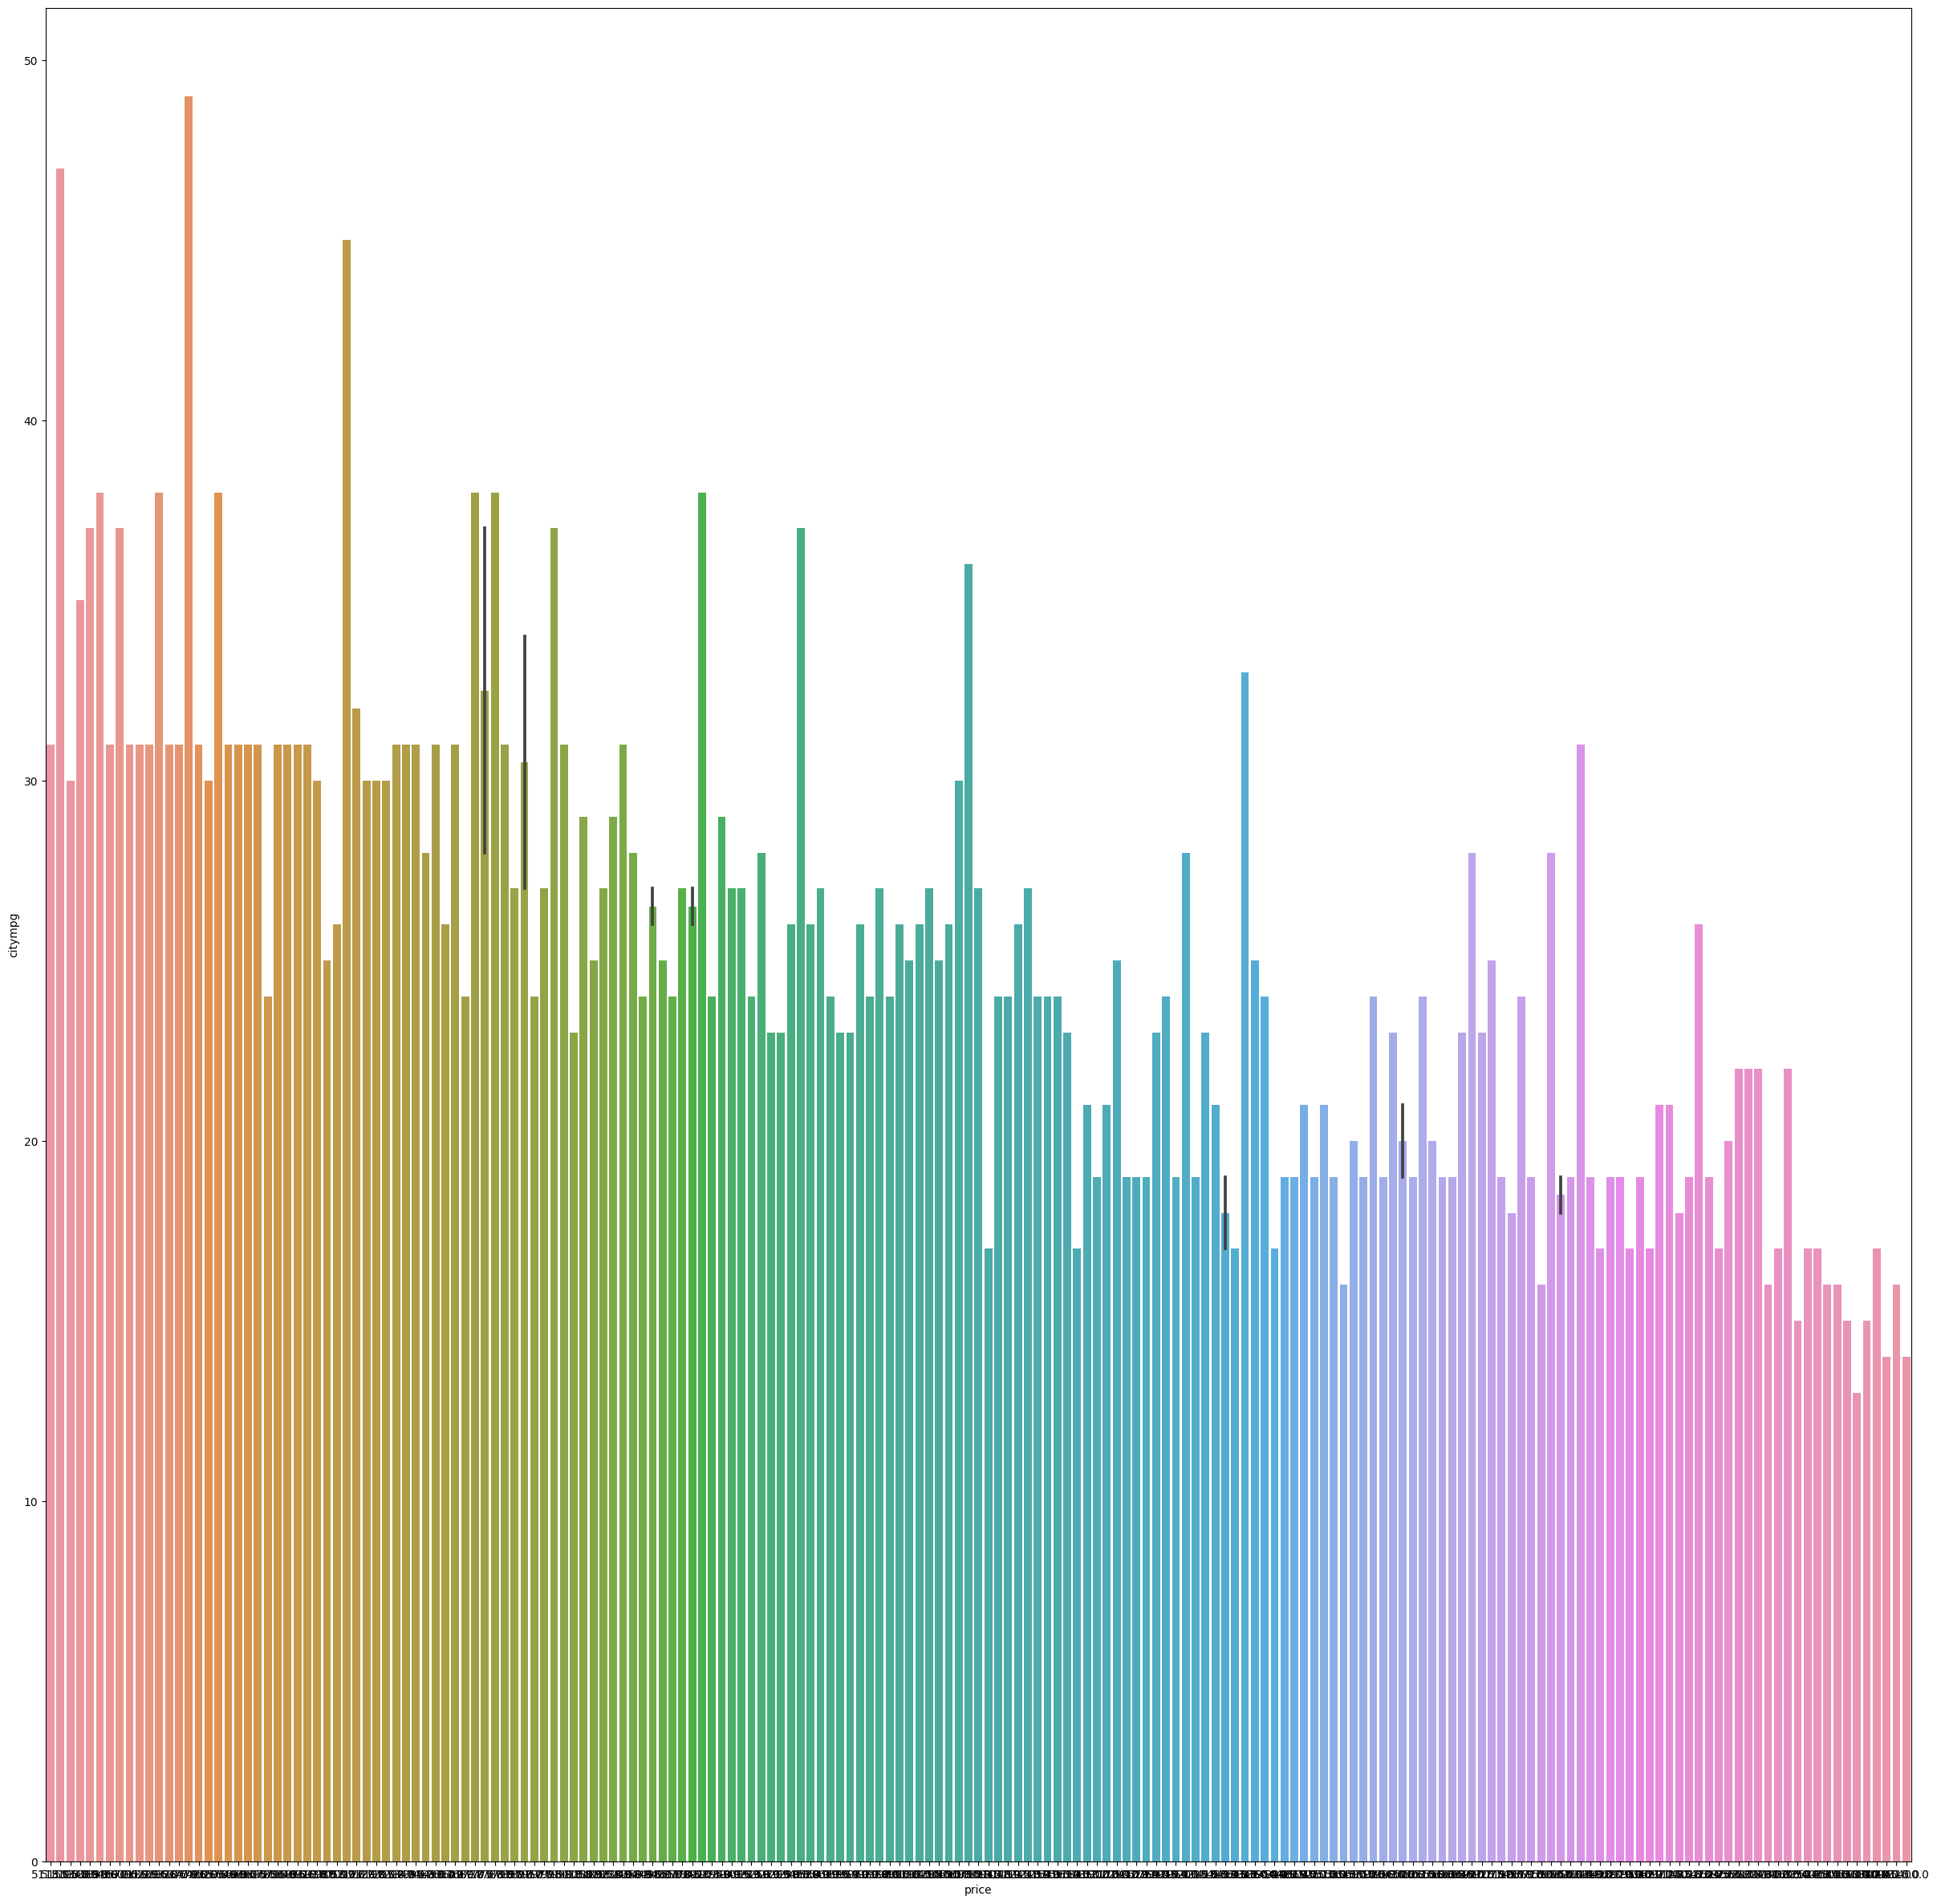

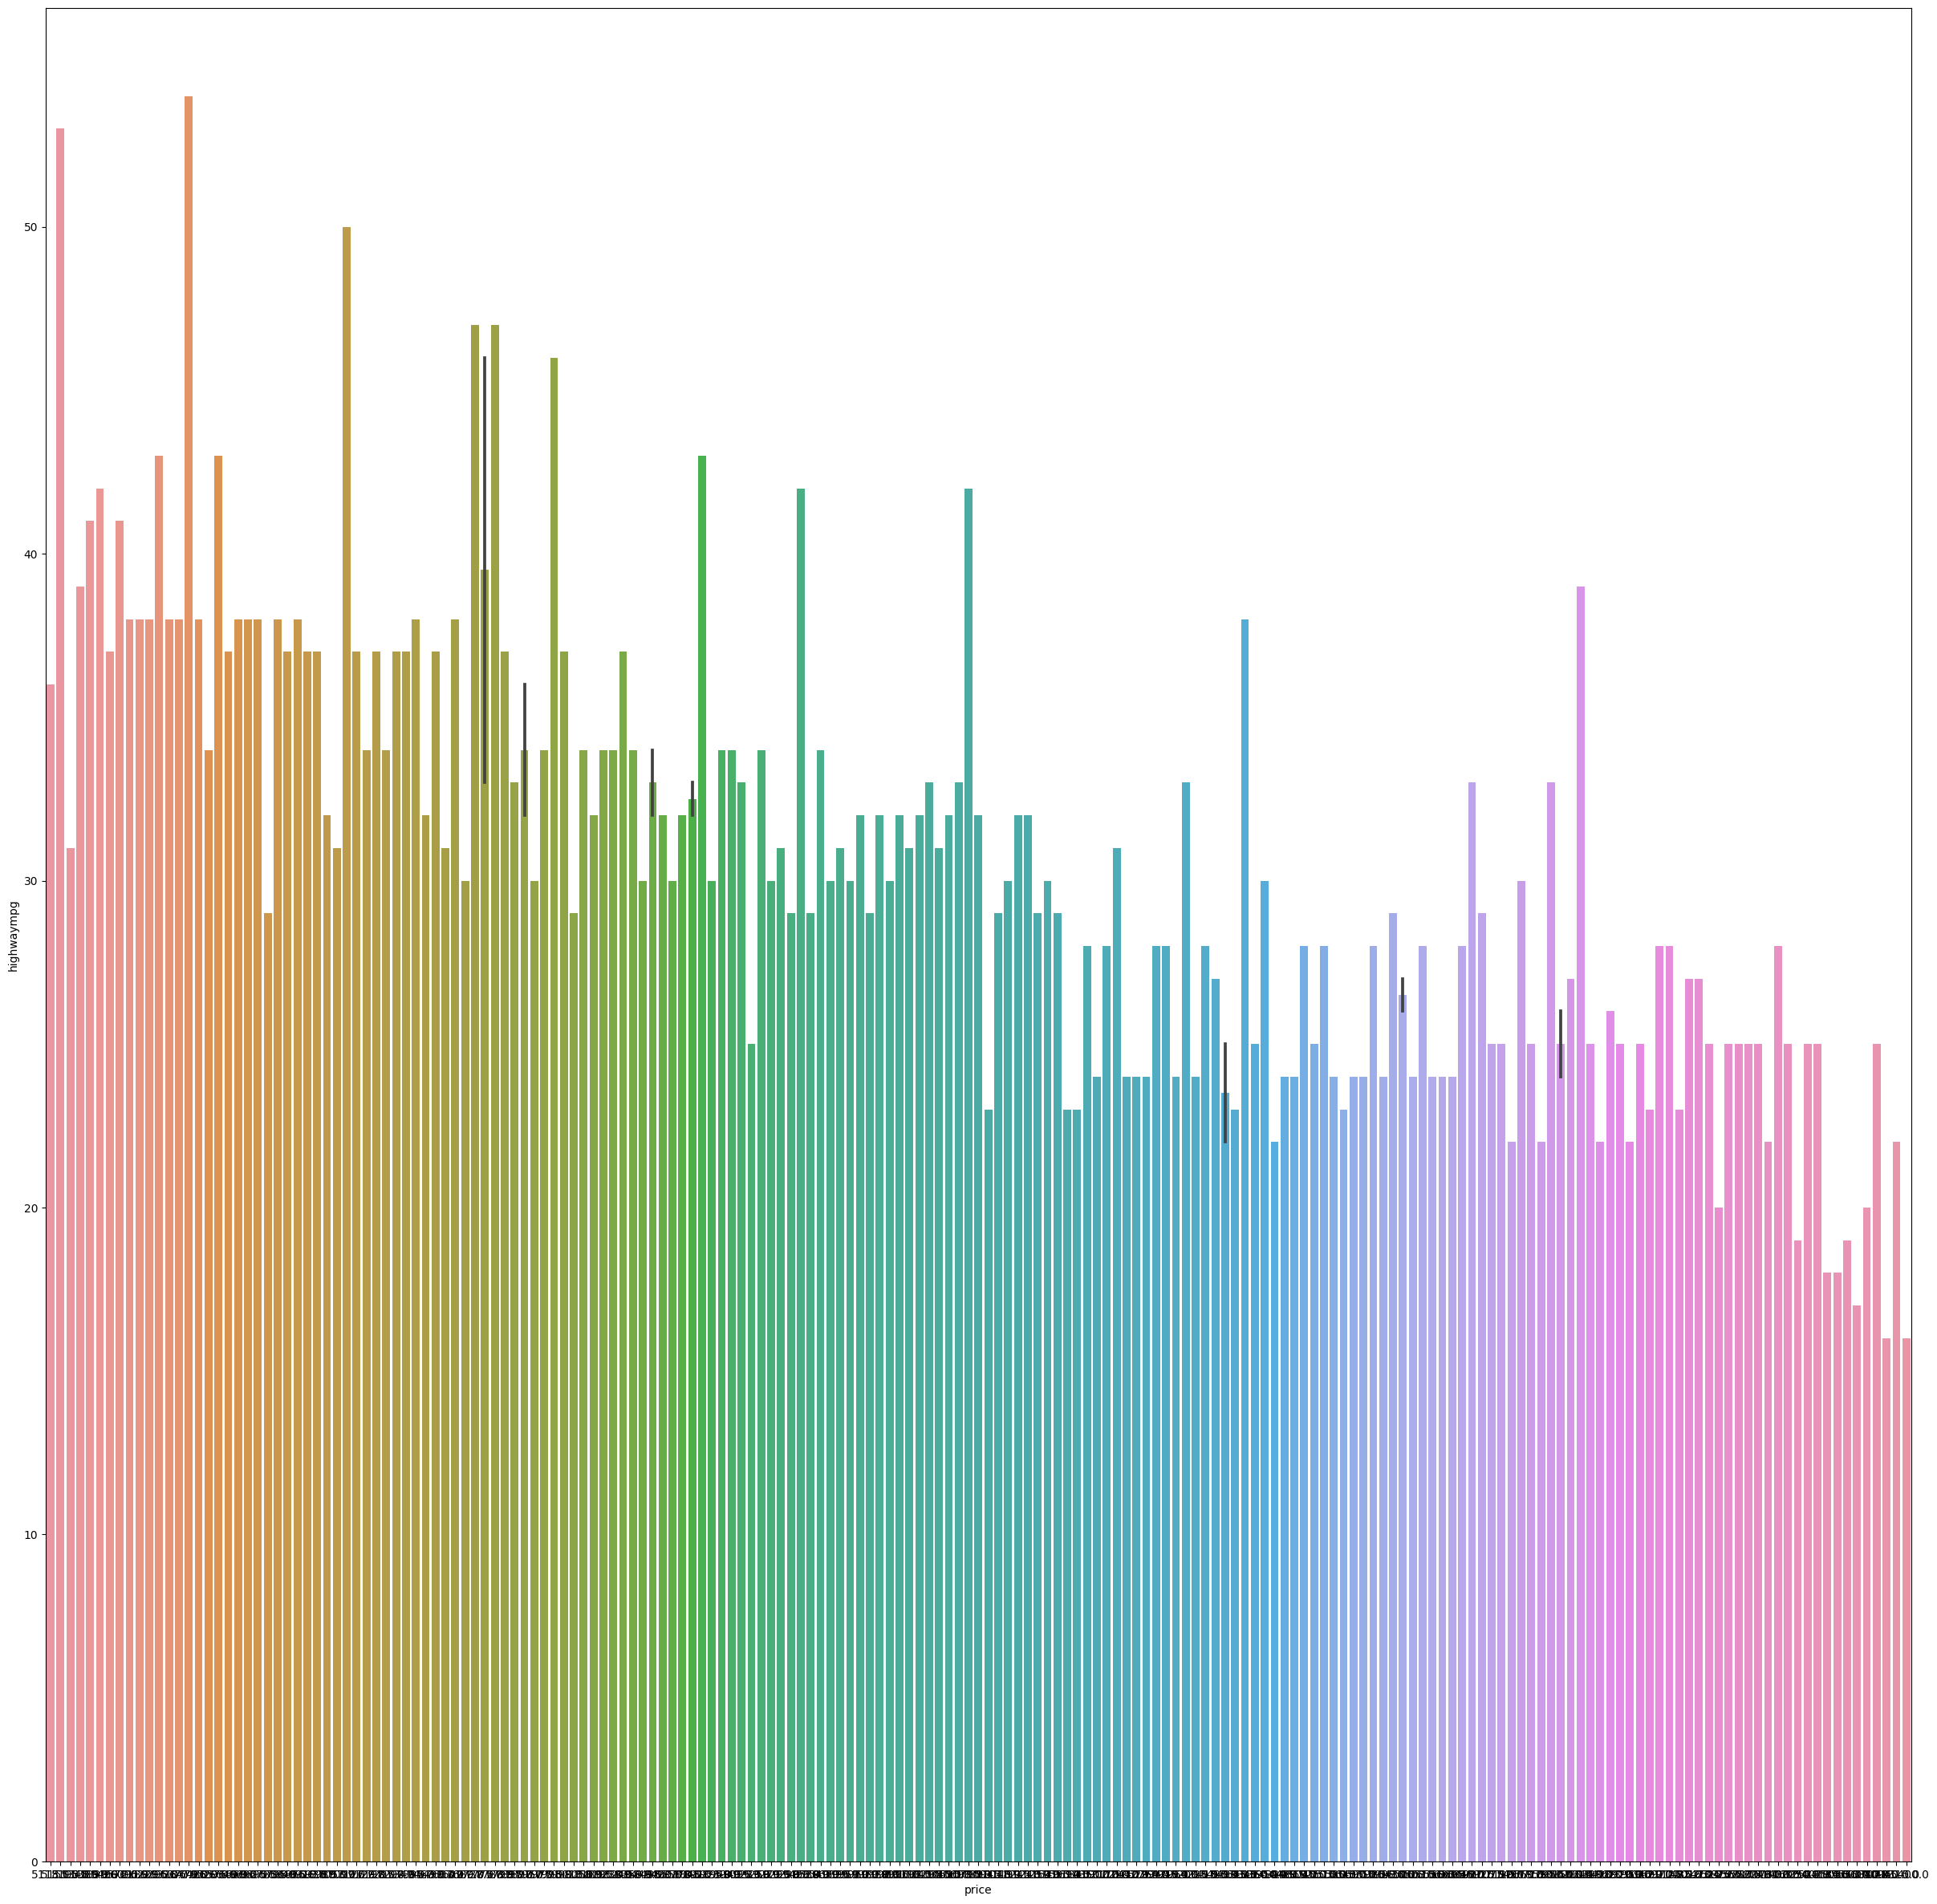

In [ ]:
a=[x for x in df.columns]
for i in a:
  if i!="price":
    plt.figure(figsize=(30,30))
    sns.barplot(x="price",y=df[i],data=df);
    plt.show();

<ipython-input-45-b4debec3f83e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<Axes: >

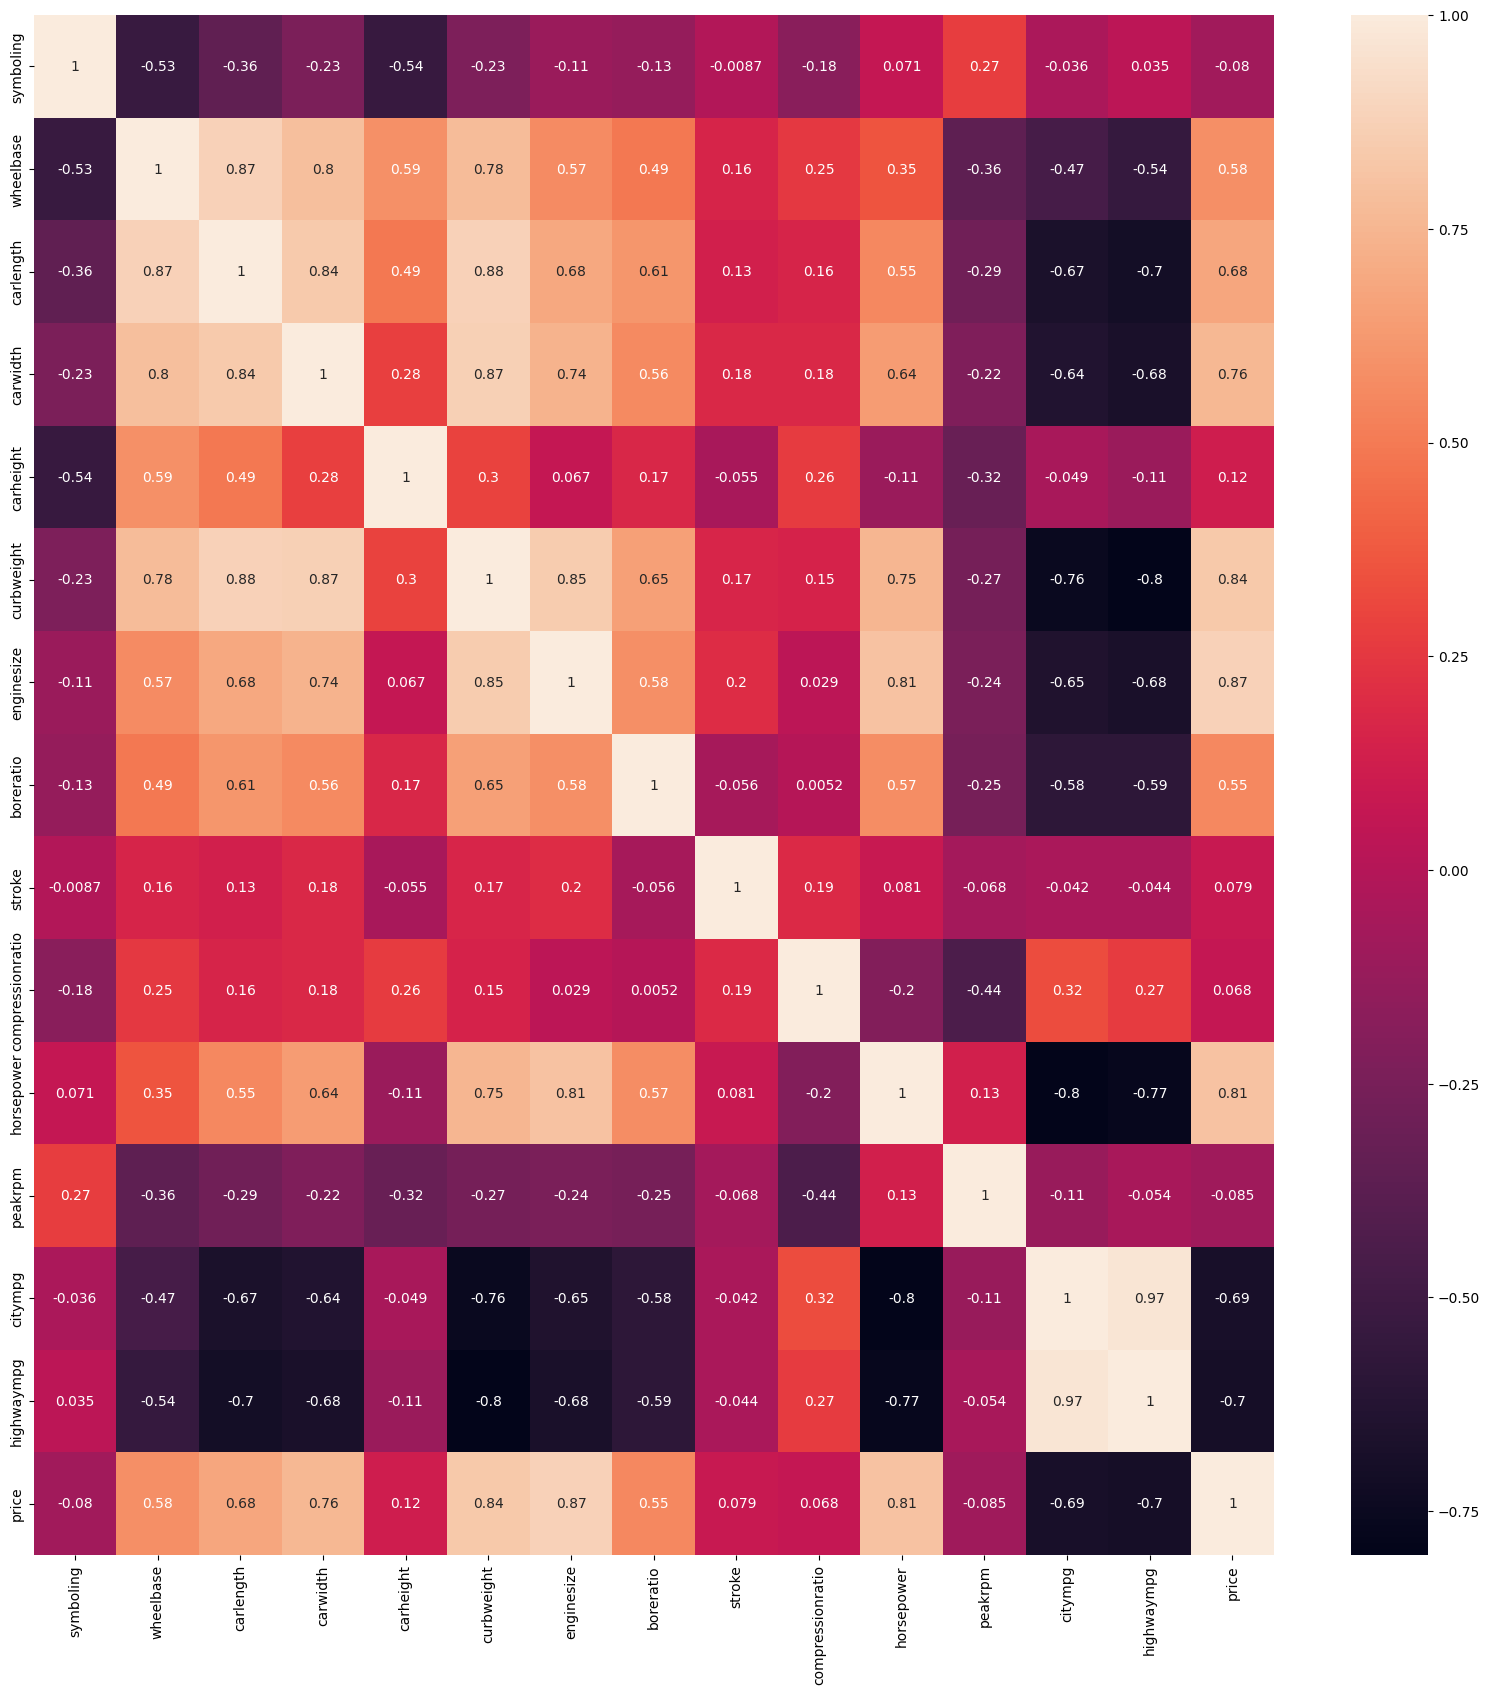

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True)

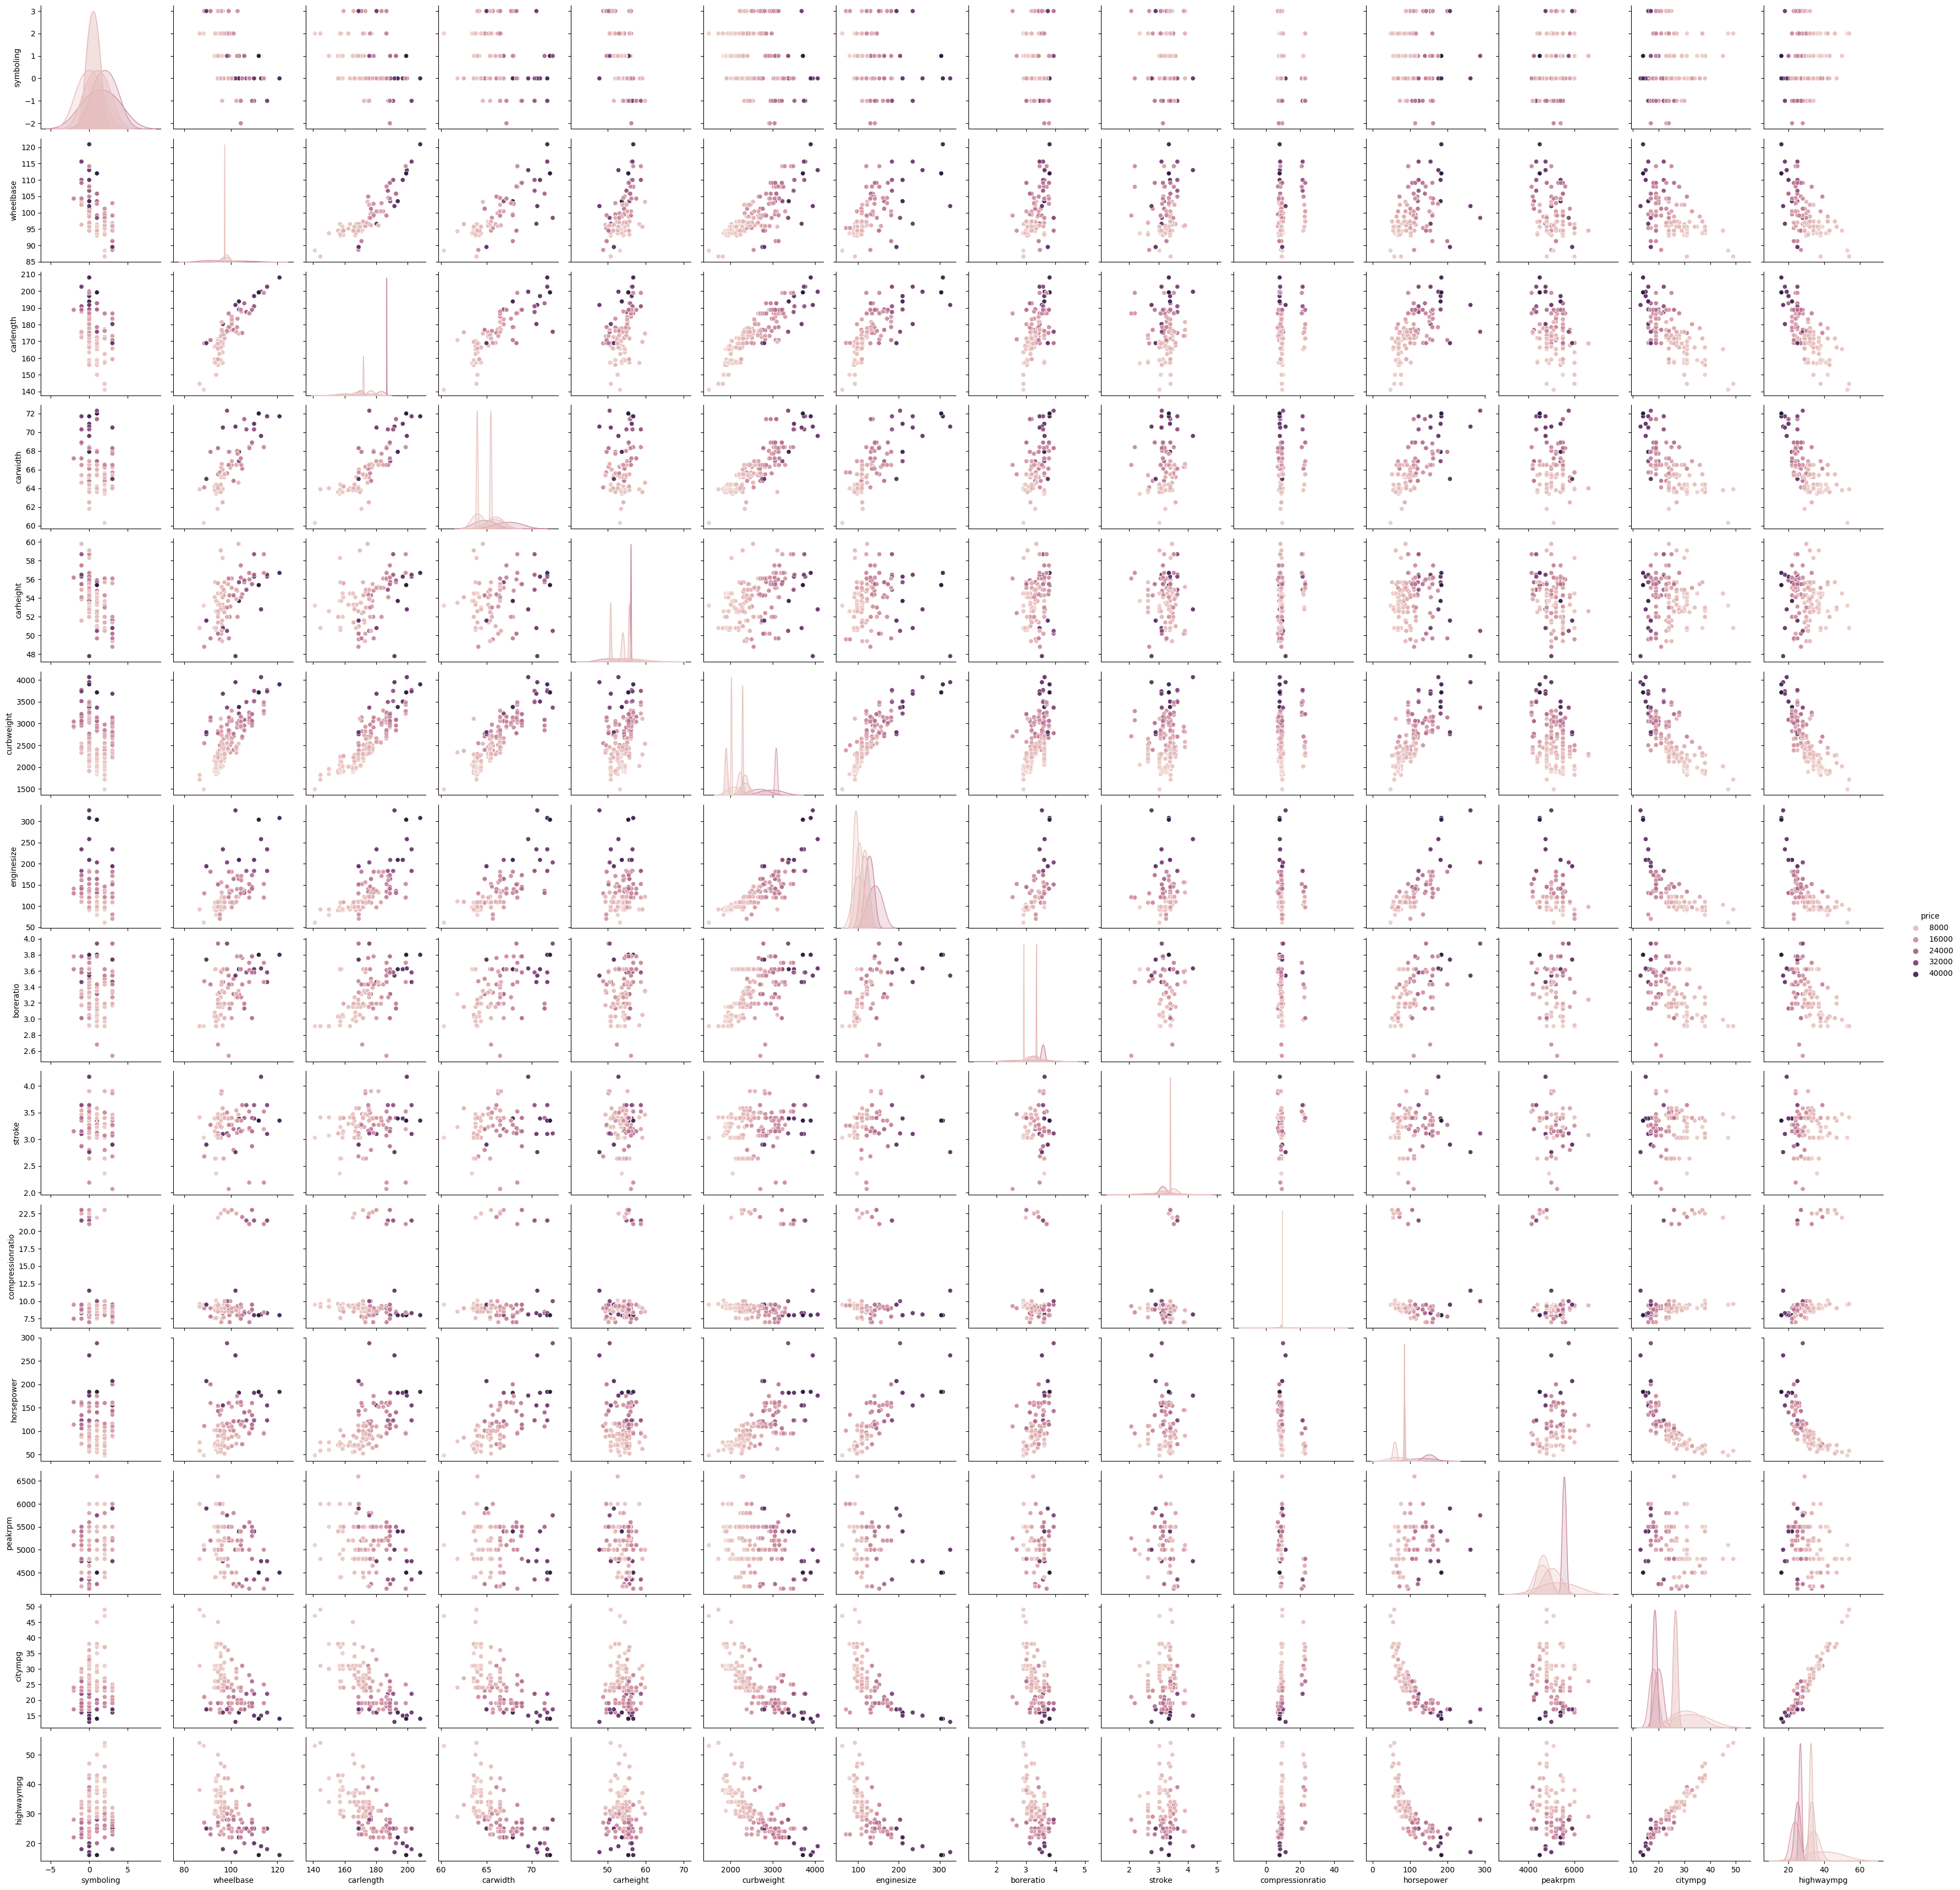

In [ ]:
sns.pairplot(data=df,kind="scatter", hue="price");
plt.show();

## **MACHINE LEARNING MODEL**

In [ ]:
x=df.iloc[:,:-1].values

In [ ]:
y=df.iloc[:,-1].values

In [66]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(int(df[column]))
    df[column] = int(encoded_values)

In [67]:
df.head()

symboling  CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3        2         1           0           1        0           2   
1          3        3         1           0           1        0           2   
2          1        1         1           0           1        2           2   
3          2        4         1           0           0        3           1   
4          2        5         1           0           0        3           0   

   enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0               0       88.6      168.8  ...         130           5   
1               0       88.6      168.8  ...         130           5   
2               0       94.5      171.2  ...         152           5   
3               0       99.8      176.6  ...         109           5   
4               0       99.4      176.6  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 25 columns]

In [68]:
'''from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
#num_features = int(input("Enter the number of features to select: "))
num_features = 15
target_variable = "price"
model = RandomForestClassifier()
model.fit(x, y)
importance_scores = model.feature_importances_
selected_columns_fi = x.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=x.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()'''

'from sklearn.feature_selection import RFE\nfrom sklearn.ensemble import RandomForestClassifier\n#num_features = int(input("Enter the number of features to select: "))\nnum_features = 15\ntarget_variable = "price"\nmodel = RandomForestClassifier()\nmodel.fit(x, y)\nimportance_scores = model.feature_importances_\nselected_columns_fi = x.columns[importance_scores.argsort()[-num_features:]].tolist()\nfeature_importance = pd.Series(importance_scores, index=x.columns)\nfeature_importance = feature_importance.sort_values(ascending=False)\nplt.figure(figsize=(10, 6))\nsns.barplot(x=feature_importance.values, y=feature_importance.index)\nplt.xlabel(\'Importance Score\')\nplt.ylabel(\'Features\')\nplt.title(\'Feature Importance\')\nplt.show()'

In [69]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
def examine_dataset(df, target_column):
    class_counts = df[target_column].value_counts()
    imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print("Class Distribution:")
    print(class_counts)
    print("Imbalance Ratio:", imbalance_ratio)
    return imbalance_ratio > 2.0
def handle_imbalanced_data(df, target_column):
    imbalance = examine_dataset(df, target_column)
    if not imbalance:
        print("No imbalance found in the dataset.")
        return df
    print("Select an option to handle the imbalanced dataset:")
    print("1. Random Oversampling")
    print("2. Random Undersampling")
    print("3. SMOTE (Synthetic Minority Over-sampling Technique)")
    print("4. ADASYN (Adaptive Synthetic)")
    print("5. Proceed without handling")
    choice = input("Enter your choice (1-5): ")
    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    if choice == '1':
    # Apply random oversampling
        oversampler = RandomOverSampler()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '2':
    # Apply random undersampling
        undersampler = RandomUnderSampler()
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
    elif choice == '3':
    # Apply SMOTE
        oversampler = SMOTE()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '4':
    # Apply ADASYN
        oversampler = ADASYN()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '5':
    # Proceed without handling
        print("Proceeding without handling the imbalanced dataset.")
        return df
    else:
        print("Invalid choice. Proceeding without handling the imbalanced dataset.")
        return df
    # Create a new balanced DataFrame
    balanced_df = pd.concat([X_resampled, y_resampled], axis=1)
    return balanced_df
df = handle_imbalanced_data(df, 'price')
df.shape

Class Distribution:
8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64
Imbalance Ratio: 1.0
No imbalance found in the dataset.


(205, 25)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

In [73]:
x=df.iloc[:,:-1].values

In [74]:
y=df.iloc[:,-1].values

In [76]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [77]:
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)
predictions = linearRegression.predict(X_test)
print(r2_score(y_test,predictions))

0.8407071151499277


In [78]:
x

array([[ 3.00e+00,  2.00e+00,  1.00e+00, ...,  5.00e+03,  2.10e+01,
         2.70e+01],
       [ 3.00e+00,  3.00e+00,  1.00e+00, ...,  5.00e+03,  2.10e+01,
         2.70e+01],
       [ 1.00e+00,  1.00e+00,  1.00e+00, ...,  5.00e+03,  1.90e+01,
         2.60e+01],
       ...,
       [-1.00e+00,  1.40e+02,  1.00e+00, ...,  5.50e+03,  1.80e+01,
         2.30e+01],
       [-1.00e+00,  1.42e+02,  0.00e+00, ...,  4.80e+03,  2.60e+01,
         2.70e+01],
       [-1.00e+00,  1.43e+02,  1.00e+00, ...,  5.40e+03,  1.90e+01,
         2.50e+01]])

In [80]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [81]:
print("the training accuracy is :: ",linearRegression.score(X_train,y_train))

the training accuracy is ::  0.9095056138704457


In [82]:
print("the training accuracy is :: ",linearRegression.score(X_test,y_test))

the training accuracy is ::  0.8407071151499277


In [83]:
metrics.mean_absolute_error(y_test,predictions)

2136.7804733921553

In [84]:
metrics.mean_squared_error(y_test,predictions)

12575220.82758502

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
print('train accuracy: ',np.round(RF.score(X_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(RF.score(X_test,y_test),3)*100,'% \n')

train accuracy:  98.7 % 

test accuracy:  95.6 % 



In [87]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,y_train)
print(xg.score(X_train,y_train))
print(xg.score(X_test,y_test))

0.9999996348521198
0.9283789038241709
